## Latitudinal dependence of nonlinear interaction between electromagnetic ion cyclotron wave and terrestrial ring current ions
Su, Zhu, Xiao, Zheng, Zhang, Liu, Shen, Wang, Wang (2014)



In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)


import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave
import WPIT.WPI_mod.EMIC_ion_mod as wpi


### 1. Define simulation parameters

Here we define all the initial parameters of the simulation in respect with the particle and the wave

In [2]:
### Simulation parameters
L_shell=4
lamdaeq=np.deg2rad(0)
Beq =env.Bmag_dipole(L_shell,lamdaeq)
m_res=1

wce_eq=env.omega_cyclotron(Beq,env.const.qe,env.const.me)
wcHe_eq=env.omega_cyclotron(Beq,env.const.qe,env.const.mHe)
wcH_eq=env.omega_cyclotron(Beq,env.const.qe,env.const.mH)
wcO_eq=env.omega_cyclotron(Beq,env.const.qe,env.const.mO)
wpe_eq=15*wce_eq
w_wave=0.96*wcHe_eq

ne_eq=(env.const.me*env.const.epsilon0*wpe_eq*wpe_eq)/(env.const.qe*env.const.qe)
nH_eq=0.77*ne_eq
nHe_eq=0.2*ne_eq
nO_eq=0.03*ne_eq

Byw0_sim=3*10**(-9)  #3nT

aeq0_deg=80   #initial equatorial pitch angle
aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad


Ekev0=50 #initial energy keV
lamda0_deg=3.5 # starting electron latitude
lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
theta0_deg=10**-5  # wave normal angle
theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad

eta0_deg=np.linspace(-180,180,48) #initial phases of electrons
eta0=np.deg2rad(eta0_deg) #convert initial phases to rad

Tgyro=(2*np.pi)/wcH_eq
t=5
h=Tgyro/30
Nsteps=int(t/h)




### 2. Find initial electron's local pitch angle 

In [3]:

alpha0=env.aeq2alpha(L_shell,lamda0,aeq0)

print('\u03B1:',alpha0)


α: 1.453217981956048


### 3. Find initial momentum, velocity and lorentz factor

In [4]:

upar0,uper0,ppar0,pper0,gamma0=env.initial_velocity(Ekev0,alpha0,env.const.mH)

print('upar0:',upar0,'m/s')
print('uper0:',uper0,'m/s')
print('ppar0:',ppar0,'Ns')
print('pper0:',pper0,'Ns')
print('gamma0:',gamma0)

upar0: 363051.29640407476 m/s
uper0: 3073497.3504033703 m/s
ppar0: 6.072719575621441e-22 Ns
pper0: 5.141005612783068e-21 Ns
gamma0: 1.0000532890094382


### 5. Calculate all the initial parameters

In [7]:

B0 =env.Bmag_dipole(L_shell,lamda0)
wce_0=env.omega_cyclotron(B0,env.const.qe,env.const.me)
wcHe_0=env.omega_cyclotron(B0,env.const.qe,env.const.mHe)
wcH_0=env.omega_cyclotron(B0,env.const.qe,env.const.mH)
wcO_0=env.omega_cyclotron(B0,env.const.qe,env.const.mO)

S0,D0,P0,R0,L0=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B0)
eta_sq_plus0,eta_sq_minus0,mu0,kappa0,kappaz0,kappax0=wave.refr_index_full(theta0,w_wave,S0,P0,R0,L0)

v_para_res0, v_per_res0, v_tot_res0, E_res0,gamma_res0=wave.resonant_velocity(m_res,w_wave,kappaz0,wce_0,alpha0,env.const.mH)
dwcds0=env.dwc_ds(wcH_0,lamda0,L_shell)
dBdz0=env.dB_ds(B0,lamda0,L_shell)

Bxw0, Byw0, Bzw0, Exw0, Eyw0, Ezw0=wave.wave_amplitudes_bell(mu0,P0,D0,S0,Byw0_sim,theta0)

beta0,BwR0,BwL0,EwR0,EwL0,pwR0,pwL0,wR0,wL0=wpi.wpi_params(pper0,kappax0,env.const.qi,env.const.mH,B0,Exw0,Eyw0,Bxw0,Byw0,gamma0)

beta0_sim=0

wpe_0=env.omega_plasma(ne_eq,env.const.qe,env.const.me)
wpHe_0=env.omega_plasma(nHe_eq,env.const.qe,env.const.mHe)
wpH_0=env.omega_plasma(nH_eq,env.const.qe,env.const.mH)
wpO_0=env.omega_plasma(nO_eq,env.const.qe,env.const.mO)
dwcds=env.dwc_ds(wcH_0,lamda0,L_shell)

C0_0=wpi.nonlinear_C0(ppar0,kappaz0,m_res,gamma0,env.const.qi,env.const.mH,wcH_0,Ezw0)
C1p_0=wpi.nonlinear_C1p(pper0,ppar0,kappaz0,m_res,env.const.qi,env.const.mH,gamma0,wR0,EwR0,wcH_0)
C1m_0=wpi.nonlinear_C1m(pper0,ppar0,kappaz0,m_res,env.const.qi,env.const.mH,gamma0,wL0,EwL0,wcH_0)
thet_0,wtrsq_0=wpi.nonlinear_theta(C0_0,C1p_0,C1m_0,m_res,beta0)
dkpar_dt0=0
H_0=wpi.nonlinear_H(pper0,ppar0,kappaz0,gamma0,m_res,env.const.mH,wcH_0,dkpar_dt0,dwcds,0)
S_0=wpi.nonlinear_S(H_0,wtrsq_0)

deta_dt0=wpi.detadt(-ppar0,m_res,wcH_0,gamma0,kappaz0,env.const.mH,w_wave)



### 4. Allocate outputs

In [8]:
pperrk_su=np.zeros((len(eta0),Nsteps+1))
pparrk_su=np.zeros((len(eta0),Nsteps+1))
etark_su=np.zeros((len(eta0),Nsteps+1))
nurk_su=np.zeros((len(eta0),Nsteps+1))
lamdark_su=np.zeros((len(eta0),Nsteps+1))
timerk_su=np.zeros((len(eta0),Nsteps+1))
uperrk_su=np.zeros((len(eta0),Nsteps+1))
uparrk_su=np.zeros((len(eta0),Nsteps+1))
zetark_su=np.zeros((len(eta0),Nsteps+1))
alphark_su=np.zeros((len(eta0),Nsteps+1))
alpha2rk_su=np.zeros((len(eta0),Nsteps+1))
aeqrk_su=np.zeros((len(eta0),Nsteps+1))
aeq2rk_su=np.zeros((len(eta0),Nsteps+1))
aeq3rk_su=np.zeros((len(eta0),Nsteps+1))
Exw_out_su=np.zeros((len(eta0),Nsteps+1))
Eyw_out_su=np.zeros((len(eta0),Nsteps+1))
Ezw_out_su=np.zeros((len(eta0),Nsteps+1))
Bxw_out_su=np.zeros((len(eta0),Nsteps+1))
Byw_out_su=np.zeros((len(eta0),Nsteps+1))
Bzw_out_su=np.zeros((len(eta0),Nsteps+1))
Bw_out_su=np.zeros((len(eta0),Nsteps+1))
Ew_out_su=np.zeros((len(eta0),Nsteps+1))
vresz_out_su=np.zeros((len(eta0),Nsteps+1))
Eres_out_su=np.zeros((len(eta0),Nsteps+1))
gammares_out_su=np.zeros((len(eta0),Nsteps+1))
mu_adiabatic_out_su=np.zeros((len(eta0),Nsteps+1))
mu_out_su=np.zeros((len(eta0),Nsteps+1))
deta_dt_out_su=np.zeros((len(eta0),Nsteps+1))
B_earth_out_su=np.zeros((len(eta0),Nsteps+1))
S_stix_out_su=np.zeros((len(eta0),Nsteps+1))
D_stix_out_su=np.zeros((len(eta0),Nsteps+1))
P_stix_out_su=np.zeros((len(eta0),Nsteps+1))
R_stix_out_su=np.zeros((len(eta0),Nsteps+1))
L_stix_out_su=np.zeros((len(eta0),Nsteps+1))
kappa_out_su=np.zeros((len(eta0),Nsteps+1))
kx_out=np.zeros((len(eta0),Nsteps+1))
kz_out=np.zeros((len(eta0),Nsteps+1))
wh_out_su=np.zeros((len(eta0),Nsteps+1))
dwce_ds_out_su=np.zeros((len(eta0),Nsteps+1))
gamma_out_su=np.zeros((len(eta0),Nsteps+1))
gamma2_out_su=np.zeros((len(eta0),Nsteps+1))

C0_out=np.zeros((len(eta0),Nsteps+1))
C1p_out=np.zeros((len(eta0),Nsteps+1))
C1m_out=np.zeros((len(eta0),Nsteps+1))
thet_out=np.zeros((len(eta0),Nsteps+1))
wtrsq_out=np.zeros((len(eta0),Nsteps+1))
dkpar_dtout=np.zeros((len(eta0),Nsteps+1))
H_out=np.zeros((len(eta0),Nsteps+1))
S_out=np.zeros((len(eta0),Nsteps+1))
detadt_out=np.zeros((len(eta0),Nsteps+1))


Phi_out_su=np.zeros((len(eta0),Nsteps+1))
E_kin_su=np.zeros((len(eta0),Nsteps+1))
E_kin_out=np.zeros((len(eta0),Nsteps+1))
u_par_out_su=np.zeros((len(eta0),Nsteps+1))
u_per_out_su=np.zeros((len(eta0),Nsteps+1))

### 5. Runge Kutta


In [9]:
for k in range(0,len(eta0)):

    pperrk_su[k,0]=pper0
    pparrk_su[k,0]=-ppar0
    etark_su[k,0]=eta0[k]
    nurk_su[k,0]=deta_dt0
    detadt_out[k,0]=deta_dt0
    lamdark_su[k,0]=lamda0
    timerk_su[k,0]=0
    uperrk_su[k,0]=uper0
    uparrk_su[k,0]=-upar0
    zetark_su[k,0]=0
    alphark_su[k,0]=alpha0
    alpha2rk_su[k,0]=alpha0
    aeqrk_su[k,0]=aeq0
    aeq2rk_su[k,0]=aeq0
    aeq3rk_su[k,0]=aeq0
    Exw_out_su[k,0]=Exw0
    Eyw_out_su[k,0]=Eyw0
    Ezw_out_su[k,0]=Ezw0
    Bxw_out_su[k,0]=Bxw0
    Byw_out_su[k,0]=Byw0
    Bzw_out_su[k,0]=Bzw0
#     Bw_out_su[k,0]=0
#     Ew_out_su[k,0]=0
    vresz_out_su[k,0]=v_para_res0
    Eres_out_su[k,0]=E_res0
    gammares_out_su[k,0]=gamma_res0
    mu_out_su[k,0]=mu0
    S_stix_out_su[k,0]=S0
    D_stix_out_su[k,0]=D0
    P_stix_out_su[k,0]=P0
    R_stix_out_su[k,0]=R0
    L_stix_out_su[k,0]=L0
    kappa_out_su[k,0]=kappaz0
    kx_out[k,0]=kappax0
    kz_out[k,0]=kappaz0
#     wh_out_su[k,0]=wce0_sim
#     dwce_ds_out_su[k,0]=dwceds0_sim
    gamma_out_su[k,0]=gamma0
    gamma2_out_su[k,0]=gamma0
#     Phi_out[k,0]=
    E_kin_su[k,0]=Ekev0*1.602176487E-16
    E_kin_out[k,0]=Ekev0*1.602176487E-16
    u_par_out_su[k,0]=-upar0
    u_per_out_su[k,0]=uper0
    
    C0_out[k,0]=C0_0
    C1p_out[k,0]=C1p_0
    C1m_out[k,0]=C1m_0
    thet_out[k,0]=thet_0
    wtrsq_out[k,0]=wtrsq_0
    dkpar_dtout[k,0]=dkpar_dt0
    H_out[k,0]=H_0
    S_out[k,0]=S_0

    i=0
    
    while i<Nsteps:
        B_run=env.Bmag_dipole(L_shell,lamdark_su[k,i])
        S_run,D_run,P_run,R_run,L_run=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus,eta_sq_minus,mu_run,kapp_run,kz_run,kx_run=wave.refr_index_full(theta0,w_wave,S_run,P_run,R_run,L_run)

        gamma_run=((E_kin_su[k,i])/(env.const.mH*env.const.c_light*env.const.c_light))+1
        
        wcH_run=env.omega_cyclotron(B_run,env.const.qe,env.const.mH)

        dwce_ds_run=env.dwc_ds(wcH_run,lamdark_su[k,i],L_shell)
        dBdz_run=env.dB_ds(B_run,lamdark_su[k,i],L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=wave.wave_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi.wpi_params(pperrk_su[k,i],kx_run,env.const.qi,env.const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=wpi.dwcdt(pparrk_su[k,i],env.const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
        
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i])/(gamma_run*env.const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i],kz_run,m_res,gamma_run,env.const.qe,env.const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i],pparrk_su[k,i],kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i],pparrk_su[k,i],kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i],pparrk_su[k,i],kz_run,gamma_run,m_res,env.const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k1=wpi.dzdt(pparrk_su[k,i],gamma_run,env.const.mH)
        l1=wpi.dlamdadt(pparrk_su[k,i],lamdark_su[k,i],gamma_run,env.const.mH,L_shell)
        m1=wpi.dppardt(pperrk_su[k,i],etark_su[k,i],gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n1=wpi.dpperdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o1=wpi.detadt(pparrk_su[k,i],m_res,wcH_run,gamma_run,kz_run,env.const.mH,w_wave)
        p1=wpi.dgammadt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q1=wpi.daeqdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],aeqrk_su[k,i],Ezw_run,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        r1=wpi.dEkdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s1=wpi.dalphadt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],Ezw_run,m_res,env.const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
#         ### second step
        B_run=env.Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l1)
        S_run,D_run,P_run,R_run,L_run=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus,eta_sq_minus,mu_run,kapp_run,kz_run,kx_run=wave.refr_index_full(theta0,w_wave,S_run,P_run,R_run,L_run)


        gamma_run=((E_kin_su[k,i]+0.5*h*r1)/(env.const.mH*env.const.c_light*env.const.c_light))+1
        
        wcH_run=env.omega_cyclotron(B_run,env.const.qe,env.const.mH)
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n1/pparrk_su[k,i]+0.5*h*m1)
    
        dwce_ds_run=env.dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l1,L_shell)
        dBdz_run=env.dB_ds(B_run,lamdark_su[k,i]+0.5*h*l1,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l1))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=wave.wave_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi.wpi_params(pperrk_su[k,i]+0.5*h*n1,kx_run,env.const.qi,env.const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=wpi.dwcdt(pparrk_su[k,i]+0.5*h*m1,env.const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*env.const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,gamma_run,env.const.qe,env.const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,gamma_run,m_res,env.const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k2=wpi.dzdt(pparrk_su[k,i]+0.5*h*m1,gamma_run,env.const.mH)
        l2=wpi.dlamdadt(pparrk_su[k,i]+0.5*h*m1,lamdark_su[k,i]+0.5*h*l1,gamma_run,env.const.mH,L_shell)
        m2=wpi.dppardt(pperrk_su[k,i]+0.5*h*n1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n2=wpi.dpperdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o2=wpi.detadt(pparrk_su[k,i]+0.5*h*m1,m_res,wcH_run,gamma_run,kz_run,env.const.mH,w_wave)
        p2=wpi.dgammadt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q2=wpi.daeqdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,aeqrk_su[k,i]+0.5*h*q1,Ezw_run,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        r2=wpi.dEkdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s2=wpi.dalphadt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,Ezw_run,m_res,env.const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
#         #third step
        
        B_run=env.Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l2)
        S_run,D_run,P_run,R_run,L_run=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus,eta_sq_minus,mu_run,kapp_run,kz_run,kx_run=wave.refr_index_full(theta0,w_wave,S_run,P_run,R_run,L_run)


        gamma_run=((E_kin_su[k,i]+0.5*h*r2)/(env.const.mH*env.const.c_light*env.const.c_light))+1
        
        wcH_run=env.omega_cyclotron(B_run,env.const.qe,env.const.mH)
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n2/pparrk_su[k,i]+0.5*h*m2)
    
        dwce_ds_run=env.dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l2,L_shell)
        dBdz_run=env.dB_ds(B_run,lamdark_su[k,i]+0.5*h*l2,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l2))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=wave.wave_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi.wpi_params(pperrk_su[k,i]+0.5*h*n2,kx_run,env.const.qi,env.const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
#         dwcdt_run=dwcdt(pparrk_su[k,i]+0.5*h*m2,env.const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*env.const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,gamma_run,env.const.qe,env.const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,gamma_run,m_res,env.const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k3=wpi.dzdt(pparrk_su[k,i]+0.5*h*m2,gamma_run,env.const.mH)
        l3=wpi.dlamdadt(pparrk_su[k,i]+0.5*h*m2,lamdark_su[k,i]+0.5*h*l2,gamma_run,env.const.mH,L_shell)
        m3=wpi.dppardt(pperrk_su[k,i]+0.5*h*n2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n3=wpi.dpperdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o3=wpi.detadt(pparrk_su[k,i]+0.5*h*m2,m_res,wcH_run,gamma_run,kz_run,env.const.mH,w_wave)
        p3=wpi.dgammadt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q3=wpi.daeqdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,aeqrk_su[k,i]+0.5*h*q2,Ezw_run,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        r3=wpi.dEkdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s3=wpi.dalphadt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,Ezw_run,m_res,env.const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
#         #fourth step
        
        B_run=env.Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l3)
        S_run,D_run,P_run,R_run,L_run=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus,eta_sq_minus,mu_run,kapp_run,kz_run,kx_run=wave.refr_index_full(theta0,w_wave,S_run,P_run,R_run,L_run)

        gamma_run=((E_kin_su[k,i]+0.5*h*r3)/(env.const.mH*env.const.c_light*env.const.c_light))+1
        
        wcH_run=env.omega_cyclotron(B_run,env.const.qe,env.const.mH)
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n3/pparrk_su[k,i]+0.5*h*m3)
    
        dwce_ds_run=env.dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l3,L_shell)
        dBdz_run=env.dB_ds(B_run,lamdark_su[k,i]+0.5*h*l3,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l3))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=wave.wave_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi.wpi_params(pperrk_su[k,i]+0.5*h*n3,kx_run,env.const.qi,env.const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=wpi.dwcdt(pparrk_su[k,i]+0.5*h*m3,env.const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
        dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
        dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*env.const.mH))*dtt
#         print(kappa_out_su[k,i]-kappa_out_su[k,i-1])
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,gamma_run,env.const.qe,env.const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,gamma_run,m_res,env.const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k4=wpi.dzdt(pparrk_su[k,i]+0.5*h*m3,gamma_run,env.const.mH)
        l4=wpi.dlamdadt(pparrk_su[k,i]+0.5*h*m3,lamdark_su[k,i]+0.5*h*l3,gamma_run,env.const.mH,L_shell)
        m4=wpi.dppardt(pperrk_su[k,i]+0.5*h*n3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n4=wpi.dpperdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o4=wpi.detadt(pparrk_su[k,i]+0.5*h*m3,m_res,wcH_run,gamma_run,kz_run,env.const.mH,w_wave)
        p4=wpi.dgammadt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q4=wpi.daeqdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,aeqrk_su[k,i]+0.5*h*q3,Ezw_run,gamma_run,m_res,env.const.qi,env.const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        r4=wpi.dEkdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,env.const.qi,env.const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s4=wpi.dalphadt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,Ezw_run,m_res,env.const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
        ###################################################################
        zetark_su[k,i+1]=zetark_su[k,i]+(h/6)*(k1+2*k2+2*k3+k4)
        pparrk_su[k,i+1]=pparrk_su[k,i]+(h/6)*(m1+2*m2+2*m3+m4)
        pperrk_su[k,i+1]=pperrk_su[k,i]+(h/6)*(n1+2*n2+2*n3+n4)
        etark_su[k,i+1]=(etark_su[k,i]+(h/6)*(o1+2*o2+2*o3+o4))
        lamdark_su[k,i+1]=lamdark_su[k,i]+(h/6)*(l1+2*l2+2*l3+l4)
        alphark_su[k,i+1]=alphark_su[k,i]+(h/6)*(s1+2*s2+2*s3+s4)
        aeqrk_su[k,i+1]=aeqrk_su[k,i]+(h/6)*(q1+2*q2+2*q3+q4)
        E_kin_su[k,i+1]=E_kin_su[k,i]+(h/6)*(r1+2*r2+2*r3+r4)
        gamma_out_su[k,i+1]=gamma_out_su[k,i]+(h/6)*(p1+2*p2+2*p3+p4)
        detadt_out[k,i+1]=(1/6)*(o1+2*o2+2*o3+o4)
        u_par_out_su[k,i+1]=pparrk_su[k,i+1]/(gamma_run*env.const.mH)
        u_per_out_su[k,i+1]=pperrk_su[k,i+1]/(gamma_run*env.const.mH)        
        print((h/6)*(q1+2*q2+2*q3+q4))
        C0_run=wpi.nonlinear_C0(pparrk_su[k,i+1],kz_run,m_res,gamma_run,env.const.qe,env.const.mH,wcH_run,Ezw_run)
        C1p_run=wpi.nonlinear_C1p(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wR_run,EwR_run,wcH_run)
        C1m_run=wpi.nonlinear_C1m(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,m_res,env.const.qe,env.const.mH,gamma_run,wL_run,EwL_run,wcH_run)
        thet_run,wtrsq_run= wpi.nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
        H_run=wpi.nonlinear_H(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,gamma_run,m_res,env.const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
        S_run=wpi.nonlinear_S(H_run,wtrsq_run)   
        
        C0_out[k,i+1]=C0_run
        C1p_out[k,i+1]=C1p_run
        C1m_out[k,i+1]=C1m_run
        thet_out[k,i+1]=thet_run
        wtrsq_out[k,i+1]=wtrsq_run
        dkpar_dtout[k,i+1]=dkpardt_run2
        H_out[k,i+1]=H_run
        S_out[k,i+1]=S_run
        
        kx_out[k,i+1]=kx_run
        kz_out[k,i+1]=kz_run
        
        Exw_out_su[k,i+1]=Exw_run
        Eyw_out_su[k,i+1]=Eyw_run
        Ezw_out_su[k,i+1]=Ezw_run
        Bxw_out_su[k,i+1]=Bxw_run
        Byw_out_su[k,i+1]=Byw_run
        Bzw_out_su[k,i+1]=Bzw_run

        mu_out_su[k,i+1]=mu_run
                
        i=i+1
        timerk_su[k,i]=timerk_su[k,i-1]+h
        kappa_out_su[k,i]=kz_run
        print(timerk_su[k,i],np.rad2deg(lamdark_su[k,i]),np.rad2deg(alphark_su[k,i]),dkpardt_run2)        

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:229: RuntimeWarning: divide by zero encountered in double_scalars


4.687858720539901e-06
0.004485033704055289 3.496354825569388 83.26327268109655 -inf
1.5851050456281593e-05
0.008970067408110578 3.4927055077948985 83.26332536206414 3.2151985559236078e-06
2.684966493319296e-05
0.013455101112165867 3.4890525582392207 83.2634144690041 6.43133676589246e-06
3.7697058807592946e-05
0.017940134816221157 3.485396480120908 83.26353940489467 6.435858483345099e-06
4.8406663679415777e-05
0.022425168520276446 3.481737769065196 83.26369962766545 6.439495535300195e-06
5.899195766741085e-05
0.026910202224331735 3.4780769138484664 83.26389464965852 6.442260334456813e-06
6.946644055746761e-05
0.03139523592838703 3.4744143971362 83.26412403708412 6.44416399940195e-06
7.98436119494945e-05
0.03588026963244231 3.470750696214355 83.26438740947746 6.4452163657066174e-06
9.01369518661205e-05
0.0403653033364976 3.467086283714205 83.26468443916188 6.445426000624229e-06
0.00010035990331919022
0.044850337040552885 3.463421628330713 83.26501485072185 6.444800212018459e-06
0.0001105

0.00022806496503016745
1.1212584260138245 2.5561743532088577 83.29815457330993 6.639652727469357e-06
0.0002050414917975792
1.12574345971788 2.5520302296754114 83.29867375587548 6.627009154137116e-06
0.0001820660922037614
1.1302284934219353 2.5478901096140607 83.2991345306167 6.615740076957394e-06
0.00015910765406099928
1.1347135271259907 2.543753133650419 83.29953696993705 6.605839783788474e-06
0.00013613414039084743
1.1391985608300461 2.539618442574561 83.29988107783063 6.597304128153899e-06
0.00011311271642255223
1.1436835945341015 2.535485176310997 83.3001667880746 6.590130568133755e-06
9.000986968701561e-05
1.148168628238157 2.5313524728626353 83.30039396278316 6.584318199048343e-06
6.6791526188284e-05
1.1526536619422123 2.527219467233986 83.30056239131459 6.579867776359278e-06
4.3423165683284855e-05
1.1571386956462677 2.523085290338779 83.30067178952896 6.5767817284881934e-06
1.986993918089193e-05
1.161623729350323 2.5189490678971906 83.30072179940177 6.575064162425995e-06
-3.9032

-0.0002590170725841962
2.247001885731729 1.262547311982265 83.2686865999464 5.134888116631264e-06
-0.00036512326862260937
2.2514869194357843 1.2573428983948969 83.26796495316388 5.128498006408596e-06
-0.00046929568244307443
2.2559719531398397 1.2521238860802222 83.26703814883484 5.125201631427097e-06
-0.0005708316021657582
2.260456986843895 1.2468870230819715 83.26591177908013 5.124877069692074e-06
-0.0006689783402040463
2.2649420205479505 1.2416291554352294 83.26459293560426 5.127380249254978e-06
-0.0007629265534006377
2.269427054252006 1.2363472519234207 83.26309031041937 5.132543912080531e-06
-0.0008518057833256276
2.2739120879560613 1.2310384305392592 83.26141430393322 5.140176487168443e-06
-0.0009346828221661422
2.2783971216601167 1.2256999867371359 83.25957713494807 5.15006096288287e-06
-0.0010105635616151503
2.282882155364172 1.2203294234688513 83.25759294590111 5.161953847187552e-06
-0.0010783990114655374
2.2873671890682274 1.2149244828788643 83.25547789542104 5.17558434881508e

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WPI_mod/EMIC_ion_mod/wpi_params.py:37: RuntimeWarning: invalid value encountered in double_scalars
  pwR=gamma_arg*mi_arg*(EwR/BwR)
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WPI_mod/EMIC_ion_mod/wpi_params.py:38: RuntimeWarning: invalid value encountered in double_scalars
  pwL=gamma_arg*mi_arg*(EwL/BwL)


 nan nan nan
nan
3.300984806184747 nan nan nan
nan
3.3054698398888025 nan nan nan
nan
3.309954873592858 nan nan nan
nan
3.3144399072969133 nan nan nan
nan
3.3189249410009687 nan nan nan
nan
3.323409974705024 nan nan nan
nan
3.3278950084090795 nan nan nan
nan
3.332380042113135 nan nan nan
nan
3.3368650758171903 nan nan nan
nan
3.3413501095212457 nan nan nan
nan
3.345835143225301 nan nan nan
nan
3.3503201769293565 nan nan nan
nan
3.354805210633412 nan nan nan
nan
3.3592902443374673 nan nan nan
nan
3.3637752780415227 nan nan nan
nan
3.368260311745578 nan nan nan
nan
3.3727453454496334 nan nan nan
nan
3.377230379153689 nan nan nan
nan
3.3817154128577442 nan nan nan
nan
3.3862004465617996 nan nan nan
nan
3.390685480265855 nan nan nan
nan
3.3951705139699104 nan nan nan
nan
3.399655547673966 nan nan nan
nan
3.4041405813780212 nan nan nan
nan
3.4086256150820766 nan nan nan
nan
3.413110648786132 nan nan nan
nan
3.4175956824901874 nan nan nan
nan
3.422080716194243 nan nan nan
nan
3.4265657498982

4.4356983333107625 nan nan nan
nan
4.440183367014818 nan nan nan
nan
4.444668400718873 nan nan nan
nan
4.449153434422929 nan nan nan
nan
4.453638468126984 nan nan nan
nan
4.4581235018310394 nan nan nan
nan
4.462608535535095 nan nan nan
nan
4.46709356923915 nan nan nan
nan
4.471578602943206 nan nan nan
nan
4.476063636647261 nan nan nan
nan
4.480548670351316 nan nan nan
nan
4.485033704055372 nan nan nan
nan
4.489518737759427 nan nan nan
nan
4.494003771463483 nan nan nan
nan
4.498488805167538 nan nan nan
nan
4.502973838871593 nan nan nan
nan
4.507458872575649 nan nan nan
nan
4.511943906279704 nan nan nan
nan
4.51642893998376 nan nan nan
nan
4.520913973687815 nan nan nan
nan
4.52539900739187 nan nan nan
nan
4.529884041095926 nan nan nan
nan
4.534369074799981 nan nan nan
nan
4.538854108504037 nan nan nan
nan
4.543339142208092 nan nan nan
nan
4.547824175912147 nan nan nan
nan
4.552309209616203 nan nan nan
nan
4.556794243320258 nan nan nan
nan
4.561279277024314 nan nan nan
nan
4.5657643107283

0.5875394152312425 3.110435078612639 83.28336375175084 6.761224374457685e-06
-0.0008781509974861831
0.5920244489352978 3.1064667757383098 83.2808116699767 6.828306902492576e-06
-0.0008853820473796329
0.5965094826393531 3.102458079685505 83.27825296726826 6.895457655202683e-06
-0.0008932165457517053
0.6009945163434084 3.0984088757599895 83.27568584725289 6.962719643946221e-06
-0.0009016260371706905
0.6054795500474637 3.094319024223334 83.27310863154534 7.030133229429279e-06
-0.0009105719205193302
0.609964583751519 3.09018836208542 83.27051978474151 7.097735515780981e-06
-0.0009200048692002775
0.6144496174555742 3.0860167052616307 83.2679179404281 7.16555972105819e-06
-0.0009298641994791535
0.6189346511596295 3.08180385111081 83.26530192832455 7.233634523661001e-06
-0.0009400771959366908
0.6234196848636848 3.0775495813715894 83.26267080264427 7.30198338003825e-06
-0.0009505584061554158
0.6279047185677401 3.0732536655158262 83.2600238717274 7.3706238135105416e-06
-0.0009612089203451002
0.

1.6863726727248045 1.9084627457923768 83.21892261053401 7.708307540478042e-06
-0.0007711568959111651
1.69085770642886 1.9027448784781456 83.21730300369828 7.732079640398717e-06
-0.0006710154144783096
1.6953427401329153 1.8970007051397464 83.21589579802594 7.751334123187328e-06
-0.0005620513483210593
1.6998277738369707 1.8912336447314693 83.21471871718141 7.765713250191984e-06
-0.00044542256835965237
1.704312807541026 1.885447379400634 83.21378705866444 7.774909478828152e-06
-0.000322493178141476
1.7087978412450815 1.8796458142924823 83.21311329099836 7.778673596261598e-06
-0.0001948057432362589
1.713282874949137 1.873833031352309 83.21270670762058 7.776821726972409e-06
-6.404480979997e-05
1.7177679086531923 1.8680132381112091 83.2125731541382 7.769240869986339e-06
6.80068036123279e-05
1.7222529423572477 1.8621907126873327 83.2127148426648 7.755892690370852e-06
0.000199516882152623
1.726737976061303 1.8563697464271929 83.21313026292975 7.736815358869894e-06
0.00032865537225199324
1.7312

0.0012688332028110618
2.834541300962986 0.4685264899793199 83.24267249927647 2.2939237903374646e-06
0.0012318278880886174
2.8390263346670412 0.4628073948970707 83.24496726634568 2.2522247418843647e-06
0.0011779874685670594
2.8435113683710966 0.4571247408821345 83.24716190510726 2.211555661729547e-06
0.0011087753804443704
2.847996402075152 0.45147669181325356 83.24922773048867 2.172079710522775e-06
0.0010257362272704238
2.8524814357792074 0.4458609597523316 83.25113892958883 2.1339318585285902e-06
0.000930451980797017
2.856966469483263 0.4402748527102543 83.25287263709613 2.0972195028667614e-06
0.0008245079346246916
2.8614515031873182 0.4347153231847123 83.25440894699274 2.0620235462916834e-06
0.0007094682739770577
2.8659365368913736 0.4291790165440077 83.25573087816527 2.028399785559202e-06
0.0005868606281118576
2.870421570595429 0.4236623186148156 83.25682431045246 1.9963804870673723e-06
0.00045816863775118385
2.8749066042994844 0.41816140209316777 83.25767790593652 1.9659760258236867

3.955799726976835 nan nan nan
nan
3.9602847606808904 nan nan nan
nan
3.964769794384946 nan nan nan
nan
3.969254828089001 nan nan nan
nan
3.9737398617930566 nan nan nan
nan
3.978224895497112 nan nan nan
nan
3.9827099292011674 nan nan nan
nan
3.987194962905223 nan nan nan
nan
3.991679996609278 nan nan nan
nan
3.9961650303133336 nan nan nan
nan
4.000650064017389 nan nan nan
nan
4.005135097721444 nan nan nan
nan
4.0096201314255 nan nan nan
nan
4.014105165129555 nan nan nan
nan
4.018590198833611 nan nan nan
nan
4.023075232537666 nan nan nan
nan
4.027560266241721 nan nan nan
nan
4.032045299945777 nan nan nan
nan
4.036530333649832 nan nan nan
nan
4.0410153673538876 nan nan nan
nan
4.045500401057943 nan nan nan
nan
4.049985434761998 nan nan nan
nan
4.054470468466054 nan nan nan
nan
4.058955502170109 nan nan nan
nan
4.0634405358741645 nan nan nan
nan
4.06792556957822 nan nan nan
nan
4.072410603282275 nan nan nan
nan
4.076895636986331 nan nan nan
nan
4.081380670690386 nan nan nan
nan
4.085865704

0.053820404448663456 3.456845811229406 83.2751202349745 6.2243695718287446e-06
0.00037370562172768876
0.05830543815271874 3.4533167263709434 83.276374058994 6.201435999198161e-06
0.00038643923197941596
0.06279047185677403 3.4498006931150194 83.27767224104761 6.177420458060357e-06
0.0003993514909322279
0.06727550556082931 3.446298338195017 83.27901564953385 6.152302536885114e-06
0.00041244029913640133
0.0717605392648846 3.442810300695993 83.2804051703331 6.126061379270188e-06
0.0004257016384775321
0.07624557296893988 3.439337232270632 83.2818417020068 6.0986757953814335e-06
0.0004391293724869451
0.08073060667299517 3.435879797285034 83.28332615037128 6.070124386873747e-06
0.0004527150314455795
0.08521564037705046 3.4324386728851852 83.28485942237869 6.040385690803376e-06
0.00046644758223323937
0.08970067408110574 3.42901454897402 83.28644241923304 6.0094383382379e-06
0.0004803131831469013
0.09418570778516103 3.42560812808792 83.28807602866478 5.977261235436115e-06
0.0004942949242500498


0.0007848166615014462
0.9194319093313337 2.7289542269870535 83.262561652457 7.4411615657434e-06
0.0007577900197435031
0.923916943035389 2.7244577682339948 83.26449147317268 7.394711119102063e-06
0.0007306863089678534
0.9284019767394442 2.7199856489109604 83.26635418463437 7.349906213483467e-06
0.0007035808006189172
0.9328870104434995 2.7155368958472423 83.26814953780304 7.3067528156187615e-06
0.0006765373364107397
0.9373720441475548 2.7111105327187714 83.26987745436485 7.265252380974743e-06
0.0006496092376957185
0.9418570778516101 2.7067055823988855 83.27153800143485 7.2254025016689154e-06
0.0006228401889170274
0.9463421115556654 2.7023210689516963 83.27313136821384 7.1871974998056e-06
0.0005962650852746235
0.9508271452597207 2.6979560192959675 83.27465784454178 7.150628980844877e-06
0.0005699108375096107
0.955312178963776 2.6936094645665127 83.2761178012723 7.115686331458685e-06
0.0005437971290423202
0.9597972126678312 2.6892804411989566 83.27751167237942 7.082357180536349e-06
0.00051

-0.0010337028580029585
1.9465046275600175 1.5752121569000788 83.22218334209673 6.804487168055754e-06
-0.0009531280513464642
1.950989661264073 1.5694165797470048 83.2202616985924 6.824956575010766e-06
-0.0008591567334665054
1.9554746949681283 1.563589764486115 83.21853175814341 6.841734806939034e-06
-0.0007526135371908578
1.9599597286721837 1.5577349100570659 83.21701818866427 6.854386699452604e-06
-0.0006346435516414495
1.964444762376239 1.551855593761475 83.21574331047438 6.862521977392372e-06
-0.0005067039166588843
1.9689297960802945 1.545955730402484 83.21472649851246 6.86580571103798e-06
-0.0003705408225717839
1.97341482978435 1.5400395221449628 83.21398363161109 6.863967885998142e-06
-0.000228151916597212
1.9778998634884053 1.5341114000126683 83.21352661630013 6.856811612817029e-06
-8.173523134881215e-05
1.9823848971924607 1.5281759583661763 83.2133630103577 6.844219534329895e-06
6.637313430399224e-05
1.986869930896516 1.5222378840841786 83.21349576701289 6.826158065180794e-06
0.0

0.00029711108328675317
3.0677630535738665 0.14371001726031882 83.2552920440408 7.189862886675491e-07
0.00015577824830242067
3.072248087277922 0.13818429139364183 83.25558043137664 6.924597097343242e-07
1.2844989192870857e-05
3.0767331209819773 0.13266132130251307 83.25560421033566 6.665568383967029e-07
-0.0001302052595805971
3.0812181546860327 0.12713674926374363 83.25536319307915 6.412017639638178e-07
-0.0002718924123006339
3.085703188390088 0.12160623313573501 83.25485994945126 6.163127727007741e-07
-0.00041072513651427495
3.0901882220941435 0.1160654918295714 83.2540998263008 5.918034534810453e-07
-0.000545187468622375
3.094673255798199 0.11051035127759358 83.25309099073772 5.675837589203742e-07
-0.0006737280825103157
3.0991582895022542 0.10493679126814655 83.2518444923986 5.435610698772955e-07
-0.0007947536702256259
3.1036433232063096 0.09934099341537303 83.2503743370982 5.196412746881571e-07
-0.000906627902936759
3.108128356910365 0.0937193903884235 83.24869756154457 4.95729912897

4.269752086260713 nan nan nan
nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.283207187372879 nan nan nan
nan
4.287692221076934 nan nan nan
nan
4.29217725478099 nan nan nan
nan
4.296662288485045 nan nan nan
nan
4.301147322189101 nan nan nan
nan
4.305632355893156 nan nan nan
nan
4.310117389597211 nan nan nan
nan
4.314602423301267 nan nan nan
nan
4.319087457005322 nan nan nan
nan
4.3235724907093775 nan nan nan
nan
4.328057524413433 nan nan nan
nan
4.332542558117488 nan nan nan
nan
4.337027591821544 nan nan nan
nan
4.341512625525599 nan nan nan
nan
4.3459976592296545 nan nan nan
nan
4.35048269293371 nan nan nan
nan
4.354967726637765 nan nan nan
nan
4.359452760341821 nan nan nan
nan
4.363937794045876 nan nan nan
nan
4.3684228277499315 nan nan nan
nan
4.372907861453987 nan nan nan
nan
4.377392895158042 nan nan nan
nan
4.381877928862098 nan nan nan
nan
4.386362962566153 nan nan nan
nan
4.3908479962702085 nan nan nan
nan
4.395333029974264 nan nan nan
nan
4.3998180636

-0.0007949517864788189
0.40813806706903105 3.2472573989022915 83.34335591259551 5.070814686476379e-06
-0.0008036051673831361
0.41262310077308634 3.244298902199637 83.34051768954461 5.146242833777187e-06
-0.0008109566990243065
0.4171081344771416 3.2412963554220604 83.33768201222297 5.221642656255585e-06
-0.0008171377918699
0.4215931681811969 3.2382498057506583 83.3348524797963 5.2969169870139785e-06
-0.0008222814861675625
0.4260782018852522 3.235159347456904 83.33203211363923 5.371982992951143e-06
-0.0008265207983877332
0.4305632355893075 3.2320251140224756 83.3292233880377 5.446771496952311e-06
-0.0008299872569389528
0.43504826929336277 3.228847270692025 83.32642826300298 5.52122623072889e-06
-0.0008328096304845116
0.43953330299741805 3.225626007484572 83.32364821843613 5.595303044158868e-06
-0.0008351128450051119
0.44401833670147334 3.222361532679299 83.3208842889974 5.668969080474465e-06
-0.0008370170800642567
0.4485033704055286 3.2190540667831677 83.31813709914601 5.742201939115414e

-0.0005152852723117381
1.5383665604909764 2.0596951551320766 83.26717164467298 6.906100871693362e-06
-0.0005792833154055264
1.5428515941950318 2.0548236793104913 83.26589056480167 6.926225333467891e-06
-0.0006423363618228186
1.5473366278990872 2.0499289322317016 83.26447257947251 6.94919115886786e-06
-0.0007041707382473515
1.5518216616031426 2.045008827543212 83.26292098444891 6.974914815963622e-06
-0.0007644716017790977
1.556306695307198 2.040061332435782 83.26123977233124 7.003298465675737e-06
-0.0008228798113158145
1.5607917290112534 2.0350844789511093 83.25943371919477 7.034228252456419e-06
-0.0008789893749954807
1.5652767627153088 2.030076376671384 83.25750847539291 7.067572510133795e-06
-0.0009323456867889276
1.5697617964193642 2.025035226847767 83.25547065880058 7.103179928971468e-06
-0.0009824448003770746
1.5742468301234196 2.019959337995431 83.25332794828954 7.140877723483828e-06
-0.0010287340207429199
1.578731863827475 2.0148471429454373 83.25108917468606 7.180469857906199e-0

0.0012672179121011868
2.5474991439034405 0.8094743437569474 83.23419446649802 3.879207809610888e-06
0.0012791162986310954
2.551984177607496 0.8036933112061572 83.23661418419256 3.828368433589786e-06
0.00127253647440484
2.5564692113115512 0.7979506486383129 83.23902161938896 3.777921340425491e-06
0.001248392203096473
2.5609542450156066 0.7922459384283757 83.2413835298389 3.728228244298489e-06
0.001207801150720666
2.565439278719662 0.7865782343655782 83.24366876945417 3.6796193791544908e-06
0.001152027840773382
2.5699243124237174 0.7809460977911796 83.24584857073128 3.632390880955932e-06
0.001082432407925196
2.574409346127773 0.7753476376869863 83.24789673143647 3.586803351194195e-06
0.0010004267947915364
2.5788943798318282 0.7697805532390907 83.24978971907771 3.5430814125248465e-06
0.000907439260333183
2.5833794135358836 0.7642421776355599 83.25150670838553 3.5014140652945783e-06
0.0008048874188175773
2.587864447239939 0.7587295221104089 83.25302956751582 3.4619556521109276e-06
0.000694

nan
3.538691592499683 nan nan nan
nan
3.5431766262037385 nan nan nan
nan
3.547661659907794 nan nan nan
nan
3.5521466936118493 nan nan nan
nan
3.5566317273159047 nan nan nan
nan
3.56111676101996 nan nan nan
nan
3.5656017947240155 nan nan nan
nan
3.570086828428071 nan nan nan
nan
3.5745718621321263 nan nan nan
nan
3.5790568958361817 nan nan nan
nan
3.583541929540237 nan nan nan
nan
3.5880269632442925 nan nan nan
nan
3.592511996948348 nan nan nan
nan
3.5969970306524033 nan nan nan
nan
3.6014820643564587 nan nan nan
nan
3.605967098060514 nan nan nan
nan
3.6104521317645695 nan nan nan
nan
3.614937165468625 nan nan nan
nan
3.6194221991726803 nan nan nan
nan
3.6239072328767357 nan nan nan
nan
3.628392266580791 nan nan nan
nan
3.6328773002848465 nan nan nan
nan
3.637362333988902 nan nan nan
nan
3.6418473676929572 nan nan nan
nan
3.6463324013970126 nan nan nan
nan
3.650817435101068 nan nan nan
nan
3.6553024688051234 nan nan nan
nan
3.659787502509179 nan nan nan
nan
3.6642725362132342 nan nan na

4.637524849993255 nan nan nan
nan
4.642009883697311 nan nan nan
nan
4.646494917401366 nan nan nan
nan
4.6509799511054215 nan nan nan
nan
4.655464984809477 nan nan nan
nan
4.659950018513532 nan nan nan
nan
4.664435052217588 nan nan nan
nan
4.668920085921643 nan nan nan
nan
4.6734051196256985 nan nan nan
nan
4.677890153329754 nan nan nan
nan
4.682375187033809 nan nan nan
nan
4.686860220737865 nan nan nan
nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.7675908274

0.0010530081373232153
0.7714257970975092 2.868161039461857 83.21050218902529 8.649455806840037e-06
0.00106657643278122
0.7759108308015645 2.8630359925229314 83.21316967301829 8.585882073650244e-06
0.0010758964283023888
0.7803958645056198 2.8579461629376617 83.21586402466919 8.521564088128447e-06
0.001081221346559365
0.7848808982096751 2.852891899773128 83.21857543269631 8.456749244883355e-06
0.00108282019774645
0.7893659319137304 2.8478734130853307 83.22129470215691 8.391670077012713e-06
0.0010809720190172818
0.7938509656177857 2.8428907829420633 83.22401328096134 8.32654346948072e-06
0.0010759606694893647
0.798335999321841 2.837943968772219 83.22672327448956 8.261570175214622e-06
0.0010680702328337423
0.8028210330258962 2.8330328188757923 83.22941744960596 8.196934608676728e-06
0.001057581050775613
0.8073060667299515 2.8281570799479567 83.23208922943269 8.132804877802478e-06
0.0010447663866029564
0.8117911004340068 2.8233164064903264 83.23473268025221 8.069333027194961e-06
0.001029889

1.8792291219991866 1.6622986991547124 83.26781584496237 6.177833181807663e-06
-0.00036088030907335746
1.883714155703242 1.657262361196053 83.26706631752326 6.179363684587535e-06
-0.00044763917715581866
1.8881991894072974 1.652210878002183 83.26613762116524 6.18421716433823e-06
-0.0005328965492589418
1.8926842231113528 1.6471414544172276 83.26503334840153 6.192301968220595e-06
-0.0006162065996023886
1.8971692568154082 1.6420513562532237 83.26375803774019 6.20350911595295e-06
-0.0006970754296052596
1.9016542905194636 1.6369379257792325 83.2623172629384 6.217710897380909e-06
-0.0007749560692633949
1.906139324223519 1.6317985986996302 83.26071773106699 6.234759319263391e-06
-0.0008492447089774412
1.9106243579275743 1.626630922748271 83.25896738685098 6.254484449677261e-06
-0.0009192785297239197
1.9151093916316297 1.6214325779810614 83.25707552004663 6.276692724828522e-06
-0.000984335550127524
1.9195944253356851 1.6162013987934998 83.25505287182543 6.301165284333404e-06
-0.00104363695068798

0.001109209644995684
3.0453378850535895 0.19283383921148112 83.23048162643552 1.0229117821653692e-06
0.0011871621974872707
3.049822918757645 0.18690416284395708 83.23267520129241 9.873885922446458e-07
0.0012440782804682786
3.0543079524617003 0.18101117208375983 83.23497431424909 9.520228255912127e-07
0.0012797914397625549
3.0587929861657557 0.1751563445733484 83.23733983121366 9.169549590000854e-07
0.001294585962927898
3.063278019869811 0.1693405151032894 83.23973311472338 8.823092610462446e-07
0.0012891331155819741
3.0677630535738665 0.1635638889369121 83.24211673848252 8.481921575364441e-07
0.001264421387453008
3.072248087277922 0.1578260660622174 83.24445507535866 8.146913209930835e-07
0.0012216859032275274
3.0767331209819773 0.15212607425178096 83.24671475680778 7.818754147311873e-07
0.0011623412426355734
3.0812181546860327 0.1464624088345409 83.24886500947012 7.497943861314005e-07
0.0010879208494486686
3.085703188390088 0.1408330772222624 83.25087788055806 7.184802002587085e-07
0.

nan
4.12623100773094 nan nan nan
nan
4.1307160414349955 nan nan nan
nan
4.135201075139051 nan nan nan
nan
4.139686108843106 nan nan nan
nan
4.144171142547162 nan nan nan
nan
4.148656176251217 nan nan nan
nan
4.1531412099552725 nan nan nan
nan
4.157626243659328 nan nan nan
nan
4.162111277363383 nan nan nan
nan
4.166596311067439 nan nan nan
nan
4.171081344771494 nan nan nan
nan
4.1755663784755495 nan nan nan
nan
4.180051412179605 nan nan nan
nan
4.18453644588366 nan nan nan
nan
4.189021479587716 nan nan nan
nan
4.193506513291771 nan nan nan
nan
4.197991546995826 nan nan nan
nan
4.202476580699882 nan nan nan
nan
4.206961614403937 nan nan nan
nan
4.211446648107993 nan nan nan
nan
4.215931681812048 nan nan nan
nan
4.220416715516103 nan nan nan
nan
4.224901749220159 nan nan nan
nan
4.229386782924214 nan nan nan
nan
4.23387181662827 nan nan nan
nan
4.238356850332325 nan nan nan
nan
4.24284188403638 nan nan nan
nan
4.247326917740436 nan nan nan
nan
4.251811951444491 nan nan nan
nan
4.256296985

0.3049822918757595 3.3118034388299367 83.37344569556849 4.202911352185523e-06
-0.0005051988887058439
0.30946732557981477 3.3093669614903867 83.37137444590034 4.258424279409519e-06
-0.0005386477010439082
0.31395235928387005 3.30689661839012 83.36918932945123 4.31681414130333e-06
-0.0005702685617908699
0.31843739298792534 3.304390877994505 83.36690082612651 4.377829226295751e-06
-0.0006000027524165408
0.3229224266919806 3.3018483531884764 83.36451928815364 4.441219031480579e-06
-0.0006278110842773805
0.3274074603960359 3.2992677989937804 83.36205483607569 4.50673689502086e-06
-0.0006536741834620737
0.3318924941000912 3.296648108910888 83.35951726720089 4.5741423565503985e-06
-0.0006775923277454284
0.3363775278041465 3.29398831006021 83.35691597706379 4.643203229714501e-06
-0.0006995848558502487
0.34086256150820177 3.291287557302766 83.35425989403957 4.713697369989233e-06
-0.0007196891886292545
0.34534759521225705 3.2885451265205883 83.35155742689321 4.785414138868156e-06
-0.0007379595165

1.5204264256747548 2.1355366833578584 83.22407137234562 8.059653802921382e-06
0.0006570806636177249
1.5249114593788102 2.1300105697186926 83.22550291658115 8.021719184163618e-06
0.0007432205435686746
1.5293964930828656 2.1245048244165416 83.22712206228232 7.97953928059215e-06
0.000822424239853877
1.533881526786921 2.1190222430853063 83.22891387435729 7.93345092227368e-06
0.0008941342777004724
1.5383665604909764 2.1135653859824397 83.23086224198924 7.883817791579434e-06
0.000957932978558737
1.5428515941950318 2.1081365615388483 83.23295016759212 7.83102395522273e-06
0.001013541590328477
1.5473366278990872 2.1027378143382713 83.23516005422313 7.775467386388897e-06
0.0010608152120877455
1.5518216616031426 2.0973709174537194 83.23747398297483 7.717553674737493e-06
0.0010997341415099292
1.556306695307198 2.0920373689451495 83.23987397310765 7.65769008684913e-06
0.0011303923789379566
1.5607917290112534 2.086738392219511 83.24234221913315 7.5962801208341245e-06
0.0011529840685741651
1.5652767

2.668595053912936 0.7845600866470468 83.26034046617016 3.5302953995665272e-06
-0.0012340007193190573
2.6730800876169916 0.7790742661793897 83.25800190942437 3.532320393645796e-06
-0.0012632033903721448
2.677565121321047 0.7735488902963462 83.25560978746073 3.534515305525388e-06
-0.0012781686540873638
2.6820501550251024 0.7679832656399135 83.25319112512709 3.536588537793911e-06
-0.0012778935123712502
2.6865351887291578 0.7623771522195443 83.25077477257199 3.5382374417121582e-06
-0.001261526242907076
2.691020222433213 0.7567307916531548 83.24839111388859 3.5391519078863353e-06
-0.0012284174985333404
2.6955052561372685 0.7510449300438465 83.24607168195054 3.539018774397812e-06
-0.00117817252592216
2.699990289841324 0.745320833933617 83.24384867790366 3.537527025991172e-06
-0.001110701497834989
2.7044753235453793 0.7395602977842163 83.24175439932367 3.534373702841976e-06
-0.0010262644317918265
2.7089603572494347 0.7337656415417689 83.23982058750295 3.5292703767541168e-06
-0.000925506865296

nan
3.8481589180795055 nan nan nan
nan
3.852643951783561 nan nan nan
nan
3.8571289854876163 nan nan nan
nan
3.8616140191916717 nan nan nan
nan
3.866099052895727 nan nan nan
nan
3.8705840865997825 nan nan nan
nan
3.875069120303838 nan nan nan
nan
3.8795541540078933 nan nan nan
nan
3.8840391877119487 nan nan nan
nan
3.888524221416004 nan nan nan
nan
3.8930092551200595 nan nan nan
nan
3.897494288824115 nan nan nan
nan
3.9019793225281703 nan nan nan
nan
3.9064643562322257 nan nan nan
nan
3.910949389936281 nan nan nan
nan
3.9154344236403364 nan nan nan
nan
3.919919457344392 nan nan nan
nan
3.9244044910484472 nan nan nan
nan
3.9288895247525026 nan nan nan
nan
3.933374558456558 nan nan nan
nan
3.9378595921606134 nan nan nan
nan
3.942344625864669 nan nan nan
nan
3.9468296595687242 nan nan nan
nan
3.9513146932727796 nan nan nan
nan
3.955799726976835 nan nan nan
nan
3.9602847606808904 nan nan nan
nan
3.964769794384946 nan nan nan
nan
3.969254828089001 nan nan nan
nan
3.9737398617930566 nan nan n

0.017940134816221157 3.485614312425193 83.27177560619879 6.261005427088079e-06
0.0006527526753779294
0.022425168520276446 3.4820807028953618 83.27397970832703 6.215040030668022e-06
0.0006600774080207488
0.026910202224331735 3.478573085927991 83.2762161597587 6.168296692265415e-06
0.0006675865642207946
0.03139523592838703 3.475091925170304 83.27848608746388 6.120747730592867e-06
0.000675238064753184
0.03588026963244231 3.4716376992585274 83.28079051142697 6.072367946855542e-06
0.000682985868845595
0.0403653033364976 3.4682109002669432 83.28313033084844 6.023134946518698e-06
0.0006907797369176874
0.044850337040552885 3.464812031957596 83.28550630905882 5.9730294935879344e-06
0.000698565007487126
0.04933537074460817 3.4614416078124957 83.2879190570967 5.922035892768293e-06
0.0007062823949715778
0.053820404448663456 3.458100148829515 83.29036901591337 5.870142409275994e-06
0.000713867816128533
0.05830543815271874 3.4547881810627783 83.29285643718299 5.817341716167338e-06
0.0007212522539145

1.1347135271259907 2.5421351258041565 83.37269125338605 4.8744495601333785e-06
0.0007152629287393853
1.1391985608300461 2.539103657353424 83.37474980148296 4.8288726663897506e-06
0.0007286505072601108
1.1436835945341015 2.536099650739889 83.37685460122813 4.78226243177257e-06
0.0007419088903270693
1.148168628238157 2.5331238022570526 83.37900600740015 4.734610940004889e-06
0.0007549520402074547
1.1526536619422123 2.530176812245904 83.381204168382 4.6859149122781624e-06
0.0007676858504253876
1.1571386956462677 2.527259381867 83.38344900020299 4.636176284937768e-06
0.0007800079212667405
1.161623729350323 2.524372209474094 83.38574015867599 4.585402828349358e-06
0.0007918074329186912
1.1661087630543785 2.5215159865613535 83.38807700969235 4.533608809046367e-06
0.0008029651398516431
1.170593796758434 2.518691393257474 83.39045859779023 4.48081569194729e-06
0.000813353512047702
1.1750788304624893 2.515899093342096 83.3928836131742 4.427052874672839e-06
0.0008228370501602854
1.17956386416654

2.2200916835073965 1.6729371374490676 83.38828884297547 4.263341415432941e-06
0.00015058135911228852
2.224576717211452 1.66948194023373 83.38862577451494 4.252987320587459e-06
0.0001491236861870964
2.2290617509155073 1.6660298036611394 83.38895929019331 4.242700886248808e-06
0.00014778933159299477
2.2335467846195627 1.6625806814585102 83.38928966787198 4.232476405753675e-06
0.00014657621835487166
2.238031818323618 1.6591345316510586 83.38961718050955 4.22230831035434e-06
0.0001454824865570673
2.2425168520276735 1.6556913164906255 83.3899420966463 4.212191156748985e-06
0.00014450649048929615
2.247001885731729 1.6522510023917882 83.39026468088228 4.202119618892788e-06
0.00014364679611467759
2.2514869194357843 1.6488135598753717 83.39058519434971 4.1920884772089136e-06
0.00014290217886063177
2.2559719531398397 1.6453789635192773 83.39090389518029 4.1820926106414e-06
0.000142271621732997
2.260456986843895 1.6419471919165631 83.39122103896818 4.172126985370023e-06
0.0001417543137534224
2.26

3.3189249410009687 0.8995758024978443 83.32055435467252 3.6636808072830273e-06
0.0007818638092526504
3.323409974705024 0.894597951326741 83.32205738144229 3.6292084460393217e-06
0.0008594557080284994
3.3278950084090795 0.8896443298933342 83.32370946394539 3.5931208807280336e-06
0.0009305195113842435
3.332380042113135 0.8847172814224319 83.32549809207744 3.5555959053724545e-06
0.000994772722649844
3.3368650758171903 0.8798189425655463 83.32741022179711 3.5168149624753814e-06
0.0010520436492021839
3.3413501095212457 0.8749512360723947 83.32943248439366 3.4769604818433314e-06
0.0011022661208884023
3.345835143225301 0.8701158668054022 83.33155138590014 3.436213401172264e-06
0.0011454717968524082
3.3503201769293565 0.8653143209065451 83.33375349213048 3.3947509164614537e-06
0.0011817806089523882
3.354805210633412 0.8605478678588114 83.33602559583353 3.3527444981322074e-06
0.0012113899038071066
3.3592902443374673 0.8558175651342965 83.33835486350134 3.3103582018578563e-06
0.00123456282604564

nan
4.444668400718873 nan nan nan
nan
4.449153434422929 nan nan nan
nan
4.453638468126984 nan nan nan
nan
4.4581235018310394 nan nan nan
nan
4.462608535535095 nan nan nan
nan
4.46709356923915 nan nan nan
nan
4.471578602943206 nan nan nan
nan
4.476063636647261 nan nan nan
nan
4.480548670351316 nan nan nan
nan
4.485033704055372 nan nan nan
nan
4.489518737759427 nan nan nan
nan
4.494003771463483 nan nan nan
nan
4.498488805167538 nan nan nan
nan
4.502973838871593 nan nan nan
nan
4.507458872575649 nan nan nan
nan
4.511943906279704 nan nan nan
nan
4.51642893998376 nan nan nan
nan
4.520913973687815 nan nan nan
nan
4.52539900739187 nan nan nan
nan
4.529884041095926 nan nan nan
nan
4.534369074799981 nan nan nan
nan
4.538854108504037 nan nan nan
nan
4.543339142208092 nan nan nan
nan
4.547824175912147 nan nan nan
nan
4.552309209616203 nan nan nan
nan
4.556794243320258 nan nan nan
nan
4.561279277024314 nan nan nan
nan
4.565764310728369 nan nan nan
nan
4.570249344432424 nan nan nan
nan
4.5747343781

-0.0009986808781706669
0.4843836400379709 3.168802811267604 83.24046451475228 7.668341796865381e-06
-0.00100241372975802
0.4888686737420262 3.1643255678591435 83.23766885336131 7.741295373276582e-06
-0.0010052562118102934
0.4933537074460815 3.1598046016564854 83.23487932392379 7.81404056374196e-06
-0.0010070360886890786
0.49783874115013677 3.15524000267108 83.23209861349575 7.886514598929722e-06
-0.0010075689304595114
0.5023237748541921 3.150631901787869 83.22932987218032 7.958643706546326e-06
-0.0010066590590508823
0.5068088085582474 3.145980477534682 83.2265767352083 8.030342554520353e-06
-0.001004100814648711
0.5112938422623027 3.1412859631592855 83.22384334150834 8.101513775139516e-06
-0.0009996801794375713
0.515778875966358 3.1365486539604355 83.2211343479745 8.172047584217929e-06
-0.0009931767920228383
0.5202639096704132 3.131768914807432 83.21845493857677 8.241821524186111e-06
-0.0009843663797487843
0.5247489433744685 3.126947187770011 83.21581082741267 8.310700343374956e-06
-0.

-0.0009915176235733745
1.556306695307198 2.274467373134058 83.27106192477902 7.338842111832101e-06
-0.0009584742468806774
1.5607917290112534 2.2695668564218785 83.26887074016454 7.385463360197875e-06
-0.0009206580501284919
1.5652767627153088 2.2646307222019604 83.2667714685433 7.429876465221493e-06
-0.0008779465149201256
1.5697617964193642 2.2596604240391347 83.26477457209583 7.47185164569661e-06
-0.0008302707235390813
1.5742468301234196 2.254657576254483 83.26289061342672 7.51115712039326e-06
-0.0007776219202158944
1.578731863827475 2.2496239548412573 83.26113012684516 7.547561948459146e-06
-0.0007200572401747435
1.5832168975315304 2.2445614963506997 83.25950347864635 7.580839106973119e-06
-0.0006577043000504342
1.5877019312355858 2.2394722945905734 83.2580207188265 7.610768766717761e-06
-0.000590764352605224
1.5921869649396412 2.234358595019666 83.25669142724412 7.637141687362343e-06
-0.0005195137364139234
1.5966719986436966 2.2292227867706313 83.25552455775964 7.65976266724221e-06
-

2.6147746494642714 1.4600608778738335 83.32333642505782 5.186535049172536e-06
-0.0011290368220245332
2.619259683168327 1.455359548666958 83.32102740094082 5.216585996453234e-06
-0.001098843777370327
2.623744716872382 1.4506200897890404 83.31878385990815 5.245218182729885e-06
-0.0010630692709191624
2.6282297505764376 1.4458436090046223 83.31661684892948 5.272248964130031e-06
-0.0010215067615503282
2.632714784280493 1.4410313928375733 83.31453778852027 5.297491028341881e-06
-0.0009740100091159174
2.6371998179845484 1.436184911891481 83.31255835249586 5.320754516717625e-06
-0.0009205024610066352
2.641684851688604 1.4313058241434358 83.31069033009832 5.341849415250516e-06
-0.0008609858750453438
2.646169885392659 1.4263959759365874 83.30894547207296 5.3605881979261164e-06
-0.0007955477461838562
2.6506549190967146 1.421457400426884 83.30733532308854 5.3767886648041115e-06
-0.0007243670963302541
2.65513995280077 1.4164923132826694 83.3058710437208 5.390276926860185e-06
-0.0006477182043194482


-0.001229805680643181
3.762943277702453 0.6094374061463396 83.34876750069085 2.354459958803724e-06
-0.0012034372420173384
3.7674283114065084 0.6047832954037528 83.34649089860444 2.3570537374301166e-06
-0.0011708831089224838
3.7719133451105638 0.6000916277891668 83.34427717947675 2.3587374470352924e-06
-0.0011318688682543895
3.776398378814619 0.5953635122809828 83.34213844472222 2.359423909507784e-06
-0.001086183030780654
3.7808834125186745 0.5906002587711793 83.34008717502377 2.3590263290677363e-06
-0.0010336886209566581
3.78536844622273 0.5858033834340155 83.33813609039926 2.357459579740528e-06
-0.0009743341681211457
3.7898534799267853 0.5809746116669795 83.33629799017777 2.3546415990089283e-06
-0.000908163575896401
3.7943385136308407 0.5761158782859618 83.3345855750265 2.3504948606721352e-06
-0.0008353243172111993
3.798823547334896 0.5712293246983378 83.33301125418029 2.344947892619296e-06
-0.0007560734034198748
3.8033085810389515 0.5663172928360359 83.33158694202989 2.33793679874298

4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.88868673742035

0.0007654915675068066
0.8521564037705044 2.7676917150576523 83.30522661861369 6.342674668148986e-06
0.0007604936439170822
0.8566414374745597 2.763883858862749 83.30730955363708 6.294768337564077e-06
0.0007561899395625925
0.861126471178615 2.760102757192549 83.30938518759427 6.24709872981613e-06
0.0007525813961225544
0.8656115048826702 2.75634832660637 83.31145545580914 6.199619425461688e-06
0.0007496665738520824
0.8700965385867255 2.7526205119062137 83.31352230928356 6.152283640233921e-06
0.0007474417273136378
0.8745815722907808 2.748919286348877 83.31558770911577 6.105044362255961e-06
0.0007459008481217334
0.8790666059948361 2.745244651776997 83.317653621041 6.057854489055356e-06
0.0007450356754408831
0.8835516396988914 2.7415966386701847 83.3197220100093 6.010666960596742e-06
0.0007448356749638434
0.8880366734029467 2.7379753061161893 83.32179483471575 5.963434891493616e-06
0.0007452879870933468
0.892521707107002 2.7343807417007664 83.32387404199696 5.916111706909339e-06
0.0007463773

1.9016542905194636 1.9298718735107268 83.40775469077681 4.094899276425419e-06
0.0008511095063106942
1.906139324223519 1.9268934340566655 83.40986238760215 4.050132432638659e-06
0.0008625591195892893
1.9106243579275743 1.9239451930820632 83.41200473893733 4.0047579149099546e-06
0.0008740948556614779
1.9151093916316297 1.921027697065323 83.4141824613224 3.958761400378299e-06
0.0008856180673351779
1.9195944253356851 1.9181415021679333 83.41639606107985 3.9121327936322026e-06
0.0008970206915713281
1.9240794590397405 1.9152871708274455 83.41864580936635 3.864866702773243e-06
0.000908184856913859
1.928564492743796 1.9124652679521106 83.42093171534583 3.816962953339442e-06
0.0009189825847231267
1.9330495264478513 1.9096763566885002 83.42325349753945 3.7684271374256098e-06
0.0009292756122429446
1.9375345601519067 1.9069209937346485 83.4256105534607 3.719271193143298e-06
0.0009389153687181162
1.9420195938559621 1.904199724173335 83.4280019277065 3.6695140171559965e-06
0.0009477431385812037
1.94

2.8659365368913736 1.1943411541679152 83.43884238424428 2.7650303949422455e-06
0.0008623896192481834
2.870421570595429 1.1914227108176658 83.4406619013556 2.7335421154159963e-06
0.0008780800357744357
2.8749066042994844 1.1885320252877782 83.44251656779548 2.7016899853154455e-06
0.0008943097464642874
2.87939163800354 1.1856696739088626 83.44440772561865 2.6694565185714945e-06
0.0009110043917710296
2.883876671707595 1.1828362535153776 83.44633657982374 2.636826288592471e-06
0.0009280797133300955
2.8883617054116506 1.1800323791171483 83.44830417823535 2.6037861852253376e-06
0.0009454406324185642
2.892846739115706 1.1772586812344024 83.45031138927132 2.5703256953367654e-06
0.0009629803180943577
2.8973317728197614 1.1745158028619433 83.45235887750995 2.536437214148839e-06
0.0009805792634304525
2.901816806523817 1.171804396026913 83.4544470769983 2.5021163854192696e-06
0.000998104393003943
2.906301840227872 1.1691251179038953 83.45657616227766 2.4673624671394604e-06
0.0010154082301468527
2.9

0.0007375841816502524
3.8033085810389515 0.49959585649983795 83.43589541292205 1.3539094491654121e-06
0.0007405067029772648
3.807793614743007 0.49639032928802795 83.4373019534033 1.3361421348801047e-06
0.0007445528418641794
3.8122786484470623 0.4932071446847359 83.43871603222256 1.3184991101294666e-06
0.0007497205054871224
3.8167636821511177 0.4900464444345718 83.44013977635913 1.3009661295114105e-06
0.0007560065572104742
3.821248715855173 0.48690840488884984 83.44157530631489 1.2835294122271705e-06
0.0007634066278769233
3.8257337495592285 0.48379323688215775 83.44302473374638 1.2661756443264315e-06
0.0007719148812149452
3.830218783263284 0.48070118556700586 83.4444901586521 1.24889198796192e-06
0.0007815237309816683
3.8347038169673393 0.47763253019865737 83.44597366602274 1.2316660872216265e-06
0.0007922235071000301
3.8391888506713947 0.4745875838606987 83.4474773218568 1.21448608354297e-06
0.0008040020677318128
3.84367388437545 0.47156669312028765 83.44900316843854 1.1973406280639084

nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.942507141869022 nan nan nan
nan
4.946992175573078 nan nan nan
nan
4.951477209277133 nan nan nan
nan
4.9559622429811885 nan nan nan
nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.97390237779741 nan nan nan
nan
4.9783874115014655 nan nan nan
nan
4.982872445205521 nan nan nan
nan
4.987357478909576 nan nan nan
nan
4.991842512613632 nan nan nan
nan
4.996327546317687 nan nan nan
0.0008096655674908316
0.004485033704055289 3.4963702409239064 83.26595872821704

0.001040652117337157
0.7220904263529011 2.8859990270380167 83.24841734493413 7.65737693090911e-06
0.0010342379633620112
0.7265754600569564 2.8814761539493476 83.25112856752109 7.593386271753328e-06
0.0010268402639186654
0.7310604937610117 2.8769887412569526 83.25382593034549 7.529741813087126e-06
0.0010186213783726045
0.735545527465067 2.8725365904302382 83.2565072787283 7.466501336987459e-06
0.0010097340267073052
0.7400305611691222 2.8681194737580284 83.25917083977527 7.403712967158988e-06
0.0010003210075284173
0.7445155948731775 2.8637371397375575 83.26181520018254 7.34141571100294e-06
0.0009905150886890342
0.7490006285772328 2.8593893181437586 83.26443928358982 7.279640020178681e-06
0.0009804390428701014
0.7534856622812881 2.85507572477389 83.26704232782929 7.218408355042463e-06
0.0009702058021230064
0.7579706959853434 2.850796065867278 83.26962386236087 7.157735749662207e-06
0.0009599187074160382
0.7624557296893987 2.8465500422038597 83.27218368613097 7.097630367101321e-06
0.000949

0.0008591378172649566
1.7536481782856355 2.0422639342310847 83.37950294034259 4.744544635006674e-06
0.0008617366927062234
1.7581332119896909 2.0389351015377115 83.38161094930241 4.697798130200481e-06
0.0008650188941442804
1.7626182456937463 2.035635993962102 83.38373186461807 4.650899414681059e-06
0.0008689498666285713
1.7671032793978017 2.0323668295676667 83.38586749579821 4.603809541328786e-06
0.0008734901441448532
1.771588313101857 2.0291278536667887 83.38801958257297 4.556491127295904e-06
0.0008785950227253825
1.7760733468059124 2.025919337679951 83.39018978277919 4.508908599175421e-06
0.0008842142034538814
1.7805583805099678 2.0227415778015003 83.39237965922453 4.461028454554484e-06
0.0008902914105273918
1.7850434142140232 2.0195948934555905 83.39459066542145 4.412819545081148e-06
0.000896763990745594
1.7895284479180786 2.016479625524237 83.39682413008877 4.364253385461801e-06
0.0009035625022240207
1.794013481622134 2.013396134327875 83.39908124032698 4.3153044833427e-06
0.0009106

0.0011129951394464733
2.7717508291062103 1.2765144267635364 83.47128398439962 2.38459272582153e-06
0.0011127181784492239
2.7762358628102657 1.2741485828323313 83.47378754849535 2.3430128066737032e-06
0.0011099025051639194
2.780720896514321 1.2718209338521913 83.47629400986719 2.3015282495607906e-06
0.0011042876823741956
2.7852059302183765 1.2695314904004809 83.4787974054679 2.260226654017214e-06
0.001095617633271263
2.789690963922432 1.2672801636078665 83.48129110549915 2.2192052190382874e-06
0.0010836451987777244
2.7941759976264873 1.265066754530426 83.48376781119512 2.17857075277119e-06
0.0010681371382595495
2.7986610313305427 1.262890943554928 83.48621956286317 2.138439534149764e-06
0.001048879467570099
2.803146065034598 1.2607522800106357 83.48863775972295 2.098937004201397e-06
0.0010256829903789685
2.8076310987386535 1.2586501721849137 83.49101319300352 2.0601972685673605e-06
0.0009983888420783981
2.812116132442709 1.2565838779620238 83.49333609359745 2.0223623870720676e-06
0.0009

-0.0005102903323861609
3.8347038169673393 0.5354746055502975 83.53037373770799 7.480470139350017e-07
-0.0005986634624293128
3.8391888506713947 0.533783862624057 83.52920873175216 7.538580416547872e-07
-0.0006826180503683079
3.84367388437545 0.5320723783257658 83.52788166121323 7.607895526528656e-07
-0.0007616593720715089
3.8481589180795055 0.5303375858503881 83.52640244029729 7.687601533310814e-07
-0.0008353806739235913
3.852643951783561 0.5285770842985131 83.5247817394787 7.776830098110329e-07
-0.0009034668802480482
3.8571289854876163 0.5267886497133298 83.52303079798303 7.874671925638919e-07
-0.0009656955832936764
3.8616140191916717 0.524970243085569 83.52116123738844 7.98019029892987e-07
-0.0010219354515714186
3.866099052895727 0.5231200153771532 83.51918488129833 8.092434332681099e-07
-0.0010721423099521554
3.8705840865997825 0.5212363096898329 83.51711358533859 8.210451678167591e-07
-0.0011163532370494918
3.875069120303838 0.5193176607685873 83.5149590809225 8.333300322206236e-07


0.04933537074460817 3.461982046339008 83.2946520300585 5.765400979729054e-06
0.0008171144006050061
0.053820404448663456 3.45873578972777 83.29753710209401 5.702636942628552e-06
0.0008118012893500341
0.05830543815271874 3.4555247898281727 83.30042035267121 5.639895669064985e-06
0.0008056556861973962
0.06279047185677403 3.4523490171639177 83.3032990378667 5.577240341384776e-06
0.0007985941921384307
0.06727550556082931 3.449208402102975 83.30617004253956 5.5147429247329336e-06
0.0007905342115420358
0.0717605392648846 3.4461028296498326 83.30902986854687 5.452484466320771e-06
0.0007813948370908747
0.07624557296893988 3.443032134087476 83.31187462555053 5.3905553308852545e-06
0.0007710978000781143
0.08073060667299517 3.439996093507753 83.31470002492355 5.3290553709892346e-06
0.0007595684740824493
0.08521564037705046 3.4369944242759587 83.31750137728878 5.268094010958935e-06
0.0007467369164720233
0.08970067408110574 3.4340267754829252 83.32027359423716 5.207790235652005e-06
0.000732538928682

0.000610110582485167
0.9822223811881077 2.6871683410765326 83.4108640906969 3.915860416325905e-06
0.0005765474674455192
0.986707414892163 2.684798142912509 83.4128516169549 3.871600655808678e-06
0.0005410619651490708
0.9911924485962182 2.682452847388353 83.4147279989751 3.829933067951923e-06
0.0005037338912385701
0.9956774823002735 2.6801307817866173 83.41648480447755 3.7910548870138e-06
0.0004646588353762546
1.0001625160043288 2.6778301509987217 83.41811384895429 3.755158153859971e-06
0.00042394692701055797
1.0046475497083842 2.6755490417388152 83.41960729872768 3.7224273536166312e-06
0.00038172141453588187
1.0091325834124396 2.673285428269654 83.42095777464142 3.6930370321217963e-06
0.0003381171271699371
1.013617617116495 2.6710371796363366 83.42215845408067 3.6671494369693117e-06
0.0002932788905638205
1.0181026508205504 2.668802068369329 83.42320316888575 3.644912241677727e-06
0.000247359962335202
1.0225876845246058 2.6665777805823336 83.42408649667561 3.626456406096822e-06
0.000200

-0.0010282803334566513
2.022750200528959 1.911633414584574 83.42117122370283 3.850116036260706e-06
-0.0010349592670297481
2.0272352342330144 1.9087504417770607 83.41858937020045 3.903576457268804e-06
-0.001040685324352286
2.03172026793707 1.905825114696095 83.4160089342223 3.956867899147259e-06
-0.0010456108723939533
2.0362053016411252 1.9028574591177496 83.41343150032428 4.0099490799865285e-06
-0.0010498814536498043
2.0406903353451806 1.8998475228193432 83.4108582748677 4.062787055643117e-06
-0.0010536346484580482
2.045175369049236 1.8967953699563938 83.40829011706721 4.115356556677692e-06
-0.00105699914034129
2.0496604027532914 1.8937010759163513 83.40572757051058 4.167639311580576e-06
-0.001060093959361281
2.054145436457347 1.8905647226548483 83.40317089482895 4.219623365071756e-06
-0.0010630278770742412
2.058630470161402 1.8873863945157616 83.40062009727365 4.271302393398982e-06
-0.0010658989264624586
2.0631155038654576 1.8841661745330973 83.39807496402567 4.3226750229842e-06
-0.00

3.0543079524617003 1.1269378532988779 83.36033599985836 3.799872112403109e-06
-0.0012241729275486465
3.0587929861657557 1.1226557238226198 83.3579036032094 3.823822322990917e-06
-0.0012140950927298979
3.063278019869811 1.1183331633994182 83.35549457942759 3.847099188108012e-06
-0.0012007206185891419
3.0677630535738665 1.1139705864944793 83.35311532161978 3.869614872598707e-06
-0.0011837412582315324
3.072248087277922 1.1095685146039123 83.35077280744419 3.891274710099506e-06
-0.0011628584840640136
3.0767331209819773 1.1051275856158105 83.34847457804025 3.91197765131431e-06
-0.0011377896135465135
3.0812181546860327 1.1006485627639049 83.34622870530674 3.931616868251862e-06
-0.001108274492036855
3.085703188390088 1.0961323429783127 83.34404374652581 3.9500805253508445e-06
-0.0010740826181308862
3.0901882220941435 1.0915799644228252 83.34192868555427 3.967252721460222e-06
-0.001035020555635178
3.094673255798199 1.086992612997181 83.33989286010288 3.983014610153775e-06
-0.000990939434537390

4.189021479587716 0.22643935040708665 83.3967215198542 7.701353274145925e-07
0.001229743504791576
4.193506513291771 0.22255081526448903 83.39901871151002 7.499338406358748e-07
0.0012169676792337727
4.197991546995826 0.21869948153489494 83.401291973597 7.301699699058256e-07
0.001203987384528183
4.202476580699882 0.21488495717256292 83.40354091200072 7.108374523018513e-07
0.0011909865916311987
4.206961614403937 0.21110684604144064 83.40576547668414 6.919288624810508e-07
0.0011781322244224304
4.211446648107993 0.20736475333785634 83.40796592982676 6.734358246568455e-07
0.0011655749807251915
4.215931681812048 0.20365829049966064 83.4101428154716 6.553492113517342e-07
0.0011534502269503397
4.220416715516103 0.19998707962773365 83.41229693082126 6.376593158919979e-07
0.0011418789313325844
4.224901749220159 0.1963507574476188 83.41442929925846 6.203560138491004e-07
0.0011309686064797338
4.229386782924214 0.19274897883988473 83.41654114511184 6.034289012009511e-07
0.0011208142371284672
4.23387

0.21079658409059845 3.3616941695808515 83.35266384876729 4.57730706739186e-06
-0.00019876023499820232
0.21528161779465374 3.3590677320168902 83.35187955690274 4.601504643575035e-06
-0.0002366320374810363
0.21976665149870903 3.3564251654207355 83.35095047634285 4.629237051923128e-06
-0.0002738170130155343
0.2242516852027643 3.3537644858087448 83.34988125773116 4.660399387819048e-06
-0.00031021726763625187
0.2287367189068196 3.351083775536535 83.34867703307515 4.6948744553310865e-06
-0.0003457412918152887
0.23322175261087488 3.3483811896249924 83.34734334921752 4.7325342700551605e-06
-0.00038030483354239324
0.23770678631493017 3.3456549611552986 83.34588609867806 4.773241648551479e-06
-0.0004138317150790545
0.24219182001898545 3.3429034057039613 83.3443114493088 4.816851842980905e-06
-0.0004462545659797473
0.24667685372304074 3.340124924808433 83.34262577414313 4.86321419387952e-06
-0.00047751544586830427
0.25116188742709605 3.337318008472356 83.34083558272096 4.9121737668413545e-06
-0.0

-0.0009697582834447535
1.2827196393598188 2.4828534814735566 83.28299213047528 7.078737553727348e-06
-0.000952256895454092
1.2872046730638742 2.4783330419096474 83.28068266381747 7.132575263696548e-06
-0.0009320804906356253
1.2916897067679296 2.473775214865235 83.27842972824831 7.184973198011958e-06
-0.0009090707755713692
1.296174740471985 2.469180875893137 83.27623955923627 7.23578965025134e-06
-0.0008830826878924409
1.3006597741760404 2.464550996399971 83.2741186922063 7.284876180633038e-06
-0.0008539881595963223
1.3051448078800958 2.4598866480115746 83.27207392242757 7.332078524929978e-06
-0.0008216799764878175
1.3096298415841512 2.455189006294107 83.27011225685033 7.377237683822834e-06
-0.0007860756447200161
1.3141148752882066 2.4504593537088684 83.26824085796223 7.420191198879114e-06
-0.0007471211606706251
1.318599908992262 2.445699081680899 83.26646697995075 7.460774600838157e-06
-0.0007047945677871117
1.3230849426963174 2.440909691666905 83.26479789769945 7.498823022764479e-06
-

0.0011087482925714385
2.2873671890682274 1.6456588997617616 83.32604220244771 5.475265319517037e-06
0.0011286908695180898
2.291852222772283 1.6411985645953433 83.32842812490858 5.421564904085855e-06
0.001145256708174115
2.2963372564763382 1.6367738296791308 83.33085082078964 5.367308814494229e-06
0.0011586657126294538
2.3008222901803936 1.6323852412417845 83.33330375867793 5.312631069975431e-06
0.001169149235135881
2.305307323884449 1.6280332458676856 83.33578087958396 5.257655687069721e-06
0.001176945845200918
2.3097923575885044 1.623718197994301 83.33827661247558 5.20249641135205e-06
0.0011822975059014884
2.31427739129256 1.6194403676089253 83.34078588212535 5.147256605352803e-06
0.0011854461871127326
2.3187624249966152 1.6151999480291266 83.34330411012594 5.092029275383281e-06
0.0011866309270997394
2.3232474587006706 1.6109970636648017 83.34582720995435 5.03689722096053e-06
0.001186085338586122
2.327732492404726 1.6068317776735674 83.34835157696078 4.9819332842840454e-06
0.001184035

3.2516494354401377 0.9072096946983096 83.42507740153383 2.423373961686112e-06
0.0011361040888158425
3.256134469144193 0.9039517682680568 83.4273316091082 2.389383923499912e-06
0.0011371316948526834
3.2606195028482485 0.9007291017766086 83.42958904517197 2.355612186144423e-06
0.001138958721602559
3.265104536552304 0.8975417633489772 83.43185134110315 2.322037666070345e-06
0.0011415567439110447
3.2695895702563593 0.8943898470527025 83.43412007811392 2.288640060970456e-06
0.0011448877655093669
3.2740746039604147 0.8912734719603685 83.4363967684923 2.255400048405304e-06
0.001148903930089346
3.27855963766447 0.8881927809045829 83.4386828362239 2.222299489122454e-06
0.001153547168928899
3.2830446713685255 0.8851479389144825 83.44097959685648 2.189321633114933e-06
0.0011587487929502964
3.287529705072581 0.8821391313206995 83.44328823648318 2.1564513301384715e-06
0.0011644290392297126
3.2920147387766363 0.8791665615138403 83.44560978973675 2.1236752452963696e-06
0.001170496584417172
3.29649977

-0.0008852669398710641
4.3459976592296545 0.1639549615769795 83.51987058849475 2.6512997427137417e-07
-0.0009488620369463419
4.35048269293371 0.16204651250678834 83.51812667973934 2.6603531652447065e-07
-0.001006902281258207
4.354967726637765 0.1601086260700107 83.51627474175295 2.6706692542808927e-07
-0.0010593520779257175
4.359452760341821 0.1581396070534832 83.51432489209785 2.681889666176389e-07
-0.0011062489786294522
4.363937794045876 0.15613792506832078 83.512287218035 2.6936633502881863e-07
-0.0011476963153392856
4.3684228277499315 0.15410221325903237 83.51017165566452 2.7056496653550796e-07
-0.0011838551107919543
4.372907861453987 0.1520312651310247 83.5079878822157 2.717521182419048e-07
-0.0012149356182436708
4.377392895158042 0.14992402971765365 83.50574522257814 2.7289659901956065e-07
-0.0012411887985444466
4.381877928862098 0.14777960532195714 83.50345257059388 2.739689622472516e-07
-0.0012628979928272885
4.386362962566153 0.14559723207329225 83.50111832512005 2.74941652389

-0.0007915846632097161
0.4485033704055286 3.1679505013942473 83.22368176582114 8.013447642879717e-06
-0.0007719438766178044
0.4529884041095839 3.1632811973390753 83.22156643492207 8.070175772946736e-06
-0.0007500984299404531
0.4574734378136392 3.158578159314054 83.21951886764559 8.125230032029128e-06
-0.0007259693435222301
0.4619584715176945 3.153842373749922 83.21754452952393 8.178478327255571e-06
-0.00069948980146887
0.46644350522174977 3.149074906466624 83.21564902505109 8.229784998709003e-06
-0.0006706074119537719
0.47092853892580505 3.1442769045515297 83.21383806159054 8.27901165757959e-06
-0.000639286423775388
0.47541357262986034 3.139449597697347 83.21211740832969 8.326018142113125e-06
-0.0006055098425235307
0.4798986063339156 3.134594298929393 83.21049285057751 8.370663593074138e-06
-0.000569281385111618
0.4843836400379709 3.129712404656696 83.20897013983667 8.412807633094191e-06
-0.0005306272085501784
0.4888686737420262 3.124805393988188 83.20755494022113 8.45231164217919e-06


1.4262407178895915 2.315631356184591 83.28735273148187 6.928664535948198e-06
0.0010155793231953437
1.430725751593647 2.311111050120468 83.28974146837969 6.871630564074625e-06
0.0010326938745701532
1.4352107852977023 2.3066240845513244 83.29217353687457 6.813638767689453e-06
0.0010473366705095386
1.4396958190017577 2.302171092821325 83.2946433862626 6.7548242401228096e-06
0.0010596635443591111
1.444180852705813 2.2977526266232684 83.29714581167264 6.695313836233751e-06
0.0010698371028409124
1.4486658864098685 2.293369161276492 83.29967596995895 6.635225775436451e-06
0.0010780241187779553
1.4531509201139239 2.2890211012158748 83.30222938997622 6.57466938344493e-06
0.0010843931554540397
1.4576359538179793 2.284708785609785 83.30480197771081 6.513744955868027e-06
0.0010891124382143987
1.4621209875220347 2.280432494032141 83.30739001677864 6.45254373659816e-06
0.0010923479797308882
1.46660602122609 2.276192452121523 83.3099901648156 6.391147994690486e-06
0.0010942619575286994
1.471091054930

-0.00019916584907181566
2.565439278719662 1.4628054273354074 83.48873132500309 2.262168340414611e-06
-0.00026244948012282826
2.5699243124237174 1.460760581540142 83.48807620983729 2.2718312882716756e-06
-0.00032458893249473394
2.574409346127773 1.458702472286548 83.48726855980927 2.284135644427401e-06
-0.00038531657376192043
2.5788943798318282 1.456628725640999 83.48631323345901 2.29899358827203e-06
-0.000444379893235514
2.5833794135358836 1.4545370484375775 83.48521580497552 2.31630460581018e-06
-0.0005015446806793773
2.587864447239939 1.4524252389791954 83.48398247360355 2.335956965232186e-06
-0.0005565980629184203
2.5923494809439944 1.4502911962732097 83.48261996640561 2.357829331086168e-06
-0.0006093512874511042
2.59683451464805 1.44813292771327 83.4811354369643 2.381792457362516e-06
-0.0006596421386523097
2.601319548352105 1.4459485551594136 83.47953636256318 2.407710935319586e-06
-0.0007073368799249006
2.6058045820561606 1.4437363194073807 83.47783044224488 2.435444940680149e-06


-0.0012690784274002585
3.583541929540237 0.7342502414246513 83.39970771664039 2.274107088373191e-06
-0.0012702136758218536
3.5880269632442925 0.7304614536061252 83.39726057599162 2.2879257163575744e-06
-0.0012705979905889497
3.592511996948348 0.7266319326040039 83.39481486411415 2.301372189174259e-06
-0.0012700417368466284
3.5969970306524033 0.7227617112163762 83.39237234814722 2.314426556938378e-06
-0.001268340801470186
3.6014820643564587 0.7188508536393116 83.38993518371225 2.327065605265549e-06
-0.001265277483332256
3.605967098060514 0.7148994619753904 83.38750593965963 2.339262727622895e-06
-0.0012606216986483407
3.6104521317645695 0.7109076831346717 83.38508762046226 2.3509878366868285e-06
-0.001254132546837561
3.614937165468625 0.7068757160856652 83.38268368558334 2.362207311134726e-06
-0.001245560279980886
3.6194221991726803 0.7028038194023187 83.38029806506866 2.3728839880402977e-06
-0.0012346487142579489
3.6239072328767357 0.6986923190402446 83.3779351705432 2.382977206789783e

nan
4.677890153329754 nan nan nan
nan
4.682375187033809 nan nan nan
nan
4.686860220737865 nan nan nan
nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.807956130

0.6323897522717954 2.9619507674691135 83.24236599179142 7.733134056701734e-06
0.0009390787485990489
0.6368747859758507 2.957418318956204 83.24486374179968 7.675417594932938e-06
0.000950662024718399
0.641359819679906 2.9529182232867446 83.24739700594354 7.616808564920859e-06
0.0009606420370178974
0.6458448533839612 2.948450984066148 83.24996183801046 7.5574082562856425e-06
0.0009691255623900594
0.6503298870880165 2.9440170496446116 83.25255455489517 7.497311516561275e-06
0.0009762207186039918
0.6548149207920718 2.93961681689352 83.25517174078117 7.436606614570544e-06
0.000982035644380631
0.6592999544961271 2.9352506350282837 83.2578102481625 7.375375180282829e-06
0.0009866773092665447
0.6637849882001824 2.9309188094335554 83.26046719599077 7.313692221585817e-06
0.0009902504549530115
0.6682700219042377 2.9266216054508485 83.26313996523658 7.251626206154328e-06
0.0009928566664292244
0.672755055608293 2.9223592520927064 83.26582619215348 7.189239205072303e-06
0.0009945935686865284
0.677240

1.6774026053166937 2.1291947160835027 83.44346942477858 3.391420455902547e-06
0.000356847109480614
1.6818876390207491 2.1268703043697643 83.44451287407516 3.3689172669551624e-06
0.0003104729163011752
1.6863726727248045 2.1245581270394367 83.44542258172253 3.3493305911324873e-06
0.0002630503721356244
1.69085770642886 2.122256128318632 83.44619457261619 3.3327449455211707e-06
0.00021473046074975443
1.6953427401329153 2.1199621952379375 83.44682546874517 3.3192322876118223e-06
0.00016567150388711825
1.6998277738369707 2.117674166991677 83.44731253761255 3.3088509528899027e-06
0.00011603777802739789
1.704312807541026 2.115389844980707 83.44765373190077 3.301644770656542e-06
6.599813535296081e-05
1.7087978412450815 2.1131070033995156 83.44784771931813 3.297642376870901e-06
1.5724631066425947e-05
1.713282874949137 2.110823400213735 83.44789390180975 3.2968567466734875e-06
-3.460884848232973e-05
1.7177679086531923 2.108536788363502 83.44779242359975 3.2992849536195477e-06
-8.482796758383332e-

-0.0011629138962556786
2.65513995280077 1.4180973238371744 83.40542141780855 3.6641825646634443e-06
-0.0011658471033297022
2.6596249865048254 1.4146809307185708 83.40292842711457 3.7020457401027237e-06
-0.0011684090711665642
2.6641100202088808 1.4112231586936335 83.40043709307385 3.7396220641742056e-06
-0.00117058220252457
2.668595053912936 1.4077240331786502 83.39794806597025 3.776896446107125e-06
-0.0011723349903569893
2.6730800876169916 1.4041835903357198 83.39546206281135 3.813852996740478e-06
-0.0011736219253553083
2.677565121321047 1.4006018783322824 83.39297989620773 3.850474549175242e-06
-0.0011743834709478569
2.6820501550251024 1.39697895905845 83.3905025029288 3.886742188468019e-06
-0.0011745461157499386
2.6865351887291578 1.3933149102968165 83.38803097200909 3.922634798142841e-06
-0.001174022516762538
2.691020222433213 1.389609828337242 83.38556657225165 3.95812862221142e-06
-0.0011727117497594742
2.6955052561372685 1.3858638310264435 83.38311077894062 3.993196846310278e-06


0.0012725653183180384
3.731548041774065 0.5604809968037029 83.39563622791417 1.8237153899898783e-06
0.0012768690835188198
3.7360330754781206 0.5566338437472657 83.39806123989408 1.7934474959173463e-06
0.0012799430013089262
3.740518109182176 0.5528255738495111 83.40049223370927 1.7634739253111297e-06
0.0012819776284035407
3.7450031428862314 0.5490562755200361 83.40292723415888 1.7338096276152931e-06
0.0012831521643327604
3.7494881765902868 0.5453260071544065 83.40536460528192 1.7044663362250355e-06
0.0012836336040647624
3.753973210294342 0.5416348025184499 83.40780302736742 1.675452850885072e-06
0.0012835761111114734
3.7584582439983976 0.5379826757484071 83.41024147275768 1.646775319952055e-06
0.001283120576407202
3.762943277702453 0.53436962594965 83.41267918079463 1.6184375197531195e-06
0.0012823943295624247
3.7674283114065084 0.5307956413819804 83.4151156321975 1.5904411280854417e-06
0.0012815109711167587
3.7719133451105638 0.527260703223842 83.41755052310079 1.5627859902780041e-06
0

4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.942507141869022 nan nan nan
nan
4.946992175573078 nan nan nan
nan
4.951477209277133 nan nan nan
nan
4.9559622429811885 nan nan nan
nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.973902377

0.986707414892163 2.7046105097981203 83.38192656248744 4.59867630360249e-06
-0.0005138053088982044
0.9911924485962182 2.701782202384526 83.38032347006241 4.639835052559346e-06
-0.000542698100700531
0.9956774823002735 2.6989263949100915 83.378640589922 4.682910017799668e-06
-0.0005703804100354542
1.0001625160043288 2.696041946709671 83.3768828962627 4.7277799291446455e-06
-0.0005968335102800573
1.0046475497083842 2.693127789045982 83.37505532451142 4.774323970080341e-06
-0.0006220467405269574
1.0091325834124396 2.69018292439285 83.37316273918509 4.822422585887623e-06
-0.0006460171034163931
1.013617617116495 2.6872064252719423 83.37120990553734 4.871958200054036e-06
-0.0006687487443059202
1.0181026508205504 2.6841974326988125 83.36920146515904 4.922815846321286e-06
-0.0006902523239745761
1.0225876845246058 2.6811551542960523 83.36714191561283 4.974883704833909e-06
-0.0007105442992687099
1.0270727182286612 2.6780788621321236 83.36503559410363 5.028053543968407e-06
-0.0007296461276084462
1

2.1303910094262886 1.7579619424334425 83.34564667967517 5.245991036362455e-06
0.0010832106299746716
2.134876043130344 1.7538905401711078 83.3480186394141 5.193178496170984e-06
0.0010935200014174904
2.1393610768343994 1.7498540366557982 83.35041591786734 5.140009292724241e-06
0.0011022906922238936
2.1438461105384548 1.7458528165792166 83.35283531535177 5.08655282402294e-06
0.001109654491684831
2.14833114424251 1.74188721642717 83.35527391154697 5.03287235579233e-06
0.0011157399492505613
2.1528161779465655 1.7379575287846296 83.35772905920777 4.979025169374392e-06
0.0011206710888771437
2.157301211650621 1.7340640065277753 83.36019837517715 4.9250627664702925e-06
0.0011245662970157412
2.1617862453546763 1.7302068668628425 83.36267972904332 4.871031120579753e-06
0.0011275373744462768
2.1662712790587317 1.7263862951768318 83.3651712297649 4.8169709724355045e-06
0.0011296887399817237
2.170756312762787 1.7226024486700353 83.36767121056387 4.762918155463143e-06
0.0011311167726753063
2.17524134

3.300984806184747 0.932366290582961 83.43558286927286 2.343921728816954e-06
-0.001210905451406869
3.3054698398888025 0.9292237619857378 83.43316227661172 2.3672182885032433e-06
-0.0012143641403764597
3.309954873592858 0.9260409130399845 83.43073889867027 2.3902774729300856e-06
-0.0012172644252879416
3.3144399072969133 0.9228177026937103 83.42831375199553 2.4130814087260874e-06
-0.001219643502351837
3.3189249410009687 0.9195541057801715 83.4258877773338 2.435613471697713e-06
-0.0012215250805117446
3.323409974705024 0.9162501119889809 83.42346186713753 2.4578579461676667e-06
-0.0012229191480896896
3.3278950084090795 0.9129057252820776 83.42103689323842 2.4797996893310632e-06
-0.0012238218100258142
3.332380042113135 0.9095209637568921 83.41861373457031 2.5014238004217752e-06
-0.0012242151927613486
3.3368650758171903 0.9060958599572151 83.41619330483115 2.5227152946574888e-06
-0.001224067416957101
3.3413501095212457 0.9026304616304923 83.41377657997207 2.5436587891203555e-06
-0.00122333264

0.001304072151805959
4.444668400718873 0.03748663019372369 83.44359309048511 1.168156686366246e-07
0.001304118238313443
4.449153434422929 0.03435348789929957 83.44602155915751 1.0690800913400204e-07
0.0013039829928482185
4.453638468126984 0.03126007306641459 83.44844938762496 9.731775726854025e-08
0.0013036144384096359
4.4581235018310394 0.028206372974679414 83.45087610909872 8.804113463613816e-08
0.0013029459295773784
4.462608535535095 0.02519236636287813 83.4533011314749 7.907431863267073e-08
0.0013018962278440781
4.46709356923915 0.022218021195405366 83.45572371027349 7.041342968841259e-08
0.0013003696321546372
4.471578602943206 0.019283291988546704 83.45814292188473 6.205451058669457e-08
0.0012982561829753684
4.476063636647261 0.01638811670284389 83.46055763727198 5.3993503177681477e-08
0.0012954319613123462
4.480548670351316 0.013532413210492563 83.46296649632055 4.622621338155326e-08
0.0012917595069461473
4.485033704055372 0.010716075350123722 83.46536788306771 3.87482766813314e-

0.5830543815271872 3.0052814001354884 83.23871078260534 7.775277501535835e-06
0.0007356275030384164
0.5875394152312425 3.0007373343502217 83.24068270505529 7.730983018133557e-06
0.0007573345707595264
0.5920244489352978 2.996218040297434 83.24271530833441 7.68516582758505e-06
0.0007774550689153766
0.5965094826393531 2.9917243805689555 83.24480467939034 7.637924462088422e-06
0.0007960185744923165
0.6009945163434084 2.987257162283353 83.24694698018736 7.589355796051273e-06
0.0008130624368890779
0.6054795500474637 2.982817138221176 83.24913846644722 7.539554557138196e-06
0.000828630729727609
0.609964583751519 2.9784050082180236 83.25137550391756 7.4886128978032535e-06
0.0008427731915379227
0.6144496174555742 2.974021420779852 83.25365458213084 7.43662002933563e-06
0.0008555441731478168
0.6189346511596295 2.969666974884607 83.25597232565812 7.383661915940421e-06
0.0008670016073982543
0.6234196848636848 2.9653422219344456 83.25832550289678 7.3298210311170314e-06
0.0008772060144766199
0.62790

-0.0002067719374616238
1.6549774367964167 2.1560468838634885 83.42839677809259 3.7205907761344483e-06
-0.00024787790197448493
1.6594624705004721 2.153490470740553 83.42770016724933 3.736246034860039e-06
-0.00028825742395799267
1.6639475042045275 2.150919938691126 83.42689284097548 3.7543352563927135e-06
-0.0003278071134090921
1.668432537908583 2.1483336270308415 83.42597813212971 3.774783036687702e-06
-0.0003664304307432784
1.6729175716126383 2.1457299270127215 83.42495967941578 3.797506957347846e-06
-0.0004040384655268905
1.6774026053166937 2.1431072862346823 83.42384138702413 3.822418444422323e-06
-0.00044055061939030126
1.6818876390207491 2.1404642124298507 83.42262738297008 3.849423666811893e-06
-0.0004758951758109269
1.6863726727248045 2.137799276624548 83.42132197693016 3.878424448150267e-06
-0.0005100097411692341
1.69085770642886 2.1351111156607243 83.41992961834347 3.909319187615699e-06
-0.0005428415441717948
1.6953427401329153 2.132398434090875 83.41845485549236 3.942003760843

-0.0008244095569132719
2.619259683168327 1.4243045482292385 83.35593373655188 4.526122861306255e-06
-0.0007921498192849405
2.623744716872382 1.4201229224604541 83.35429400890229 4.54645449565319e-06
-0.0007573847433897411
2.6282297505764376 1.4159138840173804 83.35272865816344 4.565307207977876e-06
-0.0007200955575896557
2.632714784280493 1.4116786458109427 83.3512425770535 4.582606201624439e-06
-0.0006802836089603057
2.6371998179845484 1.407418499123979 83.34984064724367 4.598277763432046e-06
-0.0006379721305133644
2.641684851688604 1.403134813205866 83.34852769623771 4.612249988151304e-06
-0.0005932077271622002
2.646169885392659 1.398829034160241 83.34730845150133 4.624453549380118e-06
-0.000546061518791281
2.6506549190967146 1.3945026830854483 83.34618749252049 4.634822486349684e-06
-0.0004966298828506304
2.65513995280077 1.3901573534388525 83.34516920157526 4.6432950103202525e-06
-0.0004450347457614351
2.6596249865048254 1.3857947076093156 83.34425771410906 4.649814302914377e-06
-0

0.0009678875471080637
3.704637839549733 0.5873817757959401 83.48325372208998 1.1969442942715567e-06
0.0009335646580044165
3.709122873253788 0.5849611729894464 83.48506235966393 1.1779451701567106e-06
0.0008964569305549253
3.7136079069578436 0.5825687265772297 83.48679940843705 1.1596600283988478e-06
0.0008565224233636969
3.718092940661899 0.5802032379010732 83.48845933539843 1.142121265357951e-06
0.0008137429537400845
3.7225779743659544 0.577863418091018 83.49003656984665 1.1253610896564171e-06
0.0007681263034763547
3.72706300807001 0.5755478878020919 83.49152555508186 1.1094111459166305e-06
0.000719708102226052
3.731548041774065 0.5732551778163906 83.49292080401318 1.094302118348699e-06
0.0006685533115043593
3.7360330754781206 0.5709837305686015 83.49421695788075 1.080063314066843e-06
0.000614757237065927
3.740518109182176 0.5687319026390059 83.49540884713399 1.066722236808466e-06
0.000558446005632678
3.7450031428862314 0.5664979682415006 83.49649155336472 1.0543041620733989e-06
0.000

4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.93802210816

0.000640219790241369
0.7848808982096751 2.8332054577784627 83.35212723209864 5.176920780389596e-06
0.0006206490757650156
0.7893659319137304 2.830127216126729 83.35404208297945 5.134121844824474e-06
0.0006001276720651428
0.7938509656177857 2.827072697254564 83.35589985613545 5.092691501319538e-06
0.0005786552368952097
0.798335999321841 2.8240410604734043 83.3576970261146 5.052712454966784e-06
0.000556236027595686
0.8028210330258962 2.8210314134482832 83.35943004141788 5.014268080700079e-06
0.000532879160275028
0.8073060667299515 2.8180428119188785 83.36109534465484 4.97744196066583e-06
0.0005085988139517866
0.8117911004340068 2.815074259722798 83.36268939441672 4.942317381564066e-06
0.000483414375897598
0.8162761341380621 2.812124709144984 83.3642086886657 4.908976793060674e-06
0.00045735052557032465
0.8207611678421174 2.8091930616139495 83.3656497893959 4.877501237961867e-06
0.00043043725576302397
0.8252462015461727 2.806278168761795 83.36700934828077 4.847969755847245e-06
0.0004027098

-0.0007720425932688777
1.8298937512545772 2.02682883361171 83.33938861898739 5.634929508298029e-06
-0.0007546134437875963
1.8343787849586326 2.022797829709586 83.33765090169383 5.669630458385689e-06
-0.0007354330221426993
1.838863818662688 2.0187377705463594 83.33596183353232 5.703146069208525e-06
-0.0007144589058426622
1.8433488523667434 2.014649425186001 83.33432513800385 5.735399326827921e-06
-0.0006916547474097204
1.8478338860707988 2.0105336209171427 83.3327446039403 5.766312263316329e-06
-0.0006669915848765279
1.8523189197748542 2.0063912442171037 83.33122407001795 5.7958062855545435e-06
-0.0006404491429362351
1.8568039534789096 2.002223241460603 83.32976740658286 5.823802560101953e-06
-0.0006120170982953663
1.861288987182965 1.9980306193318027 83.32837849488742 5.850222451431985e-06
-0.0005816962805773295
1.8657740208870204 1.993814444900164 83.32706120389415 5.874988009758647e-06
-0.0005494997785111456
1.8702590545910758 1.9895758453233037 83.32581936486314 5.898022502539703e-0

2.7986610313305427 1.247041094711507 83.40181981894874 3.4368267813666098e-06
0.001104822008450426
2.803146065034598 1.2435499098683114 83.40410777378642 3.394628567272119e-06
0.001106624545054173
2.8076310987386535 1.2400936806860374 83.4064016224784 3.352550597170233e-06
0.0011075884876022987
2.812116132442709 1.2366724970077019 83.40869970725238 3.31061872229097e-06
0.0011077371079767592
2.8166011661467643 1.233286422390376 83.4110004142009 3.268857643704916e-06
0.0011070854722012005
2.8210861998508197 1.2299354946889738 83.41330215607864 3.2272911923942013e-06
0.0011056403555839485
2.825571233554875 1.2266197263635723 83.41560335480874 3.185942609775017e-06
0.0011034002353808255
2.8300562672589304 1.2233391045065165 83.41790242384585 3.144834826873183e-06
0.0011003553600164436
2.834541300962986 1.220093590587924 83.4201977505429 3.103990742275733e-06
0.0010964878948663487
2.8390263346670412 1.216883119920569 83.42248767867038 3.063433490797748e-06
0.0010917721455196397
2.8435113683

-0.0005164844559857111
3.740518109182176 0.5850676686939372 83.48738605053761 1.152259407798295e-06
-0.0005672370252705306
3.7450031428862314 0.5826864185044004 83.48628614705025 1.1564559356905984e-06
-0.0006159585900745324
3.7494881765902868 0.5802858792553434 83.4850926403998 1.1613016084540163e-06
-0.0006625428259181614
3.753973210294342 0.5778645593482616 83.48380982289515 1.1667515044426461e-06
-0.0007069059878817574
3.7584582439983976 0.5754210377401919 83.48244213865352 1.1727597191850188e-06
-0.0007489866780596576
3.762943277702453 0.5729539661183882 83.48099413881695 1.1792797405302018e-06
-0.0007887452220501688
3.7674283114065084 0.5704620703599583 83.47947043838347 1.1862648066479768e-06
-0.0008261626931513604
3.7719133451105638 0.5679441513069488 83.47787567532345 1.19366824432104e-06
-0.0008612396297422798
3.776398378814619 0.565399084897552 83.47621447254836 1.2014437837364604e-06
-0.0008939944958806963
3.7808834125186745 0.5628258217026104 83.47449140319347 1.2095458469

nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.8214112318

0.6772400893123482 2.9156195145167234 83.30380352932555 6.260046151699587e-06
0.0007884064580133316
0.6817251230164035 2.911934001187301 83.30607132505867 6.208586710068739e-06
0.0007842173624197777
0.6862101567204588 2.9082773786496627 83.30833347701298 6.157273383173122e-06
0.0007793518753198305
0.6906951904245141 2.9046495655194633 83.31058807875054 6.106152592379771e-06
0.0007738075795191648
0.6951802241285694 2.901050452548477 83.31283319192471 6.055271356086158e-06
0.0007675800134636202
0.6996652578326247 2.8974799021063884 83.31506683913429 6.004677464440441e-06
0.000760662849698487
0.70415029153668 2.8939377475619232 83.31728699721252 5.954419644414943e-06
0.0007530481010307352
0.7086353252407352 2.8904237925700933 83.31949159105018 5.904547711268241e-06
0.0007447263527022395
0.7131203589447905 2.886937810273775 83.32167848805251 5.855112709010331e-06
0.0007356870186694599
0.7176053926488458 2.8834795424292876 83.32384549332934 5.80616702977112e-06
0.0007259186198400959
0.72209

-0.0005774312538293614
1.6594624705004721 2.154901258189635 83.3947576747449 4.463038336024526e-06
-0.0005972583110880601
1.6639475042045275 2.1518230345932596 83.3932118077887 4.497181889368866e-06
-0.0006159783943139582
1.668432537908583 2.148718196316078 83.39162414899437 4.532189812241329e-06
-0.0006335867993611924
1.6729175716126383 2.145586125940191 83.38999794317382 4.567985871069118e-06
-0.0006500813488264877
1.6774026053166937 2.1424262548012702 83.38833638868711 4.604494893424496e-06
-0.0006654618885492926
1.6818876390207491 2.139238062283253 83.38664263228848 4.641642906433916e-06
-0.0006797297702221386
1.6863726727248045 2.136021075046097 83.38491976575546 4.679357234658743e-06
-0.0006928873291519142
1.69085770642886 2.1327748662131656 83.3831708242255 4.717566562805148e-06
-0.0007049373660021506
1.6953427401329153 2.1294990545435537 83.38139878614648 4.756200957441762e-06
-0.000715882641005101
1.6998277738369707 2.1261933036131833 83.37960657472858 4.795191859438296e-06
-0

2.7493256605859333 1.2842638145508583 83.40257437817424 3.4911588482195293e-06
0.0010172270115329101
2.7538106942899887 1.2808017672214629 83.40469668330401 3.4511296479891676e-06
0.001019031050207368
2.758295727994044 1.277371925090882 83.4068246953454 3.411194585163566e-06
0.0010198470748399727
2.7627807616980995 1.273974372764733 83.40895642095354 3.3713854910115565e-06
0.001019688462851326
2.767265795402155 1.270609163111953 83.41108988834186 3.331733374052949e-06
0.0010185627880617673
2.7717508291062103 1.2672763175213297 83.4132231347591 3.2922686242737584e-06
0.0010164717769598959
2.7762358628102657 1.2639758259574534 83.41535419379287 3.2530212228925107e-06
0.0010134113412293237
2.780720896514321 1.2607076468142513 83.41748108265273 3.2140209495533253e-06
0.0010093716859881118
2.7852059302183765 1.2574717065667258 83.41960178958604 3.1752975838259305e-06
0.0010043374933942507
2.789690963922432 1.2542678992239753 83.4217142615819 3.136881103762472e-06
0.0009982881814136213
2.794

-0.0006836682295708994
3.9019793225281703 0.466374375826968 83.38967831863843 1.56811198292302e-06
-0.0006452898284405628
3.9064643562322257 0.46237355934155083 83.38846035117328 1.5635548284406322e-06
-0.0006049467404926301
3.910949389936281 0.4583527391282538 83.38731892360971 1.5583074921181463e-06
-0.0005626923456186811
3.9154344236403364 0.4543131942495726 83.38625757592763 1.5523618478797644e-06
-0.0005185968333397101
3.919919457344392 0.4502562611170805 83.38527971488213 1.5457116936957565e-06
-0.0004727474893693384
3.9244044910484472 0.4461833311020315 83.38438858224922 1.538352910975073e-06
-0.0004252486897231628
3.9288895247525026 0.44209584762347676 83.38358722311568 1.5302836120089928e-06
-0.0003762215844887611
3.933374558456558 0.43799530271831205 83.38287845478918 1.5215042712319584e-06
-0.00032580346082270215
3.9378595921606134 0.43388323310728444 83.38226483692186 1.5120178328608792e-06
-0.0002741467831824954
3.942344625864669 0.4297612157807895 83.38174864344467 1.5018

0.013455101112165867 3.4891623350697762 83.268942199015 6.320231168124395e-06
0.0005443900034037604
0.017940134816221157 3.4855921619964625 83.27077110450205 6.28266555802648e-06
0.0005321534825855071
0.022425168520276446 3.4820424094888804 83.27256324087102 6.245953065193344e-06
0.0005193335256060707
0.026910202224331735 3.4785125688193155 83.27431636166442 6.210148070493645e-06
0.0005059334146491604
0.03139523592838703 3.4750020999546627 83.27602821038478 6.1753052236057505e-06
0.0004919577124436345
0.03588026963244231 3.471510431433035 83.27769652643894 6.141479308563648e-06
0.00047741239588431787
0.0403653033364976 3.4680369603264207 83.27931905183311 6.108725090123079e-06
0.00046230497877844276
0.044850337040552885 3.464581052299637 83.28089353858881 6.077097143109999e-06
0.0004466446220473675
0.04933537074460817 3.4611420417753562 83.28241775683873 6.046649665648149e-06
0.00043044222985630837
0.053820404448663456 3.4577192322143713 83.28388950354953 6.017436275404904e-06
0.000413

6.847511617183593e-05
1.170593796758434 2.526702487395617 83.29013928847347 6.84907333327978e-06
0.00010029534091182155
1.1750788304624893 2.522397943360786 83.29038853105718 6.843870422242242e-06
0.00013210988021488377
1.1795638641665447 2.518094294803971 83.29071658185748 6.8367713490994794e-06
0.00016382636370060682
1.1840488978706 2.513792719862429 83.29112311249645 6.827786339032743e-06
0.00019535341527343041
1.1885339315746555 2.509494391189878 83.29160758994942 6.816930528820015e-06
0.00022660139091121737
1.1930189652787109 2.5052004729157047 83.29216928090646 6.804223858494262e-06
0.00025748308997324476
1.1975039989827663 2.5009121176750733 83.29280725766642 6.78969092996498e-06
0.0002879144280255752
1.2019890326868217 2.4966304637325307 83.29352040547647 6.773360829634191e-06
0.00031781506014327853
1.206474066390877 2.4923566322202624 83.2943074312056 6.755266919667327e-06
0.00034710894487862575
1.2109591000949325 2.488091724510406 83.2951668732204 6.7354465975645605e-06
0.000

2.1214209420181778 1.7647067590814929 83.41626394120566 3.835350469107267e-06
0.0006581271981188551
2.125905975722233 1.7617340937650519 83.41783209122661 3.802030495033658e-06
0.0006379057919170572
2.1303910094262886 1.758783230366734 83.41935457724048 3.7696815919397093e-06
0.0006166089502953651
2.134876043130344 1.7558534463185471 83.42082860512852 3.7383545700230463e-06
0.0005942425597814028
2.1393610768343994 1.7529439753354168 83.42225137783863 3.7081001077030757e-06
0.0005708168432338275
2.1438461105384548 1.7500540074385091 83.42362010788875 3.67896852094339e-06
0.0005463466883411598
2.14833114424251 1.747182689180775 83.42493203108091 3.6510095097361203e-06
0.0005208519270839854
2.1528161779465655 1.744329124092838 83.42618442130555 3.62427188274916e-06
0.0004943575604503106
2.157301211650621 1.7414923733653302 83.42737460628885 3.5988032654059876e-06
0.0004668939235106999
2.1617862453546763 1.73867145678132 83.42849998410996 3.5746497931311763e-06
0.0004384967869104265
2.1662

3.309954873592858 0.8730922519914325 83.39308505325539 2.7220439919920483e-06
0.0007628757141005491
3.3144399072969133 0.8692889785522503 83.39457587018589 2.6950483837893702e-06
0.0007862155837933753
3.3189249410009687 0.8655090156731813 83.39611236466754 2.6676888282505367e-06
0.0008080307061391867
3.323409974705024 0.861753089541665 83.39769158633791 2.6400071778479526e-06
0.0008283371425512973
3.3278950084090795 0.8580218787510706 83.39931061676491 2.6120442086934417e-06
0.0008471557977577291
3.332380042113135 0.8543160148691045 83.40096657857184 2.5838395212424245e-06
0.0008645115140295346
3.3368650758171903 0.8506360831434413 83.40265664282325 2.555431459908055e-06
0.0008804321691306891
3.3413501095212457 0.846982623316394 83.40437803467769 2.5268570597685855e-06
0.0008949477911167598
3.345835143225301 0.8433561305206962 83.40612803733882 2.4981520114114032e-06
0.0009080897015791579
3.3503201769293565 0.839757056229124 83.40790399435775 2.4693506502549048e-06
0.000919889697379916

4.431213299606707 0.08490178638673845 83.4248415699515 2.650859918167156e-07
-0.0009722876345201139
4.4356983333107625 0.08143266014943709 83.4230273793363 2.574644871239815e-07
-0.0009626992574017287
4.440183367014818 0.07793381308718764 83.42123114802705 2.495623810072754e-07
-0.0009517179332643368
4.444668400718873 0.07440555973150101 83.4194554776546 2.413775853884432e-07
-0.0009393091612448488
4.449153434422929 0.07084825780408317 83.41770303336716 2.3290863611522736e-07
-0.0009254366731203663
4.453638468126984 0.06726230929207529 83.41597654707992 2.241547211491729e-07
-0.0009100632452984584
4.4581235018310394 0.06364816156622462 83.41427881921675 2.151157110622369e-07
-0.0008931515816538381
4.462608535535095 0.06000630851630918 83.4126127188133 2.0579219471890228e-07
-0.0008746652598283095
4.46709356923915 0.056337291676067554 83.41098118186405 1.9618551499686237e-07
-0.0008545697318620346
4.471578602943206 0.05264170130806214 83.40938720781344 1.862978046900934e-07
-0.000832833

0.0006004500979443943
0.5830543815271872 2.9956316737239854 83.27652446128013 6.836582826962779e-06
0.0006071609392724229
0.5875394152312425 2.991631861351807 83.27823789066836 6.79886649817147e-06
0.0006131296349164151
0.5920244489352978 2.9876528507088893 83.27997065100168 6.760662976345944e-06
0.000618362594239371
0.5965094826393531 2.983694919304034 83.28172080656152 6.722020605746815e-06
0.0006228666731798933
0.6009945163434084 2.9797583169483435 83.28348643130822 6.682987445537116e-06
0.000626649004043152
0.6054795500474637 2.9758432658723746 83.28526560889553 6.643611261369781e-06
0.0006297168388866093
0.609964583751519 2.9719499608416853 83.28705643227387 6.603939530390059e-06
0.0006320774078485511
0.6144496174555742 2.968078569265062 83.28885700292048 6.564019451388381e-06
0.0006337377935321562
0.6189346511596295 2.9642292312902914 83.29066542973882 6.523897967689533e-06
0.0006347048223298497
0.6234196848636848 2.9604020598829566 83.29247982767194 6.483621794640698e-06
0.00063

1.7177679086531923 2.0999294695782886 83.35088459466397 5.409478831461093e-06
-0.0004921932291802585
1.7222529423572477 2.0961504124750663 83.34971339478531 5.433530288292427e-06
-0.00048121796409809876
1.726737976061303 2.0923508754399625 83.34857105112589 5.456860451120627e-06
-0.0004691336377600876
1.7312230097653585 2.0885313154420913 83.34745999225072 5.479417128561358e-06
-0.0004559405999339775
1.7357080434694139 2.0846922268087242 83.34638263239384 5.501148708631201e-06
-0.00044164176526512053
1.7401930771734693 2.0808341410081175 83.34534136662543 5.522004265090492e-06
-0.0004262429306105035
1.7446781108775247 2.076957626353361 83.34433856533275 5.541933675150163e-06
-0.00040975308664756456
1.74916314458158 2.073063287616675 83.34337656803031 5.560887753537065e-06
-0.00039218471760791613
1.7536481782856355 2.0691517655438765 83.34245767652845 5.578818395310913e-06
-0.0003735540827808023
1.7581332119896909 2.065223736259254 83.34158414750252 5.595678736904209e-06
-0.000353881473

0.00079310228464029
2.691020222433213 1.328319953767563 83.41225880892644 3.4037417999575324e-06
0.000789869506222712
2.6955052561372685 1.3250325177473956 83.41393432639025 3.37108177700262e-06
0.0007856060760199205
2.699990289841324 1.3217699529276747 83.41560210230469 3.3386735332760022e-06
0.0007803087701014136
2.7044753235453793 1.3185321280668576 83.41725994629648 3.3065511886834046e-06
0.0007739730751533068
2.7089603572494347 1.315318876860332 83.41890564977908 3.2747487730152516e-06
0.0007665933777596182
2.71344539095349 1.3121299976269227 83.42053698330113 3.2433002732411337e-06
0.0007581631922976342
2.7179304246575455 1.308965252956647 83.4221516944075 3.2122396733237175e-06
0.0007486754249681304
2.722415458361601 1.3058243693284122 83.42374750609903 3.1816009861273062e-06
0.0007381226710384045
2.7269004920656563 1.302707036707692 83.42532211597307 3.1514182724203048e-06
0.000726497541916455
2.7313855257697117 1.2996129081354864 83.42687319612081 3.1217256507551584e-06
0.0007

-0.0008023909764003659
3.673242603621345 0.6310699134813168 83.43196402862495 1.7058289756453523e-06
-0.0008039004884618352
3.6777276373254004 0.627795661885223 83.43041737082113 1.7111029105471792e-06
-0.0008041451550017618
3.682212671029456 0.6244954140444159 83.42887126062735 1.7161770351974006e-06
-0.0008031227382075519
3.686697704733511 0.621169196481778 83.42732811542758 1.721028912267432e-06
-0.0008008291063118585
3.6911827384375666 0.6178170751278795 83.42579035568421 1.7256365933142811e-06
-0.000797258292715432
3.695667772141622 0.6144391554134958 83.4242604086505 1.7299786001740956e-06
-0.0007924026176996333
3.7001528058456774 0.611035582420975 83.42274071183569 1.7340339147600035e-06
-0.0007862528719069804
3.704637839549733 0.6076065410896271 83.42123371610536 1.7377819643743283e-06
-0.0007787985601484451
3.709122873253788 0.6041522564684196 83.41974188830358 1.741202617553061e-06
-0.0007700282034404383
3.7136079069578436 0.6006729940074352 83.41826771328775 1.74427618286187

nan
4.677890153329754 nan nan nan
nan
4.682375187033809 nan nan nan
nan
4.686860220737865 nan nan nan
nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.807956130

0.7759108308015645 2.842587727836588 83.3389599297056 5.473386806295273e-06
0.00014677592715684604
0.7803958645056198 2.8393165546897197 83.3393996699143 5.466029540537079e-06
0.0001288088250142854
0.7848808982096751 2.8360477105768442 83.33978540077239 5.459961327175823e-06
0.00011075335546949369
0.7893659319137304 2.8327804161482204 83.340116867846 5.455188079813268e-06
9.264069988010617e-05
0.7938509656177857 2.829513888672478 83.34039392997855 5.451712983995545e-06
7.450246429862949e-05
0.798335999321841 2.8262473436843285 83.34061656064002 5.449536460473757e-06
5.6370570218213255e-05
0.8028210330258962 2.8229799966497953 83.34078484870304 5.448656143627835e-06
3.8277143410632524e-05
0.8073060667299515 2.819711064640648 83.34089899863822 5.449066874778652e-06
2.025440200383499e-05
0.8117911004340068 2.8164397680096536 83.34095933012917 5.450760705306029e-06
2.334544953302109e-06
0.8162761341380621 2.8131653320583143 83.3409662771152 5.453726917965683e-06
-1.5450357945390744e-05
0.8

1.9016542905194636 1.9323407826713686 83.357376288859 5.161853388440566e-06
0.0005402018473815868
1.906139324223519 1.9285726064414257 83.35862079449079 5.132725789546045e-06
0.0005524720000969201
1.9106243579275743 1.9248213120893127 83.35989418500984 5.1030311520407275e-06
0.0005638959302300912
1.9151093916316297 1.921087342255149 83.36119459115372 5.0728117818984515e-06
0.0005744684036972827
1.9195944253356851 1.9173711106899574 83.362520130375 5.042110060458442e-06
0.000584185891667815
1.9240794590397405 1.9136730020539103 83.36386891011149 5.010968368658742e-06
0.0005930463637140734
1.928564492743796 1.9099933717626074 83.3652390306001 4.97942901939775e-06
0.0006010490825052182
1.9330495264478513 1.9063325458743792 83.36662858723827 4.947534203617821e-06
0.0006081944031043131
1.9375345601519067 1.9026908210117106 83.36803567250412 4.915325943067482e-06
0.0006144835797123655
1.9420195938559621 1.8990684643100801 83.36945837745185 4.8828460552231855e-06
0.0006199185824629211
1.94650

-0.0005627023776420772
3.0094576154211463 1.1131988800445776 83.40610693846656 3.098506502986163e-06
-0.0005541053002549754
3.0139426491252017 1.109678428290099 83.40498293511999 3.107356731274451e-06
-0.0005443875568871589
3.018427682829257 1.1061386064683052 83.40387992718121 3.1157703539399887e-06
-0.0005335499771140602
3.0229127165333125 1.1025797681000589 83.40280010591226 3.123718236613904e-06
-0.0005215949671576052
3.027397750237368 1.0990023019860706 83.4017456515086 3.1311718560095966e-06
-0.0005085267739806192
3.0318827839414233 1.0954066320260607 83.4007187298379 3.1381033464537748e-06
-0.0004943517574855998
3.0363678176454787 1.091793216981504 83.39972148864412 3.144485558390291e-06
-0.00047907866604792555
3.040852851349534 1.0881625501732337 83.39875605321166 3.150292116116754e-06
-0.00046271891029082176
3.0453378850535895 1.0845151591051594 83.39782452149431 3.155497487392972e-06
-0.000445286829752802
3.049822918757645 1.0808516050054995 83.39692895872446 3.16007705507946

0.00029934428879226094
4.081380670690386 0.3120522533845333 83.46555873145533 7.356275645469233e-07
0.0002687335550001227
4.0858657043944415 0.30928957681021135 83.46606420541575 7.27068710372292e-07
0.00023746075828083636
4.090350738098497 0.3065343511745027 83.46651077700147 7.188144857771432e-07
0.00020559713699263017
4.094835771802552 0.30378561026503553 83.46689735644479 7.108609958244667e-07
0.00017321789095327674
4.099320805506608 0.3010423710003762 83.46722299601761 7.03203604845413e-07
0.0001404017664953637
4.103805839210663 0.29830363579119007 83.46748689650327 6.958369348451375e-07
0.00010723058439714832
4.1082908729147185 0.2955683950009553 83.46768841277401 6.887548644530589e-07
7.378871743433857e-05
4.112775906618774 0.29283562949105374 83.4678270583832 6.819505360537845e-07
4.016252552878199e-05
4.117260940322829 0.29010431323368885 83.46790250909655 6.754163670200846e-07
6.439757529730169e-06
4.121745974026885 0.2873734159749563 83.46791460530356 6.691440641634279e-07
-

0.2646169885392619 3.2819678107867682 83.25785478490026 6.926438817843738e-06
-0.00019827344705834594
0.2691020222433172 3.2779801885070623 83.25725705712841 6.946867866251215e-06
-0.0001942744610520455
0.2735870559473725 3.2739799730488612 83.25667282417764 6.966953588330183e-06
-0.00018970599744101048
0.27807208965142777 3.2699673655950705 83.25610371166731 6.986655826991976e-06
-0.00018457081141909744
0.28255712335548305 3.2659425901890127 83.25555132514859 7.005934900620776e-06
-0.0001788727202934804
0.28704215705953834 3.261905893463136 83.25501724762252 7.024751665036403e-06
-0.00017261664925108172
0.2915271907635936 3.257857544331907 83.2545030369763 7.043067577423482e-06
-0.00016580867604222977
0.2960122244676489 3.253797833647651 83.25401022333779 7.060844761389692e-06
-0.00015845607376460482
0.3004972581717042 3.2497270738181205 83.25354030635036 7.078046074026822e-06
-0.00015056735089471758
0.3049822918757595 3.2456455983846064 83.25309475237299 7.094635177142453e-06
-0.0001

1.3320550101044282 2.3795910429551377 83.36011265530905 5.215785780171884e-06
0.0004282605057482286
1.3365400438084836 2.3762269465455885 83.36124233525162 5.190337069219993e-06
0.0004182963351487015
1.341025077512539 2.372876521543397 83.36234668832614 5.165482265799537e-06
0.0004078008913579553
1.3455101112165944 2.369539386233619 83.36342422845425 5.141254600563141e-06
0.0003967853903670071
1.3499951449206498 2.3662151365818924 83.36447349461092 5.1176866459046954e-06
0.0003852620143279705
1.3544801786247052 2.3629033466204405 83.36549305419393 5.0948102429499e-06
0.000373243959385242
1.3589652123287606 2.3596035688861137 83.36648150658765 5.072656424584461e-06
0.0003607454783424419
1.363450246032816 2.356315334913301 83.36743748690196 5.051255333414809e-06
0.0003477819172910404
1.3679352797368713 2.3530381557842386 83.36835966986436 5.030636138765923e-06
0.000334369745402333
1.3724203134409267 2.349771522738886 83.3692467738389 5.0108269483088454e-06
0.00032052657717188663
1.376905

0.00011779774912252669
2.4443433687101663 1.5219032301797455 83.3738971442911 4.360923026453583e-06
0.00014000442621758474
2.4488284024142217 1.518105054885707 83.37419619051447 4.349741007448343e-06
0.0001620696360150623
2.453313436118277 1.5143099173661718 83.37454220251071 4.337701411587133e-06
0.00018394285579499754
2.4577984698223325 1.5105185624792299 83.37493474021964 4.324817727073913e-06
0.00020557464715263336
2.462283503526388 1.5067317277085668 83.37537326366926 4.3111052209354505e-06
0.00022691688629558005
2.4667685372304433 1.5029501415929325 83.37585713574431 4.296580868944874e-06
0.00024792297746485805
2.4712535709344987 1.4991745222011306 83.37638562536428 4.281263279895348e-06
0.0002685480469546723
2.475738604638554 1.4954055756588422 83.37695791103178 4.265172612581543e-06
0.00028874911557743953
2.4802236383426095 1.4916439947329483 83.37757308470789 4.248330486863859e-06
0.0003084852478279598
2.484708672046665 1.4878904574783058 83.37823015596774 4.230759892190302e-0

3.6194221991726803 0.6595196370805657 83.42029855972692 1.877446123043171e-06
-0.0005080552570077471
3.6239072328767357 0.6560748402901645 83.4193204696897 1.8774560989814984e-06
-0.0004987807195490881
3.628392266580791 0.6526133889517155 83.41836075775154 1.8771674197352819e-06
-0.0004885039581901844
3.6328773002848465 0.649135597809811 83.41742132177151 1.876565490210035e-06
-0.00047723281770568416
3.637362333988902 0.6456418124794693 83.41650404198568 1.8756363203419655e-06
-0.00046497683370672776
3.6418473676929572 0.6421324091489005 83.41561077793541 1.8743665496897532e-06
-0.0004517474072682104
3.6463324013970126 0.6386077942296003 83.41474336506599 1.8727434799060912e-06
-0.00043755797944465243
3.650817435101068 0.6350684039483507 83.41390361099585 1.870755104095468e-06
-0.0004224242021274409
3.6553024688051234 0.6315147038757588 83.41309329146397 1.8683901388162244e-06
-0.0004063641015946927
3.659787502509179 0.62794718838613 83.41231414596949 1.8656380585062542e-06
-0.00038939

nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.8303812992

0.7848808982096751 2.8349813463905327 83.32622849667958 5.7770700346472506e-06
-8.916638967471579e-05
0.7893659319137304 2.8315155280545956 83.3259694191734 5.786568599527269e-06
-9.979984916410692e-05
0.7938509656177857 2.8280420532739416 83.32567999856371 5.796781246650445e-06
-0.00011009899661969973
0.798335999321841 2.8245604914803337 83.32536133633432 5.807680899743301e-06
-0.00012004586814673517
0.8028210330258962 2.8210704281672947 83.32501458343886 5.819239270384249e-06
-0.0001296230773211016
0.8073060667299515 2.8175714656045776 83.32464093751405 5.831426924110755e-06
-0.0001388138336577077
0.8117911004340068 2.8140632235129384 83.32424164006864 5.844213351795051e-06
-0.00014760195802401057
0.8162761341380621 2.810545339698903 83.32381797366459 5.857567038201436e-06
-0.00015597189523771095
0.8207611678421174 2.8070174706494795 83.32337125910678 5.8714555322644095e-06
-0.0001639087241365304
0.8252462015461727 2.803479292086966 83.32290285265509 5.885845517574959e-06
-0.00017139

0.0004836010145549121
1.8747440882951312 1.9484024882940199 83.37093773031627 4.8737474202847234e-06
0.00048614390792936176
1.8792291219991866 1.9448634537403588 83.37208152479627 4.847291272804487e-06
0.0004880283270834301
1.883714155703242 1.9413395432414997 83.37323036608437 4.820763310544151e-06
0.0004892538749028051
1.8881991894072974 1.9378308324520708 83.37438272588263 4.794196417385236e-06
0.0004898207130614058
1.8926842231113528 1.9343373733966829 83.37553707187381 4.767623389077057e-06
0.0004897295299351908
1.8971692568154082 1.930859194403065 83.37669186873757 4.741076911040643e-06
0.0004889815164135134
1.9016542905194636 1.9273963000508976 83.37784557913845 4.7145895365900905e-06
0.00048757834981291384
1.906139324223519 1.9239486711360314 83.37899666470653 4.688193665918635e-06
0.0004855221859683791
1.9106243579275743 1.920516264650129 83.38014358703188 4.661921526989945e-06
0.0004828156594488298
1.9151093916316297 1.9170990137760644 83.38128480869432 4.6358051530838504e-06

3.0094576154211463 1.0996981595505235 83.39562398775793 3.2137180359621745e-06
-0.0001023748669244695
3.0139426491252017 1.0960226087371052 83.39541773051015 3.20875866205434e-06
-8.208210398628355e-05
3.018427682829257 1.0923425759039074 83.39525246115838 3.203175312778702e-06
-6.146783304242073e-05
3.0229127165333125 1.08865872833339 83.39512877248849 3.196965558963801e-06
-4.057738922778996e-05
3.027397750237368 1.0849717424339427 83.3950471678442 3.1901283767746508e-06
-1.9457266536545558e-05
3.0318827839414233 1.0812823022871474 83.39500805906314 3.182664153351826e-06
1.8450790115575725e-06
3.0363678176454787 1.0775910981633385 83.39501176478845 3.1745746912540703e-06
2.3281438057387754e-05
3.040852851349534 1.0738988250116637 83.39505850917793 3.1658632025564746e-06
4.480306597273161e-05
3.0453378850535895 1.070206180931188 83.39514842102822 3.1565342977796786e-06
6.63609076495558e-05
3.049822918757645 1.066513865629828 83.39528153332633 3.1465939702112314e-06
8.790582619845689e-

-0.00043452764096025176
4.121745974026885 0.2889299341685307 83.44777867247208 7.516169464628886e-07
-0.00044723016988198946
4.12623100773094 0.2858712571422988 83.44693856232722 7.473535998430534e-07
-0.0004590473420104114
4.1307160414349955 0.28279831282679374 83.44607639933213 7.430735498514556e-07
-0.00046996548498281175
4.135201075139051 0.2797107552944479 83.4451938774506 7.387658961044082e-07
-0.0004799726366509388
4.139686108843106 0.27660826644137015 83.44429271214804 7.344199474314745e-07
-0.0004890584146620346
4.144171142547162 0.2734905563245785 83.44337463743406 7.300252441142952e-07
-0.0004972138868797367
4.148656176251217 0.27035736345274997 83.44244140315057 7.255715793522143e-07
-0.0005044314452733194
4.1531412099552725 0.2672084550344284 83.44149477249807 7.210490177416412e-07
-0.0005107046857494176
4.157626243659328 0.26404362718748187 83.44053651978895 7.164479123052527e-07
-0.0005160282962153182
4.162111277363383 0.2608627051133884 83.43956842841175 7.1175892330211

0.11661087630543746 3.403324592451327 83.25781363222902 6.719101800007066e-06
-0.0001576746795301347
0.12109591000949274 3.3994837995743974 83.25731528057469 6.737610285642361e-06
-0.00016086992833954457
0.12558094371354803 3.395631591868259 83.25680808398366 6.756325071512031e-06
-0.00016359974955268403
0.1300659774176033 3.3917678578766353 83.25629355580045 6.775209223082581e-06
-0.00016585716706007177
0.1345510111216586 3.387892507150029 83.25577321875383 6.794225539083806e-06
-0.00016763579974632338
0.13903604482571388 3.384005470386221 83.2552486028573 6.813336603732846e-06
-0.00016892987624179753
0.14352107852976917 3.380106699542059 83.25472124333746 6.832504838286837e-06
-0.00016973425148996554
0.14800611223382446 3.3761961679168313 83.25419267858364 6.851692552806187e-06
-0.0001700444252308357
0.15249114593787974 3.3722738702074153 83.25366444811246 6.870861996927442e-06
-0.00016985656245457006
0.15697617964193503 3.368339822535309 83.25313809053965 6.889975410918488e-06
-0.00

1.1840488978706 2.491970971644436 83.33687126325238 5.714201928254902e-06
0.0004661640887832609
1.1885339315746555 2.488369846506093 83.33809916676553 5.686464882070745e-06
0.00046455662985238523
1.1930189652787109 2.4847837274693405 83.33932388478564 5.658808978675283e-06
0.0004623894431976088
1.1975039989827663 2.481212566488065 83.34054394298715 5.631268947349968e-06
0.0004596655881569715
1.2019890326868217 2.4776562934911532 83.34175786816863 5.603879395428873e-06
0.0004563885251873869
1.206474066390877 2.474114816392684 83.34296418925517 5.5766747858114785e-06
0.0004525621260482225
1.2109591000949325 2.4705880211176923 83.34416143837345 5.5496894112015195e-06
0.0004481906893317966
1.2154441337989879 2.4670757716446983 83.34534815201553 5.522957369200419e-06
0.00044327896093470097
1.2199291675030433 2.463577910066412 83.34652287230728 5.496512532749383e-06
0.00043783215899376935
1.2244142012070987 2.460094256670276 83.34768414839469 5.4703885191492325e-06
0.0004318560027468379
1.22

-9.286853895856913e-05
2.3097923575885044 1.6223849815178548 83.37239501493052 4.5191911031238255e-06
-7.472145636934461e-05
2.31427739129256 1.618630272535213 83.37223229582018 4.51734011106724e-06
-5.622460685751242e-05
2.3187624249966152 1.6148711445422224 83.37210996668088 4.5146813109091115e-06
-3.741779193434989e-05
2.3232474587006706 1.6111082407791126 83.37202862569296 4.511207512864475e-06
-1.8342059533142893e-05
2.327732492404726 1.60734221358629 83.3719887849042 4.50691327366458e-06
9.604575104568192e-07
2.3322175261087814 1.6035737230385232 83.37199086829159 4.501794918523307e-06
2.044671547146198e-05
2.336702559812837 1.5998034355495883 83.3720352101671 4.4958505577364415e-06
4.007294439838903e-05
2.341187593516892 1.5960320224529287 83.37212205394785 4.489080093941932e-06
5.979484136941914e-05
2.3456726272209476 1.592260158564176 83.37225155130695 4.4814852243105815e-06
7.956777010961224e-05
2.350157660925003 1.5884885207316262 83.37242376171666 4.473069431528705e-06
9.93

3.422080716194243 0.7964281437897087 83.44084090214757 1.989771299583032e-06
-0.0003688306754688626
3.426565749898298 0.7933696216388418 83.44011464123932 1.990895523705105e-06
-0.00038244883828892105
3.4310507836023536 0.7902981084614076 83.4393621115401 1.9922101630050838e-06
-0.00039526403483443047
3.435535817306409 0.7872131922296649 83.43858493218238 1.9936939663619694e-06
-0.00040725801374474484
3.4400208510104644 0.7841144872894376 83.43778475404459 1.9953255741563885e-06
-0.00041841425941471473
3.44450588471452 0.7810016348591176 83.43696325616723 1.997083566117747e-06
-0.0004287178983340977
3.448990918418575 0.7778743034724638 83.43612214238725 1.9989465073030005e-06
-0.00043815560118443033
3.4534759521226306 0.774732189368744 83.43526313819724 2.0008929926714055e-06
-0.0004467154830841399
3.457960985826686 0.7715750168338422 83.43438798783184 2.0029016866060113e-06
-0.0004543870043301598
3.4624460195307414 0.7684025384959574 83.43349845157773 2.004951361888516e-06
-0.00046116

4.529884041095926 nan nan nan
nan
4.534369074799981 nan nan nan
nan
4.538854108504037 nan nan nan
nan
4.543339142208092 nan nan nan
nan
4.547824175912147 nan nan nan
nan
4.552309209616203 nan nan nan
nan
4.556794243320258 nan nan nan
nan
4.561279277024314 nan nan nan
nan
4.565764310728369 nan nan nan
nan
4.570249344432424 nan nan nan
nan
4.57473437813648 nan nan nan
nan
4.579219411840535 nan nan nan
nan
4.5837044455445906 nan nan nan
nan
4.588189479248646 nan nan nan
nan
4.592674512952701 nan nan nan
nan
4.597159546656757 nan nan nan
nan
4.601644580360812 nan nan nan
nan
4.6061296140648675 nan nan nan
nan
4.610614647768923 nan nan nan
nan
4.615099681472978 nan nan nan
nan
4.619584715177034 nan nan nan
nan
4.624069748881089 nan nan nan
nan
4.6285547825851445 nan nan nan
nan
4.6330398162892 nan nan nan
nan
4.637524849993255 nan nan nan
nan
4.642009883697311 nan nan nan
nan
4.646494917401366 nan nan nan
nan
4.6509799511054215 nan nan nan
nan
4.655464984809477 nan nan nan
nan
4.65995001851

0.00015880976138387445
0.6234196848636848 2.9578080590404543 83.32280924552688 5.718538528941344e-06
0.00014363626033273702
0.6279047185677401 2.954436175782846 83.32324541973503 5.711819357078924e-06
0.00012837124455376592
0.6323897522717954 2.951066413683269 83.3236350371593 5.706213824458926e-06
0.00011303983539012173
0.6368747859758507 2.9476981079121614 83.32397790972139 5.701726495289402e-06
9.766754318854788e-05
0.641359819679906 2.9443305911460693 83.32427394112254 5.698359709020432e-06
8.228019462872173e-05
0.6458448533839612 2.9409631948909034 83.3245231278072 5.696113550617586e-06
6.690385797114613e-05
0.6503298870880165 2.937595250817927 83.3247255595357 5.694985836865021e-06
5.156476692659594e-05
0.6548149207920718 2.93422609210686 83.32488141956102 5.694972109142044e-06
3.62892438624813e-05
0.6592999544961271 2.930855054790436 83.32499098440938 5.696065635050964e-06
2.110362306480855e-05
0.6637849882001824 2.9274814790947445 83.3250546232689 5.698257421153167e-06
6.034174

1.8074685827343002 1.9932882505457596 83.36795251527633 4.947121478232413e-06
0.000558465071534486
1.8119536164383556 1.9897513603366004 83.36927902325655 4.916744913608154e-06
0.0005594608814298897
1.816438650142411 1.9862322896927187 83.3706089643119 4.8863375553909016e-06
0.0005597157048128221
1.8209236838464664 1.982731088341316 83.37194060517693 4.855936918697587e-06
0.0005592315697460116
1.8254087175505218 1.9792477792818477 83.37327221047092 4.8255803637459625e-06
0.0005580107418296597
1.8298937512545772 1.9757823587429932 83.37460204297516 4.795305089864504e-06
0.000556055707956948
1.8343787849586326 1.9723347961441067 83.37592836390623 4.7651481290133635e-06
0.0005533691735095491
1.838863818662688 1.9689050340612997 83.37724943322003 4.735146341198976e-06
0.0005499540727695318
1.8433488523667434 1.9654929881988321 83.37856350998108 4.705336407305365e-06
0.0005458135921468148
1.8478338860707988 1.9620985473670256 83.37986885283125 4.675754820281111e-06
0.0005409512056503532
1.8

-0.0004363349446677315
2.870421570595429 1.2034062918410804 83.39896535460673 3.3643755605306524e-06
-0.00042515542427272554
2.8749066042994844 1.1998369425262738 83.39809301904576 3.3707451269671826e-06
-0.00041302175662367497
2.87939163800354 1.1962522237954225 83.39724652345579 3.376612680033322e-06
-0.00039994529895971773
2.883876671707595 1.192652564051426 83.39642771978225 3.3819530313893086e-06
-0.00038593960825285457
2.8883617054116506 1.1890384213148073 83.3956384279895 3.3867418450466963e-06
-0.00037102059754644213
2.892846739115706 1.185410282697568 83.39488043173931 3.390955703121731e-06
-0.000355206682694898
2.8973317728197614 1.1817686638051776 83.39415547378283 3.394572168104871e-06
-0.00033851891599196235
2.901816806523817 1.1781141080621926 83.39346525109156 3.3975698489322497e-06
-0.0003209811032258559
2.906301840227872 1.1744471859574592 83.39281140976014 3.3999284710761642e-06
-0.00030261990082030194
2.9107868739319276 1.1707684942054164 83.39219553972048 3.40162894

3.8795541540078933 0.44525444091586736 83.45247021560832 1.1049385247312645e-06
0.00045574852429859674
3.8840391877119487 0.44232235591995456 83.45333555230178 1.0926889794085613e-06
0.00043562670071483885
3.888524221416004 0.43940354891113276 83.45416255112205 1.0807622972236913e-06
0.0004146133404282626
3.8930092551200595 0.43649738685607264 83.45494952837421 1.06916260018154e-06
0.0003927385862090124
3.897494288824115 0.433603209615024 83.45569485896404 1.0578934020556933e-06
0.00037003607166925643
3.9019793225281703 0.43072033094174145 83.45639698304647 1.0469575873947022e-06
0.00034654298190080787
3.9064643562322257 0.4278480395923862 83.45705441277515 1.036357384525483e-06
0.0003223000752633018
3.910949389936281 0.4249856005445542 83.4576657390781 1.026094343497257e-06
0.00029735166394976063
3.9154344236403364 0.42213225632633183 83.45822963838025 1.0161693140047004e-06
0.0002717455516207623
3.919919457344392 0.41928722845397093 83.45874487919043 1.0065824239371927e-06
0.00024553

nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.97390237779741 nan nan nan
nan
4.9783874115014655 nan nan nan
nan
4.982872445205521 nan nan nan
nan
4.987357478909576 nan nan nan
nan
4.991842512613632 nan nan nan
nan
4.996327546317687 nan nan nan
-0.00017750378059100888
0.004485033704055289 3.4963513989910098 83.26266653730744 -inf
-0.00018863244400944468
0.008970067408110578 3.492689896183507 83.26204077950995 3.231533183226617e-06
-0.0001992943433817564
0.013455101112165867 3.4890150189483307 83.26138159586303 6.473039259982818e-06
-0.0002094723762878405
0.017940134816221157 3.4853263192484 83.2606908212147 6.4964525110847115e-06
-0.0002191501484207611
0.022425168520276446 3.481623374246905 83.25997033043258 6.52058536529939e-06
-0.00022831195966589293
0.026910202224331735 3.477905786860169 83.25922203440442 6.5453918273832e-06
-0.00023694278693241978
0.03139523592838703 3.4741731862575906 83.25844787622975 6.5708250399429515

0.0005414365710181266
1.0629529878611044 2.582362322945491 83.30971512348765 6.303528493637179e-06
0.0005511159946171784
1.0674380215651598 2.5784566734601597 83.31114964351752 6.270839203835702e-06
0.0005600385156972762
1.0719230552692152 2.574569042820108 83.31260874839981 6.237569443677373e-06
0.0005682032697232246
1.0764080889732706 2.5706997937830103 83.31409058269153 6.203764935568352e-06
0.0005756106254719565
1.080893122677326 2.5668492616811833 83.31559328725322 6.169471402514161e-06
0.00058226200871408
1.0853781563813814 2.5630177543582273 83.31711500121581 6.134734514066788e-06
0.0005881597307228838
1.0898631900854368 2.5592055521327217 83.3186538635317 6.099599842852023e-06
0.0005933068237862276
1.0943482237894921 2.55541290778294 83.32020801412719 6.064112829688327e-06
0.0005977068856940723
1.0988332574935475 2.551640046546809 83.32177559467902 6.028318762662941e-06
0.0006013639349612317
1.103318291197603 2.547887166131713 83.32335474904144 5.9922627573410855e-06
0.00060428

-0.0005267367478535229
2.1438461105384548 1.7526051466091863 83.38629904946964 4.378512058129025e-06
-0.0005278774728163307
2.14833114424251 1.7491524068387188 83.38509776970076 4.3991470373586424e-06
-0.0005280014985928038
2.1528161779465655 1.7456786478192146 83.38389893782654 4.419631410146876e-06
-0.0005271013413904185
2.157301211650621 1.7421839227752578 83.3827048313736 4.439918966365389e-06
-0.0005251698219584224
2.1617862453546763 1.7386683204998412 83.38151772671705 4.4599638021497565e-06
-0.000522200134531648
2.1662712790587317 1.735131965361617 83.38033989883651 4.47972033195722e-06
-0.0005181859421421452
2.170756312762787 1.7315750173072806 83.37917362089229 4.4991433055208665e-06
-0.0005131214977494512
2.1752413464668425 1.7279976718558534 83.37802116356168 4.518187826015082e-06
-0.0005070017901835639
2.179726380170898 1.7244001600806973 83.37688479407939 4.536809375361985e-06
-0.0004998227134291312
2.1842114138749533 1.720782748574251 83.37576677492984 4.554963846128373e-

3.265104536552304 0.8950851434580271 83.45348277934312 2.036857607286144e-06
0.0003018131224932262
3.2695895702563593 0.8922921225291803 83.45409078929815 2.024413863443457e-06
0.00027214410339405806
3.2740746039604147 0.8895073437476992 83.45463895277679 2.0127105351596517e-06
0.00024186961120522063
3.27855963766447 0.8867298365068946 83.45512604909652 2.0017546066995437e-06
0.00021105558846784526
3.2830446713685255 0.8839586112961825 83.45555099746198 1.9915513242983586e-06
0.00017977150879942234
3.287529705072581 0.8811926620050782 83.4559128645057 1.9821041290311404e-06
0.00014809000738216893
3.2920147387766363 0.8784309683435108 83.4562108709744 1.9734145981727408e-06
0.00011608646453208783
3.2964997724806917 0.8756724983640152 83.45644439745405 1.9654823990513686e-06
8.383854805211096e-05
3.300984806184747 0.8729162110697354 83.45661298904125 1.958305254670109e-06
5.142572096464502e-05
3.3054698398888025 0.8701610590907845 83.45671635888469 1.9518789220635977e-06
1.89287219848193

0.0005091167563852324
4.359452760341821 0.09245319915982976 83.408527200921 3.0986777490143304e-07
0.0005343123258661239
4.363937794045876 0.08877134329921989 83.40952434940141 2.9708295869971274e-07
0.0005583554236479992
4.3684228277499315 0.08510602778169367 83.41056633911126 2.8438272066551154e-07
0.0005812196217362875
4.372907861453987 0.08145797722954408 83.4116509684468 2.717786454918923e-07
0.0006028833662464675
4.377392895158042 0.0778278797919295 83.41277599558161 2.5928171896442797e-07
0.0006233296364380769
4.381877928862098 0.07421638654291018 83.413939146884 2.469023102378278e-07
0.0006425455636192505
4.386362962566153 0.0706241110135155 83.41513812462958 2.346501525567281e-07
0.0006605220184469166
4.3908479962702085 0.06705162884582982 83.41637061395016 2.2253433285857932e-07
0.0006772531751952759
4.395333029974264 0.06349947755623014 83.41763428897659 2.1056328307421025e-07
0.0006927360614488243
4.399818063678319 0.05996815639431393 83.4189268181481 1.9874477714477337e-07

0.000468943160866709
0.5202639096704132 3.029803847760394 83.317904230009 5.730521482125219e-06
0.00045356854898414195
0.5247489433744685 3.0264625121364412 83.31931343030892 5.700525046903999e-06
0.0004376192648237768
0.5292339770785238 3.023137077204826 83.32067539995418 5.671659228671155e-06
0.0004211086874646257
0.5337190107825791 3.019826864171186 83.32198810751613 5.643972936968176e-06
0.00040405202117142644
0.5382040444866344 3.016531165117841 83.32324956414489 5.6175140743353505e-06
0.00038646635527043766
0.5426890781906897 3.0132492436479446 83.3244578323309 5.59232932920587e-06
0.00036837070637458634
0.547174111894745 3.009980335657098 83.32561103497639 5.568463962669429e-06
0.0003497860422284401
0.5516591455988002 3.006723650236423 83.32670736468681 5.5459615896275805e-06
0.0003307352866957246
0.5561441793028555 3.0034783707097885 83.32774509318573 5.524863953878809e-06
0.0003112433056700967
0.5606292130069108 3.0002436558064676 83.32872258074929 5.505210704703374e-06
0.0002

0.0003244456506143958
1.668432537908583 2.10122994128892 83.32543957760457 5.9121524003472785e-06
0.000352729272912228
1.6729175716126383 2.097131022982331 83.32625954399813 5.891735940123272e-06
0.0003803305361002009
1.6774026053166937 2.0930423139749768 83.32714360258396 5.869909939910992e-06
0.00040718939242212227
1.6818876390207491 2.088964793129913 83.32809008265168 5.846716056892164e-06
0.0004332509117015229
1.6863726727248045 2.0848994133640963 83.32909719783441 5.822198438060857e-06
0.0004584654646285093
1.69085770642886 2.080847099920943 83.33016305742358 5.796403458199765e-06
0.00048278883237494637
1.6953427401329153 2.076808748816735 83.33128567787936 5.769379448691615e-06
0.0005061822436984915
1.6998277738369707 2.0727852254631527 83.33246299438446 5.741176428409924e-06
0.0005286123420369627
1.704312807541026 2.0687773634658986 83.33369287229314 5.7118458385391785e-06
0.0005500510862997192
1.7087978412450815 2.064785963597168 83.33497311833678 5.681440279079469e-06
0.000570

-0.0006078770339859452
2.758295727994044 1.2857773112367286 83.43006811369928 3.002735523599385e-06
-0.000625484434675765
2.7627807616980995 1.282755196086527 83.42873124697901 3.0195355207455086e-06
-0.000641891867468686
2.767265795402155 1.2797098743346935 83.42736210660391 3.036730618255811e-06
-0.0006570944994799445
2.7717508291062103 1.2766408497777917 83.42596338824995 3.054272676558347e-06
-0.0006710894813819184
2.7762358628102657 1.27354766889792 83.42453777207746 3.072114049116815e-06
-0.0006838754999767606
2.780720896514321 1.2704299206167518 83.42308791962103 3.0902076500506903e-06
-0.000695452337730015
2.7852059302183765 1.2672872360075678 83.42161647176056 3.1085069985219236e-06
-0.0007058204467234328
2.789690963922432 1.264119287982058 83.42012604771386 3.1269662533656884e-06
-0.0007149805440109859
2.7941759976264873 1.2609257909676568 83.41861924497839 3.145540228509701e-06
-0.0007229332348281089
2.7986610313305427 1.2577065005899575 83.41709864013839 3.164184394497692e-

3.7225779743659544 0.551572975162973 83.39768568842446 1.7577276768570181e-06
0.0006361358173100805
3.72706300807001 0.5477883106592348 83.39889479796923 1.7375721378343856e-06
0.0006630912872152014
3.731548041774065 0.5440230069514138 83.40015502376296 1.7171830774098695e-06
0.0006886387582515211
3.7360330754781206 0.5402778855499939 83.4014636893173 1.6965901528126481e-06
0.0007127665474912855
3.740518109182176 0.5365537240930431 83.4028180969242 1.6758224596081863e-06
0.0007354692495421804
3.7450031428862314 0.5328512560724962 83.40421553939976 1.6549084381934667e-06
0.0007567470860535975
3.7494881765902868 0.5291711707448287 83.40565331060364 1.6338757890348786e-06
0.0007766052147658746
3.753973210294342 0.525514113205583 83.40712871465821 1.6127514072019242e-06
0.000795053011697938
3.7584582439983976 0.521880684606138 83.40863907381787 1.5915613250944701e-06
0.000812103339463768
3.762943277702453 0.5182714424904504 83.41018173496211 1.5703306728114062e-06
0.000827771813902197
3.76

4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.942507141869022 nan nan nan
nan
4.946992175573078 nan nan nan
nan
4.951477209277133 nan nan nan
nan
4.9559622429811885 nan nan nan
nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.97390237779741 nan nan nan
nan
4.9783874115014655 nan nan nan
nan
4.982872445205521 nan nan nan
nan
4.987357478909576 nan nan nan
nan
4.991842512613632 nan nan nan
nan
4.996327546317687 nan nan nan
-0.0003959500189770289
0.004485033704055289 3.496347234154599 83.26194063111852 -inf
-0.00040698353407483544
0.008970067408110578 3.4926716007438086 83.26059345652666 3.249806917709565e-06
-0.000417274550070835
0.013455101112165867 3.4889726907798875 83.25921832695555 6.516542320838253e-06
-0.0004268107260777778
0.017940134816221157 3.485250133121247 83.2

0.0006817085455016596
1.0405278193408274 2.5909780169219303 83.29520158839571 6.621727800572839e-06
0.0006965652290188401
1.0450128530448828 2.586885267982917 83.2969862779268 6.580450435326363e-06
0.0007103232156572278
1.0494978867489382 2.5828157909823575 83.29880847069604 6.538289308654738e-06
0.0007229978531829005
1.0539829204529936 2.57877013708546 83.30066560924658 6.495308240726628e-06
0.0007346070844738668
1.058467954157049 2.5747488199514734 83.3025551765475 6.451569991460798e-06
0.0007451709316178615
1.0629529878611044 2.5707523163297936 83.30447470029218 6.4071361465682715e-06
0.0007547109906174784
1.0674380215651598 2.566781066713793 83.3064217559933 6.362067028568613e-06
0.0007632499427166212
1.0719230552692152 2.5628354760347456 83.30839396890653 6.31642164040533e-06
0.0007708110875986699
1.0764080889732706 2.5589159143787454 83.31038901482668 6.270257634628087e-06
0.0007774179029489705
1.080893122677326 2.555022717710198 83.3124046198107 6.223631308968969e-06
0.000783093

-0.0007689545906159858
2.157301211650621 1.742411876462248 83.38783755735963 4.318045389979136e-06
-0.0007721305027416927
2.1617862453546763 1.7389842481918136 83.38608112813276 4.349619245180866e-06
-0.000774122114041714
2.1662712790587317 1.735526928734266 83.38432532725271 4.381040145170655e-06
-0.0007749182812352753
2.170756312762787 1.7320399426627755 83.38257277566754 4.412254040917407e-06
-0.0007745052694118339
2.1752413464668425 1.728523355519432 83.38082609990252 4.443207155835888e-06
-0.0007728667816156857
2.179726380170898 1.724977273980607 83.37908793884175 4.473845864979539e-06
-0.0007699840600225708
2.1842114138749533 1.7214018461267424 83.37736095019916 4.504116580192687e-06
-0.0007658360598911739
2.1886964475790087 1.7177972618107928 83.37564781652314 4.533965645211973e-06
-0.0007603996968039323
2.193181481283064 1.7141637531171225 83.37395125058151 4.563339241258871e-06
-0.0007536501669725793
2.1976665149871195 1.710501594900263 83.37227399997752 4.592183308894236e-06


0.0005651122152461079
3.300984806184747 0.8590420564367361 83.46478048655038 1.8296470024624633e-06
0.0005282722604770756
3.3054698398888025 0.8564433953584769 83.46584588505524 1.8128770373902254e-06
0.000490009320979388
3.309954873592858 0.853860307505092 83.46683431221375 1.7970488072488566e-06
0.0004503927133071465
3.3144399072969133 0.8512915339605651 83.46774296166454 1.7821844129529204e-06
0.0004095030552999179
3.3189249410009687 0.8487357714910865 83.46856919755388 1.768303863842314e-06
0.0003674320031471181
3.323409974705024 0.8461916754552878 83.46931057894429 1.7554248357536932e-06
0.00032428180682700396
3.3278950084090795 0.8436578631020405 83.4699648832523 1.7435624379842075e-06
0.00028016468574564544
3.332380042113135 0.8411329172373407 83.47053012828236 1.732729000027347e-06
0.0002352020305528229
3.3368650758171903 0.8386153902349094 83.47100459243586 1.7229338755795408e-06
0.00018952344125628271
3.3413501095212457 0.8361038083584911 83.47138683269695 1.7141832732083415e

4.440183367014818 0.024379703245133017 83.39613413643308 1.050060206698202e-07
0.0007617175965505542
4.444668400718873 0.020514997872715327 83.39755411674425 9.171362759476003e-08
0.000792178628384114
4.449153434422929 0.016673952421576994 83.39903091596314 7.862010535850059e-08
0.0008207922023782124
4.453638468126984 0.012857479402327282 83.40056109330956 6.573793696292039e-08
0.0008475722271026766
4.4581235018310394 0.009066434857734056 83.40214123314489 5.3078494480585265e-08
0.0008725414627992333
4.462608535535095 0.005301618893977476 83.40376796140242 4.065205498542989e-08
0.0008957302662251491
4.46709356923915 0.0015637764667272157 83.40543795969651 2.8467813949369434e-08
nan
4.471578602943206 nan nan nan
nan
4.476063636647261 nan nan nan
nan
4.480548670351316 nan nan nan
nan
4.485033704055372 nan nan nan
nan
4.489518737759427 nan nan nan
nan
4.494003771463483 nan nan nan
nan
4.498488805167538 nan nan nan
nan
4.502973838871593 nan nan nan
nan
4.507458872575649 nan nan nan
nan
4.5

0.0004748525406216648
0.5382040444866344 3.0077857759603557 83.33768828437799 5.252737646577234e-06
0.0004517477838226087
0.5426890781906897 3.004718655911669 83.33915134532354 5.221364538712075e-06
0.0004278979781611659
0.547174111894745 3.0016680963296727 83.34054032216652 5.19176602201353e-06
0.00040333018940276986
0.5516591455988002 2.998633027326753 83.34185230681308 5.164011990750596e-06
0.0003780755507609271
0.5561441793028555 2.995612337597802 83.34308450091808 5.138169834416206e-06
0.0003521691883702301
0.5606292130069108 2.9926048760940946 83.34423423711509 5.11430393532715e-06
0.00032565010297495064
0.5651142467109661 2.9896094540007594 83.34529900009845 5.092475163916764e-06
0.0002985610098876197
0.5695992804150214 2.986624847014165 83.34627644725187 5.072740386558816e-06
0.0002709481398426794
0.5740843141190767 2.9836497979111427 83.34716442851253 5.0551519861204815e-06
0.0002428610038271521
0.578569347823132 2.9806830193975244 83.34796100515909 5.039757405950245e-06
0.000

1.6594624705004721 2.1066593449524866 83.30630934994385 6.315675671991336e-06
0.00015416273123927828
1.6639475042045275 2.102280407719892 83.30666179295088 6.304991900849088e-06
0.00019795621711551938
1.668432537908583 2.0979047492590275 83.30711409559676 6.292078790455799e-06
0.0002413246357904685
1.6729175716126383 2.093533899786503 83.30766522129396 6.276965709676315e-06
0.00028411839721091426
1.6774026053166937 2.089169372381922 83.30831381941117 6.259688997677728e-06
0.000326194113913312
1.6818876390207491 2.0848126582257103 83.30905823889502 6.240291645217514e-06
0.00036741603373117206
1.6863726727248045 2.080465222060315 83.30989654483729 6.21882290895468e-06
0.00040765732307996525
1.69085770642886 2.076128497918529 83.31082653767389 6.195337868763755e-06
0.0004468011779655085
1.6953427401329153 2.071803885157665 83.31184577465626 6.169896936238553e-06
0.00048474174500845446
1.6998277738369707 2.0674927448325433 83.3129515931998 6.142565317740667e-06
0.00052138484026902
1.704312

-8.349021159639668e-05
2.7269004920656563 1.2941470082498823 83.46263744300315 2.4759379012710404e-06
-0.00013102530620735824
2.7313855257697117 1.2916802385789745 83.46234408515272 2.477529086639447e-06
-0.00017811735012214654
2.735870559473767 1.289206404210704 83.4619458297648 2.4807651130323647e-06
-0.0002246202666473764
2.7403555931778225 1.2867238494825322 83.46144435719168 2.4856120324516206e-06
-0.0002703935612884569
2.744840626881878 1.2842309474031535 83.46084169892066 2.4920303394532872e-06
-0.0003153036300005264
2.7493256605859333 1.2817261050843836 83.46014021438822 2.4999753348138334e-06
-0.00035922495816490566
2.7538106942899887 1.279207768786144 83.45934256462465 2.509397540667943e-06
-0.0004020411886386182
2.758295727994044 1.2766744285278344 83.45845168329457 2.5202431562609453e-06
-0.00044364603924353915
2.7627807616980995 1.2741246222285605 83.45747074573625 2.5324545504908145e-06
-0.0004839440528077262
2.767265795402155 1.271556939348356 83.45640313662085 2.5459707

-6.530092059104825e-05
3.740518109182176 0.5440540971484498 83.37133385827407 1.921612204708773e-06
-7.240243889661103e-06
3.7450031428862314 0.5398464140325768 83.37132015517192 1.908265631718125e-06
5.0954146802929154e-05
3.7494881765902868 0.5356385467699523 83.37141656088363 1.894074621019179e-06
0.00010904932316216954
3.753973210294342 0.5314322987503886 83.37162283659019 1.879063543073599e-06
0.00016681359865233398
3.7584582439983976 0.5272294667582158 83.37193831057094 1.8632599740106913e-06
0.00022401950773808207
3.762943277702453 0.523031833921263 83.37236188633176 1.8466944906886403e-06
0.00028044668756953094
3.7674283114065084 0.51884116282783 83.37289205608546 1.829400424847277e-06
0.0003358845935516983
3.7719133451105638 0.5146591888976059 83.37352691927235 1.8114135874092505e-06
0.0003901349863227745
3.776398378814619 0.5104876140865995 83.37426420569447 1.7927719658556456e-06
0.00044301413596048217
3.7808834125186745 0.5063281009984685 83.37510130273613 1.773515399190171

nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693

0.8162761341380621 2.804891846570739 83.28990068121928 6.628341705563728e-06
-0.0007507686277586599
0.8207611678421174 2.800876123663478 83.28787280397553 6.680272297635129e-06
-0.0007443160851174129
0.8252462015461727 2.7968273377705435 83.285870834445 6.731515751990199e-06
-0.0007365494343809027
0.829731235250228 2.7927458797609668 83.2838979139813 6.78199607256555e-06
-0.0007274212828926509
0.8342162689542832 2.7886321871709163 83.28195727424578 6.831635293526231e-06
-0.0007168835713037251
0.8387013026583385 2.7844867455953337 83.28005223947821 6.880353418080995e-06
-0.0007048883692633177
0.8431863363623938 2.7803100901027897 83.27818622674758 6.9280684004158105e-06
-0.0006913887490417316
0.8476713700664491 2.776102806643115 83.27636274403467 6.974696184960085e-06
-0.0006763397298808182
0.8521564037705044 2.771865533415219 83.27458538601601 7.020150793577154e-06
-0.0006596992836429777
0.8566414374745597 2.7675989621606676 83.27285782744255 7.0643444739744175e-06
-0.00064142938995348

0.0009729265711312914
1.9151093916316297 1.8823406161278202 83.39921284422013 4.1635563370576674e-06
0.00096240722432838
1.9195944253356851 1.8792647610752145 83.40154356766446 4.113724522901303e-06
0.0009508944169246999
1.9240794590397405 1.8762223624554946 83.40385322140366 4.064441162319411e-06
0.0009383298670068264
1.928564492743796 1.8732130850369002 83.40613920088899 4.015755883709341e-06
0.0009246541210151182
1.9330495264478513 1.8702365519530622 83.40839871879504 3.9677217298274695e-06
0.0009098074629012286
1.9375345601519067 1.8672923418372604 83.41062880044483 3.920395253970239e-06
0.0008937308764401527
1.9420195938559621 1.864379985900495 83.41282628162656 3.873836567135525e-06
0.0008763670520302074
1.9465046275600175 1.8614989649918354 83.41498780903513 3.828109334621547e-06
0.0008576614269828699
1.950989661264073 1.8586487066830781 83.41710984356227 3.7832807142432255e-06
0.000837563245959716
1.9554746949681283 1.8558285824231127 83.41918866664375 3.7394212404509643e-06
0.

3.040852851349534 1.0693124831282121 83.36409621507752 3.5284952837804287e-06
-0.0007555001820367047
3.0453378850535895 1.0651600222263096 83.36259978250838 3.538769524542442e-06
-0.0007157529612115559
3.049822918757645 1.0609825902207366 83.36118351632342 3.5477314563890974e-06
-0.0006735121884358295
3.0543079524617003 1.0567815113229002 83.35985213015634 3.5553289011604393e-06
-0.0006288165781941452
3.0587929861657557 1.0525581858112985 83.35861025730846 3.5615118691751197e-06
-0.0005817286647168909
3.063278019869811 1.0483140884682156 83.35746240523069 3.566233158548841e-06
-0.000532335660216483
3.0677630535738665 1.0440507662678908 83.3564129084878 3.569448958516416e-06
-0.00048074988585057707
3.072248087277922 1.0397698352962743 83.35546588102036 3.571119450704496e-06
-0.00042710873235828533
3.0767331209819773 1.0354729768962347 83.35462516859825 3.571209393895012e-06
-0.0003715741185261804
3.0812181546860327 1.0311619330469592 83.3538943024161 3.569688679257159e-06
-0.00031433142

3.190908215105193e-05
4.180051412179605 0.22077208714160365 83.49771150323882 4.111785309861979e-07
-3.757232457996482e-05
4.18453644588366 0.21859411395112885 83.49764164587347 4.072884361710774e-07
-0.0001068919361414996
4.189021479587716 0.21641383340872114 83.49744292710668 4.037869461580891e-07
-0.00017571545439143746
4.193506513291771 0.21422914915400013 83.49711629045674 4.006569548043705e-07
-0.00024371607056113763
4.197991546995826 0.2120379841919406 83.49666327493955 3.978796554444583e-07
-0.00031057942831610893
4.202476580699882 0.20983829045207875 83.49608599245526 3.9543466256225926e-07
-0.00037600823467004267
4.206961614403937 0.20762805792468647 83.4953870970458 3.933001561040634e-07
-0.00043972639391399
4.211446648107993 0.20540532324697613 83.4945697468369 3.914530395548752e-07
-0.0005014825614860286
4.215931681812048 0.203168177626813 83.49363755965251 3.898691186443364e-07
-0.0005610530403302825
4.220416715516103 0.20091477400839003 83.49259456342389 3.88523288790476

0.34534759521225705 3.151520577431569 83.23598650201562 7.52201256499338e-06
0.000909508590518075
0.34983262891631234 3.147191320477234 83.23855031936489 7.464028948624692e-06
0.0009151069402310373
0.3543176626203676 3.1428944705962527 83.24113600954317 7.405488504923181e-06
0.0009197535373089991
0.3588026963244229 3.138630339068494 83.24374117217668 7.34645344519989e-06
0.000923516010058128
0.3632877300284782 3.1343992041088464 83.24636358137465 7.286981613278514e-06
0.0009264592607220294
0.3677727637325335 3.1302013132800743 83.24900117901328 7.227126627393773e-06
0.0009286449333910836
0.37225779743658877 3.1260368858047314 83.25165206657104 7.166938065463384e-06
0.0009301309540696153
0.37674283114064405 3.121906114756235 83.25431449567613 7.106461678178315e-06
0.0009309711391925372
0.38122786484469934 3.11780916911148 83.25698685751814 7.045739637381112e-06
0.0009312148683965128
0.3857128985487546 3.1137461956494144 83.25966767126671 6.984810806029234e-06
0.0009309068170867466
0.390

-0.0005160442887229251
1.4262407178895915 2.3015338956617906 83.4070539683339 4.0649378232961984e-06
-0.0005489598099545168
1.430725751593647 2.29883107712018 83.4054887128616 4.101563565485696e-06
-0.0005805225946108211
1.4352107852977023 2.296101156170274 83.40384280815664 4.140009628635513e-06
-0.0006107008164269068
1.4396958190017577 2.2933429474143847 83.40212130385615 4.180157095633613e-06
-0.0006394729356356653
1.444180852705813 2.290555340702539 83.40032921634311 4.2218874018856506e-06
-0.000666827385264674
1.4486658864098685 2.287737300453579 83.3984714935767 4.265083173985332e-06
-0.000692762096053699
1.4531509201139239 2.2848878644725774 83.39655298390436 4.309628977576085e-06
-0.000717283872376376
1.4576359538179793 2.282006142325186 83.39457840906168 4.355411980599756e-06
-0.0007404076353217237
1.4621209875220347 2.279091313332101 83.39255234146854 4.402322516944507e-06
-0.0007621555519554133
1.46660602122609 2.2761426242479574 83.39047918584036 4.450254554840767e-06
-0.00

0.0011047004439951932
2.5609542450156066 1.386319671412892 83.36051021103901 4.284291633413526e-06
0.0011180256839727286
2.565439278719662 1.3823312013362574 83.36282757525822 4.237147959088468e-06
0.0011296072749647755
2.5699243124237174 1.378377939457723 83.36517068566889 4.189770946571474e-06
0.001139584668025476
2.574409346127773 1.374460282440834 83.36753633350874 4.142220334468689e-06
0.001148095365173473
2.5788943798318282 1.3705785776910773 83.36992158917096 4.0945504309885464e-06
0.001155273337889894
2.5833794135358836 1.3667331277400634 83.37232379540463 4.0468102722942685e-06
0.0011612476379490168
2.587864447239939 1.3629241945049928 83.37474055771808 3.999043828724084e-06
0.0011661411932128172
2.5923494809439944 1.3591520033810578 83.37716973234261 3.951290252943214e-06
0.0011700697777446442
2.59683451464805 1.3554167471299905 83.37960941209246 3.903584159538503e-06
0.0011731411432710662
2.601319548352105 1.3517185895331512 83.38205791043258 3.85595593791157e-06
0.001175454

-0.0010890355796609812
3.6553024688051234 0.6223089351772315 83.4706723774557 1.3093891078114636e-06
-0.0011122013403838896
3.659787502509179 0.6197428263528286 83.46851394155044 1.3226405748615912e-06
-0.0011329747384626293
3.6642725362132342 0.6171405495259971 83.466317486267 1.3360179386139763e-06
-0.0011515077261898155
3.6687575699172896 0.6145015151710086 83.46408738342775 1.3494750252272008e-06
-0.0011679570684696393
3.673242603621345 0.6118252025161381 83.46182768446494 1.3629687728697948e-06
-0.001182481632053673
3.6777276373254004 0.6091111543484208 83.45954211873352 1.3764592432230603e-06
-0.001195239901510129
3.682212671029456 0.6063589718208595 83.45723409652356 1.3899095864749045e-06
-0.0012063877356153381
3.686697704733511 0.6035683093349322 83.45490671626558 1.403285969037023e-06
-0.0012160763686116167
3.6911827384375666 0.6007388695631053 83.45256277542643 1.4165574644595024e-06
-0.001224450653059496
3.695667772141622 0.5978703986680668 83.45020478460941 1.4296959188490

4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 

-0.0008865797225608708
0.8700965385867255 2.758200379077545 83.27540206732186 6.994981951481652e-06
-0.000876947068898501
0.8745815722907808 2.7539335393478352 83.27311230372561 7.052465699774619e-06
-0.0008656641161039395
0.8790666059948361 2.7496298220325763 83.27086126331307 7.108936881429914e-06
-0.0008526291804550157
0.8835516396988914 2.7452898105375314 83.26865295604308 7.164300586027686e-06
-0.0008377411368261684
0.8880366734029467 2.740914148841483 83.26649161274284 7.218456819315684e-06
-0.0008209011339901376
0.892521707107002 2.73650354477576 83.26438167842197 7.271300642748423e-06
-0.0008020144516742341
0.8970067408110572 2.732058773185112 83.2623278013035 7.3227224151426716e-06
-0.0007809924811540173
0.9014917745151125 2.727580678905358 83.26033481735553 7.3726081409426425e-06
-0.0007577548048043989
0.9059768082191678 2.7230701794901955 83.25840773016397 7.420839927614857e-06
-0.0007322313433397678
0.9104618419232231 2.718528267617437 83.25655168605613 7.467296554706405e-0

0.001063571726168038
2.0137801331208482 1.793990818138091 83.40914221976281 3.873758018417248e-06
0.0010569977052726257
2.0182651668249036 1.7910360381351447 83.41168122271509 3.821050725239939e-06
0.0010495573716805505
2.022750200528959 1.7881183165659267 83.41421109619583 3.768666751386756e-06
0.001041138184776954
2.0272352342330144 1.7852375040945607 83.41672961349734 3.716646230413499e-06
0.001031624021591696
2.03172026793707 1.7823934145933042 83.41923423330189 3.665035193612851e-06
0.0010208963422874307
2.0362053016411252 1.7795858201550345 83.42172208566886 3.6138858306293445e-06
0.0010088354999700276
2.0406903353451806 1.7768144459033934 83.4241899605636 3.563256702045968e-06
0.00099532219249273
2.045175369049236 1.7740789646431352 83.42663429940012 3.5132128927330387e-06
0.00098023904842486
2.0496604027532914 1.7713789914007434 83.42905119009775 3.4638261017818e-06
0.0009634723331054188
2.054145436457347 1.7687140779132906 83.43143636617104 3.4151746553100073e-06
0.00094491375

3.1260684917265866 1.017200793932218 83.39857239193599 2.9182699027468026e-06
-0.0012297402196541477
3.130553525430642 1.0135913425266156 83.39612009061065 2.9425411749705658e-06
-0.0012289969035789807
3.1350385591346974 1.0099410615844187 83.39367307784332 2.9664263080118134e-06
-0.001227572747430409
3.139523592838753 1.0062500411742255 83.39123260326082 2.9899064915722956e-06
-0.0012253469187592971
3.144008626542808 1.0025183931545494 83.38880015378727 3.012960247074122e-06
-0.0012221850516144527
3.1484936602468636 0.9987462551896308 83.38637747904801 3.0355631536415066e-06
-0.0012179398988973655
3.152978693950919 0.9949337951697871 83.38396661537824 3.0576876040240743e-06
-0.0012124521782456463
3.1574637276549744 0.9910812160118765 83.3815699080784 3.0793025888842465e-06
-0.0012055516406448967
3.16194876135903 0.9871887608092548 83.37919003150314 3.1003735196947997e-06
-0.001197058390803199
3.166433795063085 0.9832567182935189 83.37683000651629 3.1208620890368676e-06
-0.001186784486

0.0012922513404891823
4.180051412179605 0.18495416465598408 83.3972403958925 6.166198513661115e-07
0.0012957156674659074
4.18453644588366 0.18117236979338125 83.39965904122545 5.980816415942465e-07
0.001298139014287335
4.189021479587716 0.1774300263771944 83.40208212985004 5.799020598066268e-07
0.0012997036078837025
4.193506513291771 0.1737271984356419 83.4045080425219 5.620832836194013e-07
0.0013005788496850985
4.197991546995826 0.17006392553251182 83.406935475472 5.446261680424176e-07
0.0013009206765695173
4.202476580699882 0.16644022777514533 83.40936341529019 5.275304194911927e-07
0.0013008711101774276
4.206961614403937 0.16285611040299885 83.41179111294416 5.107947624647298e-07
0.001300557959755836
4.211446648107993 0.15931156794474374 83.41421805722183 4.944170888496791e-07
0.0013000946459418177
4.215931681812048 0.15580658793618274 83.41664394782443 4.783946055683906e-07
0.0012995801156522346
4.220416715516103 0.15234115419462035 83.41906866828256 4.6272396306838275e-07
0.001299

0.28704215705953834 3.201233435085935 83.19191192010423 8.525427603256523e-06
0.0008180201167425229
0.2915271907635936 3.196336377120561 83.19412559418528 8.476347792551741e-06
0.0008435728004409698
0.2960122244676489 3.1914669164880913 83.19641128996398 8.4254221743707e-06
0.0008667522517016955
0.3004972581717042 3.1866260540028377 83.1987629935212 8.372800984782326e-06
0.0008876177225143014
0.3049822918757595 3.1818147065625713 83.20117483752844 8.318631357013078e-06
0.0009062434034018123
0.30946732557981477 3.1770337093568433 83.20364113830877 8.263056354197154e-06
0.0009227163583253019
0.31395235928387005 3.172283818577956 83.2061564280509 8.206214119136513e-06
0.000937134449896341
0.31843739298792534 3.1675657145660168 83.20871548213294 8.148237141060487e-06
0.0009496042976141322
0.3229224266919806 3.1628800053193618 83.21131334161126 8.089251643217982e-06
0.0009602393054682115
0.3274074603960359 3.1582272303027636 83.21394533101478 8.029377087181666e-06
0.0009691577886105898
0.33

1.3455101112165944 2.3199945622426 83.40457034198253 4.071045421880393e-06
0.0008402073509637453
1.3499951449206498 2.3173532265325094 83.40700601336779 4.0169995055941166e-06
0.0008193344326993284
1.3544801786247052 2.314745189783292 83.4093948020126 3.964051077064742e-06
0.0007965633538516533
1.3589652123287606 2.3121697152705125 83.41173054379772 3.91233401574925e-06
0.0007718445675426728
1.363450246032816 2.3096259713971676 83.41400676862486 3.861989010009367e-06
0.0007451427777764005
1.3679352797368713 2.3071130273049314 83.41621673795568 3.8131627567366436e-06
0.0007164380682731019
1.3724203134409267 2.3046298490944874 83.41835348972067 3.7660069946416336e-06
0.000685726799860991
1.3769053471449821 2.302175296765699 83.42040989057004 3.7206773825589042e-06
0.0006530222415630926
1.3813903808490375 2.299748121986733 83.42237869524219 3.677332219599621e-06
0.0006183549098378198
1.385875414553093 2.297346966796573 83.42425261260625 3.636131020552047e-06
0.0005817726020635891
1.390360

2.4129481327817786 1.5508613430764906 83.39707172473665 3.8749831751117e-06
-0.0011498270247498586
2.417433166485834 1.5474936703819533 83.39454477834947 3.917294908046036e-06
-0.0011532896123347858
2.4219182001898893 1.5440841459778778 83.3920187491063 3.959344179398269e-06
-0.001156666438550421
2.4264032338939447 1.54063277850137 83.38949362126691 4.001126884410069e-06
-0.0011599525745246801
2.430888267598 1.5371395764306768 83.38696939714809 4.042638858055817e-06
-0.0011631289269219715
2.4353733013020555 1.533604548568506 83.38444612727169 4.083875320918779e-06
-0.0011661620281934826
2.439858335006111 1.5300277050012905 83.38192394047526 4.124830338557397e-06
-0.0011690038525456754
2.4443433687101663 1.5264090585344 83.37940307397008 4.165496282801078e-06
-0.0011715916648806916
2.4488284024142217 1.52274862660295 83.37688390331171 4.2058633045663225e-06
-0.0011738479138091462
2.453313436118277 1.5190464336571556 83.37436697222277 4.245918815392318e-06
-0.0011756801837076206
2.457798

3.570086828428071 0.6209971344823706 83.40159413295056 1.8904250025786076e-06
0.0012514915900765705
3.5745718621321263 0.6173794159115829 83.4039860772265 1.860068293064061e-06
0.001247326114483679
3.5790568958361817 0.6137998094702325 83.4063702998796 1.8300979987245848e-06
0.0012434026900092715
3.583541929540237 0.6102581966881013 83.40874725990543 1.8005069942955348e-06
0.0012398144043131575
3.5880269632442925 0.6067544677211436 83.41111759461548 1.771286662039852e-06
0.0012366411859935386
3.592511996948348 0.6032885240867694 83.41348209461151 1.742427150891898e-06
0.0012339501284671262
3.5969970306524033 0.599860280995013 83.41584167935629 1.7139176215777204e-06
0.0012317957899622355
3.6014820643564587 0.5964696692850571 83.41819737329709 1.6857464794224405e-06
0.0012302204556862428
3.605967098060514 0.5931166369756845 83.42055028247097 1.6579015916962238e-06
0.0012292543510675547
3.6104521317645695 0.5898011504369269 83.42290157149937 1.6303704931530685e-06
0.0012289157976061403
3

nan
4.677890153329754 nan nan nan
nan
4.682375187033809 nan nan nan
nan
4.686860220737865 nan nan nan
nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.807956130

0.7490006285772328 2.8489717500734932 83.37691957751039 4.433472290994067e-06
-0.0006330978634798834
0.7534856622812881 2.846290899503874 83.37479655917969 4.488421790471724e-06
-0.0006613130705554755
0.7579706959853434 2.843575119444236 83.37259788189161 4.545241713167931e-06
-0.0006879047186166842
0.7624557296893987 2.8408233507496106 83.37033046083977 4.603761129671739e-06
-0.0007128852898526729
0.766940763393454 2.838034632163493 83.36800094973484 4.6638146433470675e-06
-0.0007362803537325768
0.7714257970975092 2.8352080963618005 83.36561570089304 4.725243455288073e-06
-0.000758127576372823
0.7759108308015645 2.8323429654636674 83.36318073307123 4.787896247045566e-06
-0.00077847554924625
0.7803958645056198 2.8294385461188165 83.36070170681081 4.851629883108295e-06
-0.000797382475533642
0.7848808982096751 2.826494224277224 83.3581839069264 4.9163099384555336e-06
-0.0008149147534919624
0.7893659319137304 2.823509459741093 83.35563223167848 4.981811059922947e-06
-0.0008311454952838046

-0.000689525828675901
1.838863818662688 1.9677047753057515 83.28497200856059 6.601384219438277e-06
-0.0006327647527423629
1.8433488523667434 1.9629027577959945 83.28358812809361 6.625272789938033e-06
-0.0005723276214403981
1.8478338860707988 1.958077638077678 83.28233857472226 6.646187001382044e-06
-0.0005084131719103563
1.8523189197748542 1.9532315383021266 83.28123035535062 6.6639886209047835e-06
-0.0004412732485614863
1.8568039534789096 1.9483666871109542 83.28026993594334 6.678551233110367e-06
-0.0003712113448563857
1.861288987182965 1.9434854106721264 83.2794631377055 6.689762374907577e-06
-0.00029857977377335983
1.8657740208870204 1.9385901221288189 83.27881503946082 6.697525543458934e-06
-0.00022377546627075294
1.8702590545910758 1.9336833095723258 83.27832988893437 6.701762009901411e-06
-0.00014723445470806297
1.8747440882951312 1.9287675226919585 83.27801102551946 6.702412396995537e-06
-6.942515715024806e-05
1.8792291219991866 1.9238453582939086 83.27786081686536 6.69943796405

2.834541300962986 1.1659325106938603 83.35184178748365 3.909476482502915e-06
0.001237121390307727
2.8390263346670412 1.161727350855961 83.35431508815614 3.862109214796607e-06
0.001237108970422555
2.8435113683710966 1.157560387943621 83.35678949992275 3.8149907740347475e-06
0.0012351568993524884
2.847996402075152 1.1534316219640774 83.35926117253139 3.768180820007652e-06
0.0012315281109152823
2.8524814357792074 1.1493409944512831 83.36172677381626 3.7217303623748795e-06
0.001226474425258538
2.856966469483263 1.1452883966406555 83.36418346858598 3.675682192838278e-06
0.0012202350897412048
2.8614515031873182 1.1412736772869956 83.36662889461381 3.6300713593687462e-06
0.001213035734212268
2.8659365368913736 1.1372966500841688 83.36906113653232 3.5849256657059367e-06
0.0012050876890670958
2.870421570595429 1.1333571006574077 83.37147869833706 3.5402661877498576e-06
0.0011965876142530183
2.8749066042994844 1.1294547931097716 83.37388047510498 3.496107794646752e-06
0.0011877173888735844
2.879

0.0012969676923013675
3.9019793225281703 0.3804285328242765 83.48081195967013 7.703453902514352e-07
0.001296762880791092
3.9064643562322257 0.37806615118486897 83.4832560132527 7.529772793275616e-07
0.001293994052064315
3.910949389936281 0.3757431167534426 83.48569411077042 7.358618879882155e-07
0.0012883322660018387
3.9154344236403364 0.3734592963527935 83.48812075385227 7.190220952561339e-07
0.0012794434877480812
3.919919457344392 0.3712144627943136 83.49052981860116 7.024831409570504e-07
0.0012669928873032474
3.9244044910484472 0.3690082846934311 83.49291455616225 6.862725613066258e-07
0.001250649889273998
3.9288895247525026 0.3668403163630742 83.49526760312081 6.704200837207061e-07
0.0012300939679431434
3.933374558456558 0.3647099879546293 83.49758100311168 6.549574726475208e-07
0.0012050211525295234
3.9378595921606134 0.3626165960376708 83.49984624092838 6.399183287067144e-07
0.0011751511717408762
3.942344625864669 0.3605592948295207 83.50205429025483 6.253378295370267e-07
0.00114

-0.0008868413222124014
0.022425168520276446 3.4812533323771753 83.24897804214017 6.759830092063826e-06
-0.0008930646352117203
0.026910202224331735 3.4773721974851792 83.24611924915381 6.836162406199784e-06
-0.000898992284032523
0.03139523592838703 3.4734470895556795 83.24326130613218 6.912458416216977e-06
-0.0009046308671542608
0.03588026963244231 3.4694780121631523 83.24040488543963 6.9886996109717956e-06
-0.0009099779729384203
0.0403653033364976 3.4654649780411186 83.23755065383398 7.064867954387276e-06
-0.0009150218040689621
0.044850337040552885 3.4614080091901576 83.23469930232658 7.140945161327795e-06
-0.0009197408413575223
0.04933537074460817 3.4573071373985913 83.23185157597062 7.216911972226394e-06
-0.0009241035496111092
0.053820404448663456 3.4531624051753926 83.22900830349928 7.292747432867444e-06
-0.0009280681302594373
0.05830543815271874 3.4489738670937298 83.22617042672505 7.368428174479351e-06
-0.0009315823275720845
0.06279047185677403 3.4447415915422734 83.22333902959454

1.1391985608300461 2.4910689976550278 83.23452994052928 8.001612149263537e-06
0.0007240017850448019
1.1436835945341015 2.486026318669329 83.23623304541134 7.960370392333419e-06
0.0007761193866933962
1.148168628238157 2.481006626762315 83.23805947280329 7.916164024315872e-06
0.0008243073272022204
1.1526536619422123 2.476011724791549 83.24000028097414 7.86920898339169e-06
0.0008684647578723442
1.1571386956462677 2.471043281224827 83.24204630451182 7.819727029173613e-06
0.0009085406485674257
1.161623729350323 2.4661028273301424 83.24418826304927 7.767943127362569e-06
0.0009445311357199097
1.1661087630543785 2.4611917559634096 83.24641686442426 7.714082945739496e-06
0.0009764760820360172
1.170593796758434 2.4563113218618833 83.24872290058983 7.658370519484884e-06
0.0010044550242419908
1.1750788304624893 2.451462643327958 83.25109733495913 7.601026105618074e-06
0.0010285826865719795
1.1795638641665447 2.446646705170273 83.25353138023802 7.542264265010215e-06
0.001049004231143156
1.184048897

0.0009113178541369382
2.2425168520276735 1.5940466230856132 83.392359252658 3.95880496375474e-06
0.000912848136814249
2.247001885731729 1.5907437930203245 83.3943912483856 3.917033121809551e-06
0.0009152371318944878
2.2514869194357843 1.5874708778390445 83.39643164834797 3.87527323398153e-06
0.0009184602488070271
2.2559719531398397 1.5842280300870861 83.3984824403238 3.833488133399542e-06
0.0009224878917687086
2.260456986843895 1.5810154331946937 83.40054556505734 3.7916416974569974e-06
0.0009272851605423
2.2649420205479505 1.5778333006707674 83.40262290525386 3.7496990365816115e-06
0.0009328115000417793
2.269427054252006 1.5746818751174407 83.40471627375793 3.707626691706257e-06
0.0009390203018602547
2.2739120879560613 1.5715614270517357 83.40682740078445 3.6653928486051457e-06
0.0009458584617025998
2.2783971216601167 1.5684722535185036 83.40895792007608 3.6229675677463373e-06
0.0009532658978440943
2.282882155364172 1.5654146764768917 83.41110935386425 3.5803230331213233e-06
0.0009611

0.0006286798723605286
3.3413501095212457 0.8091913020366372 83.51389915071084 1.1588540161946243e-06
0.0005515677299062267
3.345835143225301 0.8074569602439999 83.51505845356112 1.1441069721020805e-06
0.00047073162055782724
3.3503201769293565 0.8057391549009453 83.51604895677505 1.1311761678963111e-06
0.00038664712144442965
3.354805210633412 0.8040351102580502 83.51686322943932 1.1201289923026754e-06
0.00029984034232705527
3.3592902443374673 0.8023419385287778 83.51749505151314 1.1110204296533941e-06
0.00021088010207142609
3.3637752780415227 0.8006566602583757 83.51793953778574 1.1038918613314016e-06
0.00012036933200451939
3.368260311745578 0.79897622652908 83.51819323737844 1.098770096598046e-06
2.8935904990204896e-05
3.3727453454496334 0.7972975425826488 83.5182542050677 1.0956666773454042e-06
-6.277695489565331e-05
3.377230379153689 0.7956174923878204 83.51812204168624 1.0945774734530686e-06
-0.00015412056590876442
3.3817154128577442 0.7939329636437678 83.51779790200732 1.0954825895

-0.0012621469981105033
4.422243232198596 0.06983149727011903 83.47451282563433 1.5573535990102425e-07
-0.00124649847352278
4.426728265902652 0.06731444500757075 83.47220377962569 1.529659129017314e-07
-0.0012300424869539192
4.431213299606707 0.0647597192040911 83.46992428114461 1.4993024787417984e-07
-0.0012130281279800134
4.4356983333107625 0.06216781159470854 83.46767545895979 1.4662721258082726e-07
-0.0011956828805088323
4.440183367014818 0.059539229613003834 83.46545801334933 1.43056469884832e-07
-0.0011782133816952234
4.444668400718873 0.05687448964388482 83.46327225456797 1.3921837709159863e-07
-0.0011608063734235227
4.449153434422929 0.054174110892594454 83.4611181397305 1.3511386967969278e-07
-0.0011436297891039631
4.453638468126984 0.051438609842354766 83.45899530781705 1.3074435296671413e-07
-0.0011268339269082544
4.4581235018310394 0.04866849526888043 83.45690311260361 1.2611160082798237e-07
-0.001110552668448288
4.462608535535095 0.04586426377731954 83.45484065340386 1.2121

0.0007621915353910264
0.5606292130069108 2.930196169793661 83.31496751138036 5.73965018430747e-06
0.0007674287427958951
0.5651142467109661 2.9268246402448233 83.31728111285395 5.6878544138598756e-06
0.0007729212410020732
0.5695992804150214 2.923482770911512 83.31961991392356 5.63549197990729e-06
0.0007786146402971266
0.5740843141190767 2.9201709421338204 83.32198499845155 5.582536214637013e-06
0.0007844496193398639
0.578569347823132 2.9168895490018585 83.32437730497507 5.5289638548516445e-06
0.0007903616789226925
0.5830543815271872 2.913638999159659 83.32679760959495 5.474755438546194e-06
0.0007962809184292192
0.5875394152312425 2.910419710352425 83.32924650752018 5.419895733004365e-06
0.0008021318448466298
0.5920244489352978 2.9072321076974785 83.33172439324804 5.364374193909145e-06
0.0008078332254930758
0.5965094826393531 2.9040766206591253 83.33423143938306 5.308185457956509e-06
0.0008132979969153264
0.6009945163434084 2.9009536797078677 83.33676757412663 5.2513298630249456e-06
0.00

-0.00022514964584499276
1.7357080434694139 2.036515242151289 83.46799602978811 2.6715639636191317e-06
-0.0002839692922863732
1.7401930771734693 2.034609736904149 83.46709681055415 2.69104232891887e-06
-0.00034155654635606024
1.7446781108775247 2.0326866804562727 83.46602186734965 2.7143086869533982e-06
-0.00039764565811172226
1.74916314458158 2.0307434341749686 83.46477895653202 2.741203178994819e-06
-0.0004519810134217439
1.7536481782856355 2.028777483076788 83.46337675053145 2.7715453478303916e-06
-0.0005043208798643412
1.7581332119896909 2.026786448886224 83.46182468454991 2.8051371797843283e-06
-0.0005544414147101166
1.7626182456937463 2.0247681007230387 83.46013279718024 2.841766327904526e-06
-0.0006021407009224477
1.7671032793978017 2.022720363352416 83.45831156939097 2.8812094254658027e-06
-0.0006472425603292073
1.771588313101857 2.0206413229978564 83.4563717660198 2.92323540535567e-06
-0.000689599903324832
1.7760733468059124 2.018529230777057 83.45432428347219 2.967608747417248

-0.0011001943352242063
2.834541300962986 1.2320500782543167 83.44922892522834 2.533631436030704e-06
-0.0010920043312835856
2.8390263346670412 1.2293858251260046 83.44686622057715 2.567167278728198e-06
-0.0010831000184475137
2.8435113683710966 1.2266824254947357 83.44453124100912 2.6000828889756745e-06
-0.001073691793744128
2.847996402075152 1.2239403224241745 83.4422245500338 2.632364823493776e-06
-0.0010639747273589071
2.8524814357792074 1.2211599655239342 83.43994631559788 2.6640062551413687e-06
-0.001054128592506932
2.856966469483263 1.2183418048862447 83.43769634732763 2.695006333209749e-06
-0.001044318130505145
2.8614515031873182 1.215486285600581 83.43547413198043 2.7253695685460024e-06
-0.001034693496431203
2.8659365368913736 1.2125938428169414 83.43327886691897 2.7551052506354127e-06
-0.001025390836835829
2.870421570595429 1.209664897326014 83.4311094915037 2.784226897294773e-06
-0.0010165329571862685
2.8749066042994844 1.206699851623222 83.42896471636801 2.812751740968455e-06


-0.0011057267870453968
3.8616140191916717 0.48009172482149437 83.46242497437481 1.0616719854563513e-06
-0.0010856755516381344
3.866099052895727 0.4774239352464746 83.46035924968174 1.0700101869176897e-06
-0.0010658020038133026
3.8705840865997825 0.47472209599026205 83.45833235444768 1.0778707660655245e-06
-0.0010462581143507832
3.875069120303838 0.47198683548304277 83.45634359340117 1.0852593627612268e-06
-0.0010271789592323057
3.8795541540078933 0.46921876930056705 83.45439201922336 1.092183464170747e-06
-0.0010086840521585586
3.8840391877119487 0.46641849624899756 83.45247646223912 1.0986521422327746e-06
-0.0009908786669167013
3.888524221416004 0.4635865949146491 83.45059555752626 1.1046758099719426e-06
-0.0009738551258978665
3.8930092551200595 0.46072362063735395 83.4487477695215 1.1102659982211521e-06
-0.0009576940367756635
3.897494288824115 0.4578301028676484 83.44693141423359 1.1154351561995298e-06
-0.0009424654641603909
3.9019793225281703 0.45490654286990156 83.44514467919745 1.

4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.942507141869022 nan nan nan
nan
4.946992175573078 nan nan nan
nan
4.951477209277133 nan nan nan
nan
4.9559622429811885 nan nan nan
nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.97390237779741 nan nan nan
nan
4.9783874115014655 nan nan nan
nan
4.982872445205521 nan nan nan
nan
4.987357478909576 nan nan nan
nan
4.991842512613632 nan nan nan
nan
4.996327546317687 nan nan nan
-0.0008651285465704239
0.004485033704055289 3.4963382884719563 83.26038467476674 -inf
-0.000870161211656496
0.008970067408110578 3.4926325010521513 83.25751748643333 3.2886267913560707e-06
-0.0008751747951781962
0.013455101112165867 3.4888826962902946 83.25465521804242 6.6078672210942505e-06
-0.0008802211163993288
0.017940134816221157 3.485088927740901 83.25179742038269 6.684306377787606

0.9328870104434995 2.688457107277802 83.41326456771495 3.6547129106731747e-06
-0.0006047765796168362
0.9373720441475548 2.68619185084622 83.41111709555516 3.7090005175669844e-06
-0.0006393164539544136
0.9418570778516101 2.683891024337126 83.40887151888182 3.7657182217505908e-06
-0.000671513611088143
0.9463421115556654 2.6815532520647816 83.40653861702631 3.824606431447957e-06
-0.0007013237971136142
0.9508271452597207 2.679177313764914 83.40412889202382 3.88541044262953e-06
-0.0007287289949430811
0.955312178963776 2.676762140039419 83.40165247135582 3.94788293189515e-06
-0.0007537370320239518
0.9597972126678312 2.67430680646831 83.39911902567695 4.011786117335599e-06
-0.0007763805695427488
0.9642822463718865 2.6718105266063557 83.39653770153873 4.076893571682317e-06
-0.000796715547012172
0.9687672800759418 2.669272644079718 83.39391706870575 4.142991697140541e-06
-0.0008148191767122829
0.9732523137799971 2.6666926239902087 83.39126508132203 4.209880862812318e-06
-0.0008307875941976137
0

0.0008704695635716096
1.9823848971924607 1.8090649286391969 83.46620304461472 2.6637803852489795e-06
0.0008428917945733582
1.986869930896516 1.8070527654002642 83.46859000136234 2.6161972573530744e-06
0.0008114101026698774
1.9913549646005715 1.805074778833878 83.47090647550313 2.5700307644149324e-06
0.0007760449694073793
1.9958399983046269 1.803129799422949 83.47313993423981 2.525522467969203e-06
0.0007368602782908343
2.000325032008682 1.8012164615501676 83.47527759319125 2.4829188864262343e-06
0.0006939632293701932
2.0048100657127375 1.7993332005136342 83.477306560951 2.4424687659453345e-06
0.0006475029280964174
2.009295099416793 1.7974782518888235 83.47921400036435 2.4044200297005093e-06
0.0005976677052610537
2.0137801331208482 1.795649653479135 83.48098730394369 2.3690164588640925e-06
0.0005446813294836292
2.0182651668249036 1.793845250051802 83.48261427997555 2.3364941673747033e-06
0.0004887983724780168
2.022750200528959 1.792062700997345 83.48408334504991 2.3070779568929218e-06
0.

-0.0005641666148550892
3.139523592838753 0.8882872751379521 83.38201303561941 2.736829774080959e-06
-0.0005905105703665793
3.144008626542808 0.8844860222039905 83.38085844695514 2.740254315333142e-06
-0.000617630462792478
3.1484936602468636 0.8806645560981591 83.37965178166871 2.7441007601045636e-06
-0.0006455126634675504
3.152978693950919 0.8768220259004573 83.37839164270797 2.748375060436769e-06
-0.000674136384751808
3.1574637276549744 0.8729575580687393 83.37707667788017 2.753082247323047e-06
-0.0007034726387624779
3.16194876135903 0.8690702572546214 83.37570559568267 2.7582262566904827e-06
-0.0007334830932692682
3.166433795063085 0.8651592073903945 83.37427718328212 2.7638097362673976e-06
-0.0007641188222103037
3.1709188287671406 0.861223473083304 83.3727903268338 2.7698338313271586e-06
-0.0007953189503551672
3.175403862471196 0.8572621013567313 83.37124403433278 2.7762979497395365e-06
-0.0008270091943897566
3.1798888961752514 0.8532741237809365 83.36963746118258 2.7831995021820278

nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.283207187372879 nan nan nan
nan
4.287692221076934 nan nan nan
nan
4.29217725478099 nan nan nan
nan
4.296662288485045 nan nan nan
nan
4.301147322189101 nan nan nan
nan
4.305632355893156 nan nan nan
nan
4.310117389597211 nan nan nan
nan
4.314602423301267 nan nan nan
nan
4.319087457005322 nan nan nan
nan
4.3235724907093775 nan nan nan
nan
4.328057524413433 nan nan nan
nan
4.332542558117488 nan nan nan
nan
4.337027591821544 nan nan nan
nan
4.341512625525599 nan nan nan
nan
4.3459976592296545 nan nan nan
nan
4.35048269293371 nan nan nan
nan
4.354967726637765 nan nan nan
nan
4.359452760341821 nan nan nan
nan
4.363937794045876 nan nan nan
nan
4.3684228277499315 nan nan nan
nan
4.372907861453987 nan nan nan
nan
4.377392895158042 nan nan nan
nan
4.381877928862098 nan nan nan
nan
4.386362962566153 nan nan nan
nan
4.3908479962702085 nan nan nan
nan
4.395333029974264 nan nan nan
nan
4.399818063678319 nan nan nan
nan
4.404303

0.0010106587868665476
0.3677727637325335 3.0936215666735927 83.19806050078212 8.420536308401044e-06
0.0009953434446122473
0.37225779743658877 3.08875076648905 83.20070341718316 8.358661435708608e-06
0.0009784937463620177
0.37674283114064405 3.0839134411541496 83.20330592143166 8.297733353709975e-06
0.0009603202971992175
0.38122786484469934 3.079109008387387 83.20586431399796 8.23784938889043e-06
0.0009410197998569277
0.3857128985487546 3.0743368355605805 83.20837539104812 8.179094228744e-06
0.000920774625685891
0.3901979322528099 3.069596246553947 83.21083641162754 8.121540712084418e-06
0.0008997526719485556
0.3946829659568652 3.064886528145082 83.21324506412992 8.065250646060403e-06
0.0008781074583529002
0.3991679996609205 3.0602069359243984 83.21559943263877 8.010275632520822e-06
0.0008559784188009231
0.40365303336497577 3.0555566997373957 83.2178979636301 7.956657895948556e-06
0.0008334913480913573
0.40813806706903105 3.0509350286606094 83.22013943343278 7.904431093728922e-06
0.0008

-0.0010585197240732926
1.4800611223382563 1.8577232006286148 83.21571671371915 7.2294784421170976e-06
-0.0011081370222568022
1.4845461560423117 1.8522560523780314 83.21338792407768 7.2651897208504045e-06
-0.0011492907188851282
1.489031189746367 1.8467496105252488 83.21097720188841 7.302413879769617e-06
-0.0011810195105348953
1.4935162234504225 1.8412027183474713 83.20850462586742 7.340738141118233e-06
-0.0012023672612130295
1.4980012571544778 1.8356145436838134 83.20599213544601 7.379714848803779e-06
-0.0012124098468785332
1.5024862908585332 1.8299846079052047 83.20346344662126 7.418863294732803e-06
-0.0012102866751487892
1.5069713245625886 1.8243128132286583 83.2009439055646 7.457672739697756e-06
-0.0011952362905710968
1.511456358266644 1.818599467348226 83.19846027262999 7.495606762543471e-06
-0.001166635053838754
1.5159413919706994 1.8128453042491401 83.19604043147214 7.532109035994303e-06
-0.0011240374258704574
1.5204264256747548 1.8070515000035043 83.19371302091085 7.5666105672237

-0.0009597632182433808
2.6506549190967146 0.33234815785646277 83.21497022764821 1.6707316319897222e-06
-0.0010601940974692837
2.65513995280077 0.32650582162975256 83.21300571057591 1.6516800041216503e-06
-0.0011451069129534502
2.6596249865048254 0.320629579923323 83.21088465004834 1.632948601631191e-06
-0.0012125397380574566
2.6641100202088808 0.31471707586587333 83.20863956295123 1.614342020833193e-06
-0.001260638292138013
2.668595053912936 0.3087665114045484 83.20630635695058 1.5956607737620138e-06
-0.0012877225873947139
2.6730800876169916 0.30277670130317436 83.20392399766358 1.5767043696078977e-06
-0.0012923647896282725
2.677565121321047 0.2967471207403127 83.20153403361552 1.5572748728914956e-06
-0.001273475216980973
2.6820501550251024 0.29067794404657415 83.19917996488115 1.5371809110951855e-06
-0.0012303918553199613
2.6865351887291578 0.28457007193962225 83.19690644983268 1.5162420569495297e-06
-0.001162967269652006
2.691020222433213 0.27842514459379913 83.19475835558269 1.49429

3.7674283114065084 nan nan nan
nan
3.7719133451105638 nan nan nan
nan
3.776398378814619 nan nan nan
nan
3.7808834125186745 nan nan nan
nan
3.78536844622273 nan nan nan
nan
3.7898534799267853 nan nan nan
nan
3.7943385136308407 nan nan nan
nan
3.798823547334896 nan nan nan
nan
3.8033085810389515 nan nan nan
nan
3.807793614743007 nan nan nan
nan
3.8122786484470623 nan nan nan
nan
3.8167636821511177 nan nan nan
nan
3.821248715855173 nan nan nan
nan
3.8257337495592285 nan nan nan
nan
3.830218783263284 nan nan nan
nan
3.8347038169673393 nan nan nan
nan
3.8391888506713947 nan nan nan
nan
3.84367388437545 nan nan nan
nan
3.8481589180795055 nan nan nan
nan
3.852643951783561 nan nan nan
nan
3.8571289854876163 nan nan nan
nan
3.8616140191916717 nan nan nan
nan
3.866099052895727 nan nan nan
nan
3.8705840865997825 nan nan nan
nan
3.875069120303838 nan nan nan
nan
3.8795541540078933 nan nan nan
nan
3.8840391877119487 nan nan nan
nan
3.888524221416004 nan nan nan
nan
3.8930092551200595 nan nan nan
na

4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.942507141869022 nan nan nan
nan
4.946992175573078 nan nan nan
nan
4.951477209277133 nan nan nan
nan
4.9559622429811885 nan nan nan
nan
4.960447276685244 nan nan nan
nan
4.964932310389299 nan nan nan
nan
4.969417344093355 nan nan nan
nan
4.97390237779741 nan nan nan
nan
4.9783874115014655 nan nan nan
nan
4.982872445205521 nan nan nan
nan
4.987357478

0.955312178963776 2.432093203455138 83.2217336359883 7.826996865967199e-06
8.139915218917462e-06
0.9597972126678312 2.4270858380532303 83.22175263152772 7.821513703225013e-06
-6.262620109160447e-05
0.9642822463718865 2.4220745508943247 83.22160668828694 7.819828199784273e-06
-0.00013360048453001365
0.9687672800759418 2.4170568689654464 83.22129570818578 7.82193336903022e-06
-0.00020464378640565177
0.9732523137799971 2.412030318398877 83.22081998059805 7.827813030829137e-06
-0.0002756029431653992
0.9777373474840524 2.406992430433548 83.22018021149431 7.837441267010297e-06
-0.00034630603946017813
0.9822223811881077 2.401940747883345 83.2193775623097 7.85078165200018e-06
-0.0004165576237385313
0.986707414892163 2.3968728322601462 83.21841369851583 7.867786265158426e-06
-0.0004861339237546511
0.9911924485962182 2.3917862716988254 83.217290847755 7.888394484762405e-06
-0.0005547781297827802
0.9956774823002735 2.3866786898287926 83.21601186723645 7.912531575001154e-06
-0.0006221958385541873


-0.0012624257751592805
2.054145436457347 1.014110867724231 83.18818316644189 4.9501043645794065e-06
-0.001272081390614713
2.058630470161402 1.0080260957193738 83.18575496270567 4.956644817443073e-06
-0.00125935791120841
2.0631155038654576 1.0019007149837822 83.18335326935781 4.962528451882848e-06
-0.0012234478132155755
2.067600537569513 0.9957354505653776 83.18102218009989 4.967189339295309e-06
-0.0011640097426857561
2.0720855712735684 0.9895317488264783 83.17880630257001 4.970065247134311e-06
-0.0010812482266750272
2.076570604977624 0.9832917795945724 83.17674972802682 4.970610726888337e-06
-0.0009759788633734021
2.081055638681679 0.977018420724176 83.17489488545966 4.968311301322457e-06
-0.0008496712102438851
2.0855406723857346 0.9707152234258857 83.17328132200115 4.962698201537813e-06
-0.0007044622284594958
2.09002570608979 0.9643863574885689 83.17194446426662 4.953362967269064e-06
-0.0005431347618227891
2.0945107397938454 0.9580365364820278 83.17091442494743 4.939971124833103e-06
-

3.144008626542808 nan nan nan
nan
3.1484936602468636 nan nan nan
nan
3.152978693950919 nan nan nan
nan
3.1574637276549744 nan nan nan
nan
3.16194876135903 nan nan nan
nan
3.166433795063085 nan nan nan
nan
3.1709188287671406 nan nan nan
nan
3.175403862471196 nan nan nan
nan
3.1798888961752514 nan nan nan
nan
3.184373929879307 nan nan nan
nan
3.188858963583362 nan nan nan
nan
3.1933439972874176 nan nan nan
nan
3.197829030991473 nan nan nan
nan
3.2023140646955284 nan nan nan
nan
3.2067990983995838 nan nan nan
nan
3.211284132103639 nan nan nan
nan
3.2157691658076946 nan nan nan
nan
3.22025419951175 nan nan nan
nan
3.2247392332158054 nan nan nan
nan
3.2292242669198608 nan nan nan
nan
3.233709300623916 nan nan nan
nan
3.2381943343279715 nan nan nan
nan
3.242679368032027 nan nan nan
nan
3.2471644017360823 nan nan nan
nan
3.2516494354401377 nan nan nan
nan
3.256134469144193 nan nan nan
nan
3.2606195028482485 nan nan nan
nan
3.265104536552304 nan nan nan
nan
3.2695895702563593 nan nan nan
nan
3

4.269752086260713 nan nan nan
nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.283207187372879 nan nan nan
nan
4.287692221076934 nan nan nan
nan
4.29217725478099 nan nan nan
nan
4.296662288485045 nan nan nan
nan
4.301147322189101 nan nan nan
nan
4.305632355893156 nan nan nan
nan
4.310117389597211 nan nan nan
nan
4.314602423301267 nan nan nan
nan
4.319087457005322 nan nan nan
nan
4.3235724907093775 nan nan nan
nan
4.328057524413433 nan nan nan
nan
4.332542558117488 nan nan nan
nan
4.337027591821544 nan nan nan
nan
4.341512625525599 nan nan nan
nan
4.3459976592296545 nan nan nan
nan
4.35048269293371 nan nan nan
nan
4.354967726637765 nan nan nan
nan
4.359452760341821 nan nan nan
nan
4.363937794045876 nan nan nan
nan
4.3684228277499315 nan nan nan
nan
4.372907861453987 nan nan nan
nan
4.377392895158042 nan nan nan
nan
4.381877928862098 nan nan nan
nan
4.386362962566153 nan nan nan
nan
4.3908479962702085 nan nan nan
nan
4.395333029974264 nan nan nan
nan
4.3998180636

0.37225779743658877 3.084320584567608 83.18067651468472 8.843394904366811e-06
0.0010223573959478249
0.37674283114064405 3.0791998766153554 83.18333697983101 8.780616368172878e-06
0.0010030780132649901
0.38122786484469934 3.0741129282383195 83.1859509614891 8.718893171377569e-06
0.0009813576116679526
0.3857128985487546 3.0690590533846556 83.18851190293972 8.6583946990417e-06
0.0009574711458723139
0.3901979322528099 3.0640374756863564 83.1910139228032 8.599273254867566e-06
0.0009316769112852416
0.3946829659568652 3.0590473378407883 83.19345177890776 8.541664884618387e-06
0.0009042152329025563
0.3991679996609205 3.05408771046376 83.1958208285602 8.48569030698454e-06
0.0008753076622231047
0.40365303336497577 3.049157600368765 83.19811698641342 8.431455915808622e-06
0.0008451566097728983
0.40813806706903105 3.0442559582432236 83.2003366809699 8.379054835033973e-06
0.0008139453429388941
0.41262310077308634 3.0393816857064895 83.20247681060678 8.328567989788533e-06
0.0007818382829111725
0.417

-0.0010414567409721825
1.5069713245625886 1.6974889472624353 83.18840994116576 7.2457969902341365e-06
-0.0011080130035276026
1.511456358266644 1.6916545589608032 83.18614898945893 7.2732088765491294e-06
-0.001161782451480425
1.5159413919706994 1.6857816230241207 83.18378203784727 7.302524082008044e-06
-0.0012013652943718962
1.5204264256747548 1.6798686523298003 83.18133832863708 7.333173395825157e-06
-0.0012254313712430232
1.5249114593788102 1.6739146363708735 83.17884964192467 7.364543335869962e-06
-0.0012327714180656475
1.5293964930828656 1.6679190802182333 83.17635002897583 7.395981432856578e-06
-0.0012223552908750463
1.533881526786921 1.6618820386282689 83.17387543401875 7.426803501637329e-06
-0.0011933949847203994
1.5383665604909764 1.65580414346209 83.17146319642366 7.4563030327813846e-06
-0.0011454093625837896
1.5428515941950318 1.649686622487685 83.16915143124581 7.483762728230835e-06
-0.0010782866259700771
1.5473366278990872 1.6435313076471052 83.16697829370493 7.5084680800434

2.6058045820561606 0.18581056742931665 83.16181018922832 1.0914711530182194e-06
9.286352791439058e-05
2.610289615760216 0.17925833317258566 83.16198090004674 1.0557814085193329e-06
0.00029814815232131537
2.6147746494642714 0.1727112921647014 83.16252896690914 1.0190769605780032e-06
0.0004953369046987191
2.619259683168327 0.16617559753940297 83.16343952402555 9.815169829153756e-07
0.0006791216028686797
2.623744716872382 0.15965708916590163 83.16468799631645 9.432804764542619e-07
0.0008447444961768512
2.6282297505764376 0.15316113946653231 83.16624109750013 9.045588604451638e-07
0.0009881722266701545
2.632714784280493 0.14669251804070338 83.16805814394903 8.655483410356033e-07
0.0011062174837431094
2.6371998179845484 0.1402552797010031 83.17009259078952 8.264425122676711e-07
0.0011966037384323884
2.641684851688604 0.13385267890223898 83.17229368820247 7.874255840026858e-07
0.0012579744775706727
2.646169885392659 0.1274871118528072 83.17460815805767 7.486665513384253e-07
0.001289853495549

3.704637839549733 nan nan nan
nan
3.709122873253788 nan nan nan
nan
3.7136079069578436 nan nan nan
nan
3.718092940661899 nan nan nan
nan
3.7225779743659544 nan nan nan
nan
3.72706300807001 nan nan nan
nan
3.731548041774065 nan nan nan
nan
3.7360330754781206 nan nan nan
nan
3.740518109182176 nan nan nan
nan
3.7450031428862314 nan nan nan
nan
3.7494881765902868 nan nan nan
nan
3.753973210294342 nan nan nan
nan
3.7584582439983976 nan nan nan
nan
3.762943277702453 nan nan nan
nan
3.7674283114065084 nan nan nan
nan
3.7719133451105638 nan nan nan
nan
3.776398378814619 nan nan nan
nan
3.7808834125186745 nan nan nan
nan
3.78536844622273 nan nan nan
nan
3.7898534799267853 nan nan nan
nan
3.7943385136308407 nan nan nan
nan
3.798823547334896 nan nan nan
nan
3.8033085810389515 nan nan nan
nan
3.807793614743007 nan nan nan
nan
3.8122786484470623 nan nan nan
nan
3.8167636821511177 nan nan nan
nan
3.821248715855173 nan nan nan
nan
3.8257337495592285 nan nan nan
nan
3.830218783263284 nan nan nan
nan
3

nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.93353707

0.9104618419232231 2.4488146749351922 83.19731799302933 8.331754992595005e-06
-0.0006454126741167853
0.9149468756272784 2.4434825579392214 83.19583263682554 8.360647372163219e-06
-0.0007175127263584028
0.9194319093313337 2.4381239216282693 83.19418480363362 8.393249743870223e-06
-0.000786717123026015
0.923916943035389 2.4327363680669527 83.1923819844485 8.429383285143417e-06
-0.000852446076849839
0.9284019767394442 2.4273176177622373 83.19043297521952 8.468840074408201e-06
-0.0009140625898254675
0.9328870104434995 2.421865530079215 83.18834798423372 8.511380771935977e-06
-0.0009708734669408502
0.9373720441475548 2.4163781252940386 83.18613873520987 8.55673238383009e-06
-0.0010221327649300477
0.9418570778516101 2.4108536081933987 83.18381856096347 8.60458622278317e-06
-0.0010670481223955689
0.9463421115556654 2.4052903930469283 83.18140248166182 8.654596198701928e-06
-0.001104790403183047
0.9508271452597207 2.3996871296831324 83.17890726089904 8.706377580694502e-06
-0.001134507034055833

2.0182651668249036 0.9619859294389286 83.17632533600384 4.8454516565285405e-06
0.0011714637442173177
2.022750200528959 0.9558161719355223 83.17855116517484 4.789924294799148e-06
0.0010920336326092222
2.0272352342330144 0.9496803944611176 83.18062608915838 4.736429193147725e-06
0.000993439780789638
2.03172026793707 0.9435759025607263 83.18251363527929 4.685406055055295e-06
0.0008779897716610976
2.0362053016411252 0.9374994370932019 83.18418172399844 4.63722972723691e-06
0.00074808829144191
2.0406903353451806 0.9314472469532773 83.18560286642816 4.592208711802162e-06
0.0006061895007778785
2.045175369049236 0.9254151643676626 83.18675427018862 4.550585039259563e-06
0.0004547647621019288
2.0496604027532914 0.9193986814688614 83.18761788181044 4.512535111719265e-06
0.0002962842077660854
2.054145436457347 0.9133930272946754 83.1881803912179 4.478171165945069e-06
0.0001332099113484816
2.058630470161402 0.9073932447522984 83.18843321977354 4.447543058121603e-06
-3.200205428038991e-05
2.0631155

3.139523592838753 nan nan nan
nan
3.144008626542808 nan nan nan
nan
3.1484936602468636 nan nan nan
nan
3.152978693950919 nan nan nan
nan
3.1574637276549744 nan nan nan
nan
3.16194876135903 nan nan nan
nan
3.166433795063085 nan nan nan
nan
3.1709188287671406 nan nan nan
nan
3.175403862471196 nan nan nan
nan
3.1798888961752514 nan nan nan
nan
3.184373929879307 nan nan nan
nan
3.188858963583362 nan nan nan
nan
3.1933439972874176 nan nan nan
nan
3.197829030991473 nan nan nan
nan
3.2023140646955284 nan nan nan
nan
3.2067990983995838 nan nan nan
nan
3.211284132103639 nan nan nan
nan
3.2157691658076946 nan nan nan
nan
3.22025419951175 nan nan nan
nan
3.2247392332158054 nan nan nan
nan
3.2292242669198608 nan nan nan
nan
3.233709300623916 nan nan nan
nan
3.2381943343279715 nan nan nan
nan
3.242679368032027 nan nan nan
nan
3.2471644017360823 nan nan nan
nan
3.2516494354401377 nan nan nan
nan
3.256134469144193 nan nan nan
nan
3.2606195028482485 nan nan nan
nan
3.265104536552304 nan nan nan
nan
3.

4.238356850332325 nan nan nan
nan
4.24284188403638 nan nan nan
nan
4.247326917740436 nan nan nan
nan
4.251811951444491 nan nan nan
nan
4.256296985148547 nan nan nan
nan
4.260782018852602 nan nan nan
nan
4.265267052556657 nan nan nan
nan
4.269752086260713 nan nan nan
nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.283207187372879 nan nan nan
nan
4.287692221076934 nan nan nan
nan
4.29217725478099 nan nan nan
nan
4.296662288485045 nan nan nan
nan
4.301147322189101 nan nan nan
nan
4.305632355893156 nan nan nan
nan
4.310117389597211 nan nan nan
nan
4.314602423301267 nan nan nan
nan
4.319087457005322 nan nan nan
nan
4.3235724907093775 nan nan nan
nan
4.328057524413433 nan nan nan
nan
4.332542558117488 nan nan nan
nan
4.337027591821544 nan nan nan
nan
4.341512625525599 nan nan nan
nan
4.3459976592296545 nan nan nan
nan
4.35048269293371 nan nan nan
nan
4.354967726637765 nan nan nan
nan
4.359452760341821 nan nan nan
nan
4.363937794045876 nan nan nan
nan
4.3684228277499

0.3857128985487546 3.070109212918353 83.16474948167904 9.244851822389258e-06
0.0010706109785461862
0.3901979322528099 3.0647484568370142 83.16748436674439 9.180023928833672e-06
0.0010573530355408329
0.3946829659568652 3.059422713039722 83.17018878723228 9.115806260325646e-06
0.0010399720290541947
0.3991679996609205 3.0541315004997744 83.17285209260112 9.052470505316256e-06
0.0010188309226443816
0.40365303336497577 3.048874190228031 83.17546449677269 8.99026696309012e-06
0.0009942835185221654
0.40813806706903105 3.0436500174559655 83.17801706273437 8.92942475402199e-06
0.0009666699847844332
0.41262310077308634 3.038458093547376 83.18050167626653 8.870152326212748e-06
0.0009363133362176548
0.4171081344771416 3.0332974174945035 83.18291101093675 8.812638199744707e-06
0.0009035167958379746
0.4215931681811969 3.028166886884118 83.18523848636109 8.757051907232786e-06
0.0008685619502458008
0.4260782018852522 3.0230653082466774 83.18747822155679 8.703545072449664e-06
0.0008317076043920721
0.43

1.4486658864098685 1.7294580555332468 83.16989826581309 7.63917054543249e-06
-0.0012228598651606148
1.4531509201139239 1.7233868357213655 83.16740801369149 7.671283801955372e-06
-0.0012315763382801932
1.4576359538179793 1.7172740575124446 83.16490405786628 7.703554613462012e-06
-0.0012211606321014725
1.4621209875220347 1.7111197503781954 83.16242524400393 7.73523001217689e-06
-0.001190798291711482
1.46660602122609 1.7049245655897418 83.16001185144253 7.765533238306515e-06
-0.0011400291227836872
1.4710910549301455 1.698689795044114 83.15770487667531 7.7936772800897e-06
-0.0010688160631194678
1.4755760886342009 1.692417377970519 83.15554518916285 7.818880703858947e-06
-0.0009776050577317082
1.4800611223382563 1.6861098935798964 83.15357257803322 7.84038543271944e-06
-0.0008673699823859098
1.4845461560423117 1.679770538082581 83.15182471933852 7.857475933538657e-06
-0.0007396368368688054
1.489031189746367 1.673403085035886 83.15033610418003 7.869499075659768e-06
-0.0005964822845856238
1.4

0.001292595929772366
2.5385290764953297 0.19665341916543652 83.16608787654428 1.1312531931832831e-06
0.0012873040533548845
2.543014110199385 0.1902485612795675 83.1684571017514 1.0899240622367414e-06
0.0012519243986064247
2.5474991439034405 0.1838822096933428 83.17076167147349 1.0492938423440768e-06
0.0011883423470267357
2.551984177607496 0.17755294171717956 83.17294961155844 1.0094910781806627e-06
0.001098949923337122
2.5564692113115512 0.17125850525600897 83.17497331542023 9.706114718589025e-07
0.0009865158864702753
2.5609542450156066 0.16499589616130075 83.17679025008759 9.327181064190048e-07
0.0008540717377236498
2.565439278719662 0.15876144573906084 83.17836345359493 8.958426269950336e-07
0.000704818096798332
2.5699243124237174 0.15255091520323355 83.17966185986602 8.599871369785577e-07
0.0005420530957083091
2.574409346127773 0.1463595944938768 83.18066049054336 8.251265955501113e-07
0.00036912212798090104
2.5788943798318282 0.14018240353330957 83.18134055228197 7.91211526490641e-

3.7136079069578436 nan nan nan
nan
3.718092940661899 nan nan nan
nan
3.7225779743659544 nan nan nan
nan
3.72706300807001 nan nan nan
nan
3.731548041774065 nan nan nan
nan
3.7360330754781206 nan nan nan
nan
3.740518109182176 nan nan nan
nan
3.7450031428862314 nan nan nan
nan
3.7494881765902868 nan nan nan
nan
3.753973210294342 nan nan nan
nan
3.7584582439983976 nan nan nan
nan
3.762943277702453 nan nan nan
nan
3.7674283114065084 nan nan nan
nan
3.7719133451105638 nan nan nan
nan
3.776398378814619 nan nan nan
nan
3.7808834125186745 nan nan nan
nan
3.78536844622273 nan nan nan
nan
3.7898534799267853 nan nan nan
nan
3.7943385136308407 nan nan nan
nan
3.798823547334896 nan nan nan
nan
3.8033085810389515 nan nan nan
nan
3.807793614743007 nan nan nan
nan
3.8122786484470623 nan nan nan
nan
3.8167636821511177 nan nan nan
nan
3.821248715855173 nan nan nan
nan
3.8257337495592285 nan nan nan
nan
3.830218783263284 nan nan nan
nan
3.8347038169673393 nan nan nan
nan
3.8391888506713947 nan nan nan
nan

4.812441164451416 nan nan nan
nan
4.816926198155471 nan nan nan
nan
4.821411231859527 nan nan nan
nan
4.825896265563582 nan nan nan
nan
4.830381299267637 nan nan nan
nan
4.834866332971693 nan nan nan
nan
4.839351366675748 nan nan nan
nan
4.843836400379804 nan nan nan
nan
4.848321434083859 nan nan nan
nan
4.852806467787914 nan nan nan
nan
4.85729150149197 nan nan nan
nan
4.861776535196025 nan nan nan
nan
4.8662615689000805 nan nan nan
nan
4.870746602604136 nan nan nan
nan
4.875231636308191 nan nan nan
nan
4.879716670012247 nan nan nan
nan
4.884201703716302 nan nan nan
nan
4.8886867374203575 nan nan nan
nan
4.893171771124413 nan nan nan
nan
4.897656804828468 nan nan nan
nan
4.902141838532524 nan nan nan
nan
4.906626872236579 nan nan nan
nan
4.9111119059406345 nan nan nan
nan
4.91559693964469 nan nan nan
nan
4.920081973348745 nan nan nan
nan
4.924567007052801 nan nan nan
nan
4.929052040756856 nan nan nan
nan
4.9335370744609115 nan nan nan
nan
4.938022108164967 nan nan nan
nan
4.9425071418

0.9149468756272784 2.431437914524768 83.18086204350708 8.67701937009364e-06
-0.0009412434116985875
0.9194319093313337 2.4258569362170386 83.17872573094273 8.720309188876675e-06
-0.000998970128840038
0.923916943035389 2.420239853029202 83.17646378092746 8.766459394335629e-06
-0.00104991217160437
0.9284019767394442 2.4145848652088002 83.17409224536162 8.8150997854975e-06
-0.0010931652621503775
0.9328870104434995 2.40889042480063 83.17162908405817 8.865817747304918e-06
-0.0011278000856758063
0.9373720441475548 2.403155264943729 83.1690941913405 8.918157654831786e-06
-0.001152881410005983
0.9418570778516101 2.3973784293873686 83.16650938123858 8.971621170450801e-06
-0.001167491930765481
0.9463421115556654 2.3915593015444268 83.16389832207074 9.02566863937048e-06
-0.0011707607561963233
0.9508271452597207 2.3856976322603294 83.16128641154125 9.079721775220254e-06
-0.0011618961296656308
0.955312178963776 2.379793565344052 83.15870058446404 9.133167821759336e-06
-0.0011402216085359199
0.959797

0.0012507320516492728
1.964444762376239 0.9978642757929662 83.16710676846206 5.096603884418983e-06
0.0012034098234611434
1.9689297960802945 0.9915844662301264 83.16939553993241 5.038885133686467e-06
0.0011323961152759476
1.97341482978435 0.9853396947162882 83.17154928388811 4.9830250953589925e-06
0.0010398650189973359
1.9778998634884053 0.9791274971964413 83.17352701420567 4.929541223327409e-06
0.0009282265294137155
1.9823848971924607 0.9729447732177693 83.17529233144883 4.8788813823812305e-06
0.0008000468195668778
1.986869930896516 0.9667878625065336 83.17681373457364 4.831420686978945e-06
0.0006579855790372735
1.9913549646005715 0.9606526257827586 83.17806481275228 4.787460157434773e-06
0.00050475070457427
1.9958399983046269 0.9545345280810366 83.17902434903381 4.747226754575954e-06
0.0003430692094344124
2.000325032008682 0.9484287233528775 83.17967636564433 4.71087435098288e-06
0.0001756721614479789
2.0048100657127375 0.9423301395877872 83.18001013681044 4.678485290411482e-06
5.2907

3.040852851349534 nan nan nan
nan
3.0453378850535895 nan nan nan
nan
3.049822918757645 nan nan nan
nan
3.0543079524617003 nan nan nan
nan
3.0587929861657557 nan nan nan
nan
3.063278019869811 nan nan nan
nan
3.0677630535738665 nan nan nan
nan
3.072248087277922 nan nan nan
nan
3.0767331209819773 nan nan nan
nan
3.0812181546860327 nan nan nan
nan
3.085703188390088 nan nan nan
nan
3.0901882220941435 nan nan nan
nan
3.094673255798199 nan nan nan
nan
3.0991582895022542 nan nan nan
nan
3.1036433232063096 nan nan nan
nan
3.108128356910365 nan nan nan
nan
3.1126133906144204 nan nan nan
nan
3.117098424318476 nan nan nan
nan
3.1215834580225312 nan nan nan
nan
3.1260684917265866 nan nan nan
nan
3.130553525430642 nan nan nan
nan
3.1350385591346974 nan nan nan
nan
3.139523592838753 nan nan nan
nan
3.144008626542808 nan nan nan
nan
3.1484936602468636 nan nan nan
nan
3.152978693950919 nan nan nan
nan
3.1574637276549744 nan nan nan
nan
3.16194876135903 nan nan nan
nan
3.166433795063085 nan nan nan
nan


4.1531412099552725 nan nan nan
nan
4.157626243659328 nan nan nan
nan
4.162111277363383 nan nan nan
nan
4.166596311067439 nan nan nan
nan
4.171081344771494 nan nan nan
nan
4.1755663784755495 nan nan nan
nan
4.180051412179605 nan nan nan
nan
4.18453644588366 nan nan nan
nan
4.189021479587716 nan nan nan
nan
4.193506513291771 nan nan nan
nan
4.197991546995826 nan nan nan
nan
4.202476580699882 nan nan nan
nan
4.206961614403937 nan nan nan
nan
4.211446648107993 nan nan nan
nan
4.215931681812048 nan nan nan
nan
4.220416715516103 nan nan nan
nan
4.224901749220159 nan nan nan
nan
4.229386782924214 nan nan nan
nan
4.23387181662827 nan nan nan
nan
4.238356850332325 nan nan nan
nan
4.24284188403638 nan nan nan
nan
4.247326917740436 nan nan nan
nan
4.251811951444491 nan nan nan
nan
4.256296985148547 nan nan nan
nan
4.260782018852602 nan nan nan
nan
4.265267052556657 nan nan nan
nan
4.269752086260713 nan nan nan
nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.2832071873728

-0.0010391188662237428
0.2735870559473725 3.2299118673849843 83.15071976589061 9.483859186351699e-06
-0.001022889363453634
0.27807208965142777 3.224410733529557 83.14805432129926 9.553326198020626e-06
-0.0010010044642008217
0.28255712335548305 3.218868078609805 83.14545533039461 9.621223614459855e-06
-0.0009731546581789421
0.28704215705953834 3.2132849165225643 83.14293751097749 9.687198249853219e-06
-0.0009390830855097777
0.2915271907635936 3.2076624738512916 83.1405160870067 9.75088346570835e-06
-0.0008985974365268873
0.2960122244676489 3.2020021964856467 83.13820662885942 9.811902819263979e-06
-0.000851581640719694
0.3004972581717042 3.19630575383763 83.13602486841947 9.869874328781745e-06
-0.0007980068518475776
0.3049822918757595 3.1905750402993482 83.13398649094167 9.924415316497944e-06
-0.0007379411873620927
0.30946732557981477 3.184812173620785 83.13210690681238 9.975147769049218e-06
-0.0006715576569984306
0.31395235928387005 3.179019489936434 83.13040100752897 1.002170411588588

1.3589652123287606 1.8399442548923843 83.17646730459843 7.824614287221626e-06
0.0008223778386432913
1.363450246032816 1.8340525362965197 83.17817090163629 7.773640396518676e-06
0.0007165291326476853
1.3679352797368713 1.8281836403012672 83.17965507350017 7.727077371520512e-06
0.0006026770242323308
1.3724203134409267 1.8223340394106586 83.18090317854951 7.685262355024441e-06
0.00048221915777571967
1.3769053471449821 1.816499963224446 83.18190153448477 7.648468091172804e-06
0.000356524420521503
1.3813903808490375 1.8106774441792821 83.18263937194794 7.616904307126621e-06
0.00022693592476664138
1.385875414553093 1.8048623626050981 83.18310879043081 7.590719161649471e-06
9.477863628562146e-05
1.3903604482571483 1.7990504911964287 83.18330472553872 7.5700005547746705e-06
-3.862955304744517e-05
1.3948454819612037 1.793237539125718 83.18322493430419 7.5547771473997295e-06
-0.00017196454048437485
1.3993305156652591 1.7874191961157337 83.18287000282028 7.545018994898164e-06
-0.00030388177307360

0.0005519242821861472
2.484708672046665 0.2522765721348256 83.14877454145656 1.4892652309059455e-06
0.0007393323889321251
2.4891937057507203 0.24559183052633535 83.15013345832476 1.4477886678025582e-06
0.0009051217761675812
2.4936787394547757 0.2389313659293421 83.15179724277957 1.4054689079793671e-06
0.00104492322916029
2.498163773158831 0.2322999044353127 83.15371824531483 1.3625704847165602e-06
0.0011554050699048928
2.5026488068628865 0.22570134026797156 83.15584268725273 1.3193611257211477e-06
0.0012343325172672229
2.507133840566942 0.21913864812723416 83.15811265673649 1.276101822305245e-06
0.001280559662357055
2.5116188742709973 0.21261382863769043 83.16046809479961 1.2330380591736235e-06
0.0012939642906067712
2.5161039079750527 0.20612788598989468 83.16284866800927 1.1903925545101607e-06
0.0012753398253903805
2.520588941679108 0.19968083531376968 83.1651954493422 1.1483596895960508e-06
0.0012262603335758716
2.5250739753831635 0.19327173621974666 83.16745235729707 1.1071016736996

3.5745718621321263 nan nan nan
nan
3.5790568958361817 nan nan nan
nan
3.583541929540237 nan nan nan
nan
3.5880269632442925 nan nan nan
nan
3.592511996948348 nan nan nan
nan
3.5969970306524033 nan nan nan
nan
3.6014820643564587 nan nan nan
nan
3.605967098060514 nan nan nan
nan
3.6104521317645695 nan nan nan
nan
3.614937165468625 nan nan nan
nan
3.6194221991726803 nan nan nan
nan
3.6239072328767357 nan nan nan
nan
3.628392266580791 nan nan nan
nan
3.6328773002848465 nan nan nan
nan
3.637362333988902 nan nan nan
nan
3.6418473676929572 nan nan nan
nan
3.6463324013970126 nan nan nan
nan
3.650817435101068 nan nan nan
nan
3.6553024688051234 nan nan nan
nan
3.659787502509179 nan nan nan
nan
3.6642725362132342 nan nan nan
nan
3.6687575699172896 nan nan nan
nan
3.673242603621345 nan nan nan
nan
3.6777276373254004 nan nan nan
nan
3.682212671029456 nan nan nan
nan
3.686697704733511 nan nan nan
nan
3.6911827384375666 nan nan nan
nan
3.695667772141622 nan nan nan
nan
3.7001528058456774 nan nan nan
n

nan
4.682375187033809 nan nan nan
nan
4.686860220737865 nan nan nan
nan
4.69134525444192 nan nan nan
nan
4.6958302881459755 nan nan nan
nan
4.700315321850031 nan nan nan
nan
4.704800355554086 nan nan nan
nan
4.709285389258142 nan nan nan
nan
4.713770422962197 nan nan nan
nan
4.7182554566662525 nan nan nan
nan
4.722740490370308 nan nan nan
nan
4.727225524074363 nan nan nan
nan
4.731710557778419 nan nan nan
nan
4.736195591482474 nan nan nan
nan
4.740680625186529 nan nan nan
nan
4.745165658890585 nan nan nan
nan
4.74965069259464 nan nan nan
nan
4.754135726298696 nan nan nan
nan
4.758620760002751 nan nan nan
nan
4.763105793706806 nan nan nan
nan
4.767590827410862 nan nan nan
nan
4.772075861114917 nan nan nan
nan
4.776560894818973 nan nan nan
nan
4.781045928523028 nan nan nan
nan
4.785530962227083 nan nan nan
nan
4.790015995931139 nan nan nan
nan
4.794501029635194 nan nan nan
nan
4.79898606333925 nan nan nan
nan
4.803471097043305 nan nan nan
nan
4.80795613074736 nan nan nan
nan
4.8124411644

0.00046001763363918123
0.7848808982096751 2.6114993566245115 83.13882270804044 9.878982294707486e-06
0.0005721528527358183
0.7893659319137304 2.605397857485715 83.14012888462942 9.846221419320233e-06
0.0006770369058056044
0.7938509656177857 2.599313882091123 83.14167417501699 9.807570323301517e-06
0.0007734029736588996
0.798335999321841 2.5932508853635796 83.14343928712577 9.763472744409341e-06
0.0008601827188479292
0.8028210330258962 2.587212022612089 83.14540256773036 9.714431763236892e-06
0.0009365225111530088
0.8073060667299515 2.581200116803946 83.1475404649757 9.660999055709994e-06
0.0010017905794553368
0.8117911004340068 2.5752176328139904 83.1498280066599 9.603763615081816e-06
0.0010555755354752913
0.8162761341380621 2.569266658787912 83.1522392763626 9.543340367010665e-06
0.0010976771920999154
0.8207611678421174 2.563348894498784 83.15474787135219 9.48035907300667e-06
0.001128090952118598
0.8252462015461727 2.5574656463501646 83.15732732878044 9.415453867216036e-06
0.001146987

-0.0011208623585573039
1.883714155703242 1.1316924906287367 83.17029738963132 5.606939282619831e-06
-0.0011922801863876666
1.8881991894072974 1.1254399726496966 83.16800754162036 5.613474441892139e-06
-0.0012414330134396096
1.8926842231113528 1.1191482743168533 83.16562566552568 5.621077596932155e-06
-0.0012663680147688068
1.8971692568154082 1.1128162141883553 83.16319838711068 5.629074250822015e-06
-0.0012654978148992997
1.9016542905194636 1.1064433850642168 83.16077520721628 5.6367596981639145e-06
-0.0012377123392629565
1.906139324223519 1.100030195280411 83.15840757605594 5.643412535194633e-06
-0.0011824916945637812
1.9106243579275743 1.0935778936700227 83.15614776236139 5.648310634892489e-06
-0.0011000108023074963
1.9151093916316297 1.087088574924414 83.15404753449103 5.650749296032585e-06
-0.0009912251060223394
1.9195944253356851 1.08056516248795 83.15215669008415 5.6500610377981874e-06
-0.0008579262477895194
1.9240794590397405 1.0740113668449365 83.1505214908756 5.645636242026683

2.9915174806049247 nan nan nan
nan
2.99600251430898 nan nan nan
nan
3.0004875480130355 nan nan nan
nan
3.004972581717091 nan nan nan
nan
3.0094576154211463 nan nan nan
nan
3.0139426491252017 nan nan nan
nan
3.018427682829257 nan nan nan
nan
3.0229127165333125 nan nan nan
nan
3.027397750237368 nan nan nan
nan
3.0318827839414233 nan nan nan
nan
3.0363678176454787 nan nan nan
nan
3.040852851349534 nan nan nan
nan
3.0453378850535895 nan nan nan
nan
3.049822918757645 nan nan nan
nan
3.0543079524617003 nan nan nan
nan
3.0587929861657557 nan nan nan
nan
3.063278019869811 nan nan nan
nan
3.0677630535738665 nan nan nan
nan
3.072248087277922 nan nan nan
nan
3.0767331209819773 nan nan nan
nan
3.0812181546860327 nan nan nan
nan
3.085703188390088 nan nan nan
nan
3.0901882220941435 nan nan nan
nan
3.094673255798199 nan nan nan
nan
3.0991582895022542 nan nan nan
nan
3.1036433232063096 nan nan nan
nan
3.108128356910365 nan nan nan
nan
3.1126133906144204 nan nan nan
nan
3.117098424318476 nan nan nan
na

0.07624557296893988 3.436233311061519 83.25421617231589 6.746238604750176e-06
-0.00011466459137764917
0.08073060667299517 3.4323842100367923 83.25385136248816 6.761987839973417e-06
-0.00011183034460654114
0.08521564037705046 3.4285256290653376 83.25349635674907 6.777456621985457e-06
-0.0001093841070392605
0.08970067408110574 3.424657699860811 83.25314987593701 6.79267607556292e-06
-0.0001073246713089978
0.09418570778516103 3.42078053659345 83.25281065444752 6.80767698237385e-06
-0.00010565128489534609
0.09867074148921631 3.4168942360492007 83.25247743845269 6.822489822696939e-06
-0.00010436367173191306
0.1031557751932716 3.412998877764317 83.25214898410857 6.837144819169735e-06
-0.00010346205217621659
0.10764080889732688 3.4090945241352286 83.25182405575312 6.851671977666916e-06
-0.00010294716156430286
0.11212584260138217 3.405181220503521 83.2515014240981 6.866101131812601e-06
-0.00010282026753811407
0.11661087630543746 3.4012589952159127 83.25117986441693 6.88046198552458e-06
-0.0001

1.2199291675030433 2.087190846051066 83.17853252011568 8.40045746857879e-06
0.001086337981256535
1.2244142012070987 2.0813701675040184 83.18085926406101 8.337926188730704e-06
0.0010276132491989652
1.228899234911154 2.0755818141760334 83.18306079790045 8.278017003887957e-06
0.0009587163896441329
1.2333842686152094 2.069823732072387 83.18511514100076 8.221221201941544e-06
0.000880716428106583
1.2378693023192648 2.0640935420174826 83.18700259354596 8.167977252541371e-06
0.0007946695534861669
1.2423543360233202 2.058388574503232 83.18870572776329 8.118670864335915e-06
0.0007016057922383592
1.2468393697273756 2.0527059042342075 83.1902093502548 8.07363579528012e-06
0.000602520978699032
1.251324403431431 2.0470423839915326 83.19150044595389 8.033155167863083e-06
0.0004983735064420516
1.2558094371354864 2.041394677593745 83.19256811324838 7.997463072733023e-06
0.00039008525857373163
1.2602944708395418 2.0357592918728873 83.19340349863924 7.966746264902196e-06
0.0002785460746987905
1.264779504

-0.0010434109125857381
2.202151548691175 0.7395727531640217 83.16006506480866 4.0066596454604845e-06
-0.0009139544261101845
2.2066365823952303 0.7330224588482457 83.1583568103962 3.992463374074329e-06
-0.0007604561499484554
2.2111216160992857 0.7264451410513764 83.1569362765718 3.9751513224337e-06
-0.000586420148001618
2.215606649803341 0.719845784484387 83.15584141593162 3.954409768380066e-06
-0.00039617453174712594
2.2200916835073965 0.7132299443587671 83.1551020919325 3.930013659349438e-06
-0.0001947341609367161
2.224576717211452 0.70660360512003 83.15473883204952 3.901835882564455e-06
1.2388105668419155e-05
2.2290617509155073 0.6999730208651483 83.15476192865434 3.869852777135684e-06
0.00021940954894859115
2.2335467846195627 0.6933445436604561 83.15517095785623 3.834145386401429e-06
0.00042052809162381973
2.238031818323618 0.6867244469392255 83.15595475584759 3.794896252600565e-06
0.0006101751946868817
2.2425168520276735 0.6801187515750919 83.15709185645396 3.7523818895474693e-06
0

nan
3.3278950084090795 nan nan nan
nan
3.332380042113135 nan nan nan
nan
3.3368650758171903 nan nan nan
nan
3.3413501095212457 nan nan nan
nan
3.345835143225301 nan nan nan
nan
3.3503201769293565 nan nan nan
nan
3.354805210633412 nan nan nan
nan
3.3592902443374673 nan nan nan
nan
3.3637752780415227 nan nan nan
nan
3.368260311745578 nan nan nan
nan
3.3727453454496334 nan nan nan
nan
3.377230379153689 nan nan nan
nan
3.3817154128577442 nan nan nan
nan
3.3862004465617996 nan nan nan
nan
3.390685480265855 nan nan nan
nan
3.3951705139699104 nan nan nan
nan
3.399655547673966 nan nan nan
nan
3.4041405813780212 nan nan nan
nan
3.4086256150820766 nan nan nan
nan
3.413110648786132 nan nan nan
nan
3.4175956824901874 nan nan nan
nan
3.422080716194243 nan nan nan
nan
3.426565749898298 nan nan nan
nan
3.4310507836023536 nan nan nan
nan
3.435535817306409 nan nan nan
nan
3.4400208510104644 nan nan nan
nan
3.44450588471452 nan nan nan
nan
3.448990918418575 nan nan nan
nan
3.4534759521226306 nan nan nan

0.0004623803308169009
0.3363775278041465 3.2236245878433563 83.30214892182889 5.9620656831906e-06
0.000474767506754684
0.34086256150820177 3.2202035941204628 83.30367838342093 5.93106580534231e-06
0.0004873817631161676
0.34534759521225705 3.2168001680917575 83.30525162906794 5.899006324606488e-06
0.0005002100281935172
0.34983262891631234 3.213414941850867 83.306869731669 5.8658618672945005e-06
0.0005132363981778371
0.3543176626203676 3.210048562683527 83.30853374485999 5.831607488754734e-06
0.0005264418587219728
0.3588026963244229 3.206701692749638 83.31024469472344 5.796218864494466e-06
0.0005398039914244269
0.3632877300284782 3.2033750086417556 83.3120035704764 5.75967250772644e-06
0.0005532966666848203
0.3677727637325335 3.2000692008049874 83.31381131404781 5.721946013278485e-06
0.0005668897250125377
0.37225779743658877 3.1967849728019586 83.31566880845428 5.6830183258823525e-06
0.0005805486496174462
0.37674283114064405 3.193523040405244 83.31757686488197 5.6428700446715506e-06
0.00

-0.0005832009085233414
1.4396958190017577 2.285787848634821 83.30171913652163 6.5289268790028995e-06
-0.0006161518517970909
1.444180852705813 2.281448647903242 83.30026074592216 6.559166164677469e-06
-0.0006496065260734813
1.4486658864098685 2.2770839139474153 83.2987269931468 6.590979535721806e-06
-0.0006834963626565019
1.4531509201139239 2.2726925001905536 83.29711731383287 6.624373880042611e-06
-0.0007177368136950282
1.4576359538179793 2.268273251957818 83.29543135546308 6.659351366145435e-06
-0.000752225546426985
1.4621209875220347 2.263825009903735 83.29366901593157 6.69590861759284e-06
-0.0007868405569717836
1.46660602122609 2.259346614051717 83.29183048576243 6.734035808262888e-06
-0.0008214382304423778
1.4710910549301455 2.254836908502734 83.28991629402428 6.773715684162008e-06
-0.0008558513837508431
1.4755760886342009 2.2502947468705368 83.2879273579034 6.814922506786354e-06
-0.0008898873387073595
1.4800611223382563 2.24571899849982 83.2858650357945 6.857620927418386e-06
-0.00

2.587864447239939 0.9479361493092403 83.23755534276327 4.521070438117215e-06
0.000276844511361384
2.5923494809439944 0.9420667734132615 83.23808322578883 4.49210463357315e-06
0.00042724450885650415
2.59683451464805 0.9362066906669788 83.23889766435974 4.459582224684588e-06
0.0005706817584650765
2.601319548352105 0.9303604798304913 83.23998529116673 4.42371695611674e-06
0.0007048577034399044
2.6058045820561606 0.9245324739612185 83.24132840985794 4.384773429979849e-06
0.0008277434344647786
2.610289615760216 0.9187266931506753 83.2429055018675 4.343059805052436e-06
0.0009376285517185013
2.6147746494642714 0.9129467861323781 83.24469182400917 4.298919504549999e-06
0.0010331530748080326
2.619259683168327 0.9071959820389611 83.24666006557733 4.25272233536647e-06
0.0011133219471423474
2.623744716872382 0.9014770530680739 83.24878103283224 4.204855430201357e-06
0.0011775029842422439
2.6282297505764376 0.8957922882999617 83.25102433025691 4.155714397137762e-06
0.0012254101961054252
2.632714784

3.776398378814619 nan nan nan
nan
3.7808834125186745 nan nan nan
nan
3.78536844622273 nan nan nan
nan
3.7898534799267853 nan nan nan
nan
3.7943385136308407 nan nan nan
nan
3.798823547334896 nan nan nan
nan
3.8033085810389515 nan nan nan
nan
3.807793614743007 nan nan nan
nan
3.8122786484470623 nan nan nan
nan
3.8167636821511177 nan nan nan
nan
3.821248715855173 nan nan nan
nan
3.8257337495592285 nan nan nan
nan
3.830218783263284 nan nan nan
nan
3.8347038169673393 nan nan nan
nan
3.8391888506713947 nan nan nan
nan
3.84367388437545 nan nan nan
nan
3.8481589180795055 nan nan nan
nan
3.852643951783561 nan nan nan
nan
3.8571289854876163 nan nan nan
nan
3.8616140191916717 nan nan nan
nan
3.866099052895727 nan nan nan
nan
3.8705840865997825 nan nan nan
nan
3.875069120303838 nan nan nan
nan
3.8795541540078933 nan nan nan
nan
3.8840391877119487 nan nan nan
nan
3.888524221416004 nan nan nan
nan
3.8930092551200595 nan nan nan
nan
3.897494288824115 nan nan nan
nan
3.9019793225281703 nan nan nan
nan

0.0010368940682024758
0.923916943035389 2.75603610740877 83.21700855378612 8.602480068793336e-06
0.0010581939308087873
0.9284019767394442 2.750861535459771 83.21959522960331 8.540290037504575e-06
0.001074569135621577
0.9328870104434995 2.7457215767740113 83.22222494385467 8.47696690537918e-06
0.0010862485852006394
0.9373720441475548 2.7406168114494265 83.22488644845153 8.412791166598703e-06
0.0010934897434253551
0.9418570778516101 2.7355476581415346 83.22756906987573 8.348029708925856e-06
0.001096571448384447
0.9463421115556654 2.730514382686762 83.23026276075 8.282934403553818e-06
0.0010957871786598954
0.9508271452597207 2.7255171074047015 83.23295813642873 8.217741069652415e-06
0.0010914388938236604
0.955312178963776 2.720555820866419 83.23564649779263 8.152668787523704e-06
0.001083831530060313
0.9597972126678312 2.7156303879342274 83.23831984161762 8.087919527986303e-06
0.0010732681957937656
0.9642822463718865 2.710740559898958 83.24097085999973 8.023678065464231e-06
0.0010600460810

-0.0003779117022627039
1.9689297960802945 1.6031551772029315 83.27126472312706 6.031642568108208e-06
-0.0004655725189925616
1.97341482978435 1.598100065547634 83.27030541358904 6.036147135801049e-06
-0.0005515854211164887
1.9778998634884053 1.5930265561363686 83.2691701806551 6.043809647748689e-06
-0.0006354807073330183
1.9823848971924607 1.5879319039132531 83.26786387341278 6.054516212368489e-06
-0.0007167390310369783
1.986869930896516 1.5828134456982395 83.26639241891046 6.068133937398272e-06
-0.0007947865927796617
1.9913549646005715 1.5776686179034776 83.26476292227736 6.084509397591833e-06
-0.0008689916995254767
1.9958399983046269 1.5724949758990148 83.26298377245075 6.103467012931967e-06
-0.0009386630821200102
2.000325032008682 1.5672902150981687 83.2610647499817 6.124807413783508e-06
-0.0010030504118203505
2.0048100657127375 1.562052193771902 83.259017132562 6.148305853716125e-06
-0.0010613474948710038
2.009295099416793 1.556778957526774 83.25685379302479 6.1737107793273606e-06
-

-0.0008321128229803487
3.0094576154211463 0.3008688099829319 83.25888510604229 1.437778402213071e-06
-0.0009359470347296817
3.0139426491252017 0.29533196485045793 83.25714767162226 1.419676371602009e-06
-0.0010295575391899051
3.018427682829257 0.2897649270384582 83.25523707808999 1.4019501018294183e-06
-0.001111413493274291
3.0229127165333125 0.2841649976485705 83.25317527548938 1.3844585129744825e-06
-0.0011799751599801157
3.027397750237368 0.2785298578882583 83.25098704946208 1.3670561050413914e-06
-0.001233724938036699
3.0318827839414233 0.2728576156310931 83.24869997236405 1.3495944328172537e-06
-0.0012712079170704876
3.0363678176454787 0.26714685071536204 83.24634427938321 1.3319238731884168e-06
-0.00129108170356523
3.040852851349534 0.2613966576272227 83.24395265296364 1.3138957182025774e-06
-0.001292174508292139
3.0453378850535895 0.2556066839489114 83.24155990080374 1.29536459334403e-06
-0.0012735495801496418
3.049822918757645 0.24977716272991787 83.23920251630128 1.27619117026

nan
4.197991546995826 nan nan nan
nan
4.202476580699882 nan nan nan
nan
4.206961614403937 nan nan nan
nan
4.211446648107993 nan nan nan
nan
4.215931681812048 nan nan nan
nan
4.220416715516103 nan nan nan
nan
4.224901749220159 nan nan nan
nan
4.229386782924214 nan nan nan
nan
4.23387181662827 nan nan nan
nan
4.238356850332325 nan nan nan
nan
4.24284188403638 nan nan nan
nan
4.247326917740436 nan nan nan
nan
4.251811951444491 nan nan nan
nan
4.256296985148547 nan nan nan
nan
4.260782018852602 nan nan nan
nan
4.265267052556657 nan nan nan
nan
4.269752086260713 nan nan nan
nan
4.274237119964768 nan nan nan
nan
4.278722153668824 nan nan nan
nan
4.283207187372879 nan nan nan
nan
4.287692221076934 nan nan nan
nan
4.29217725478099 nan nan nan
nan
4.296662288485045 nan nan nan
nan
4.301147322189101 nan nan nan
nan
4.305632355893156 nan nan nan
nan
4.310117389597211 nan nan nan
nan
4.314602423301267 nan nan nan
nan
4.319087457005322 nan nan nan
nan
4.3235724907093775 nan nan nan
nan
4.3280575244

In [10]:
fonts=15
eta0_sim=eta0
from matplotlib import cm

norm = cm.colors.Normalize(vmin=eta0_sim.min(), vmax=eta0_sim.max())
cmap = cm.ScalarMappable(norm=norm, cmap=cm.nipy_spectral)
cmap.set_array([])
cmap2 = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
cmap2.set_array([])


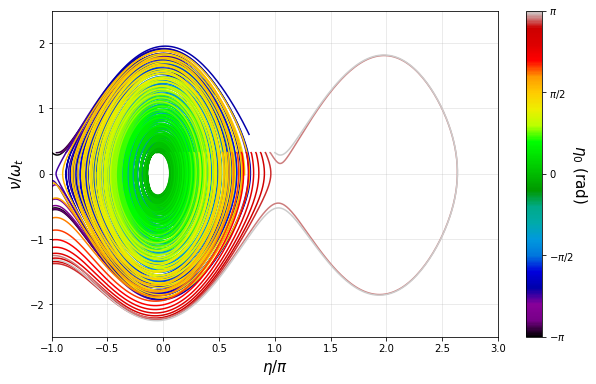

In [11]:
wtr=np.sqrt(wtrsq_out)

nplot=detadt_out/wtr


fig, ax = plt.subplots(figsize=(10,6))
s=5
last=1

for r in range(0,len(eta0_sim)):
    ax.plot(etark_su[r,:-last]/np.pi,nplot[r,:-last],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(-1,3)
ax.set_xlabel(r'$\eta/\pi$',fontsize=fonts)
ax.set_ylabel(r'$\nu/\omega_t$',fontsize=fonts)

ax.set_ylim(-2.5,2.5)

cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

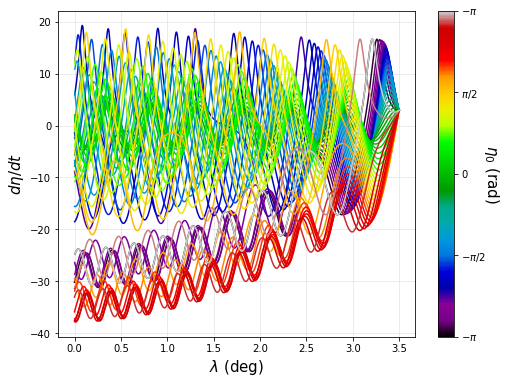

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1200

for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),detadt_out[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel(r'$\lambda$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$d\eta/dt$',fontsize=fonts)

# ax.set_ylim(0,0.00002)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

# fig, ax = plt.subplots(figsize=(8,6))
# s=5
# last=1200

# for r in range(0,len(eta0_sim)):
# #     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),nurk_su[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

# ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
# ax.set_xlabel(r'$\lambda$ (deg)')
# ax.set_ylabel(r'$\nu$')

# # ax.set_ylim(0,0.00002)
# ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
# # ax.axvline(x=-5,color="black", linestyle="--")
# plt.show()

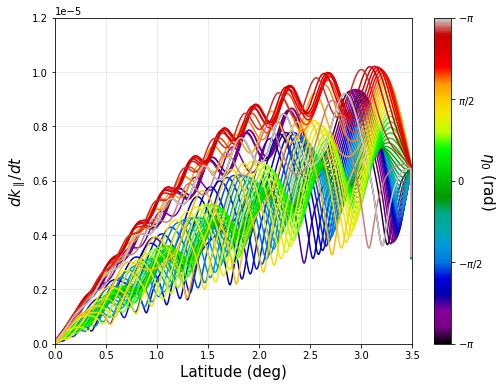

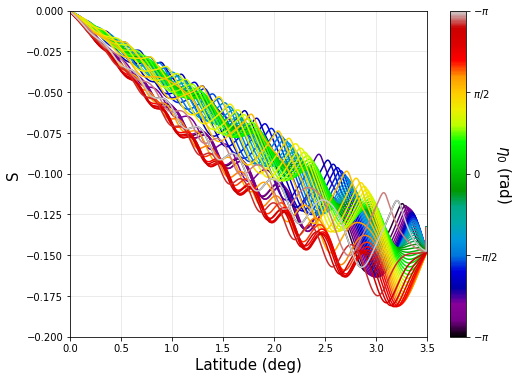

In [13]:
eta0_sim=eta0
fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),wtrsq_out[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$dk_\parallel/dt$',fontsize=fonts)

ax.set_ylim(0,0.000012)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,2:]),S_out[r,2:],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel('S ',fontsize=fonts)

ax.set_ylim(-0.2,0)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()



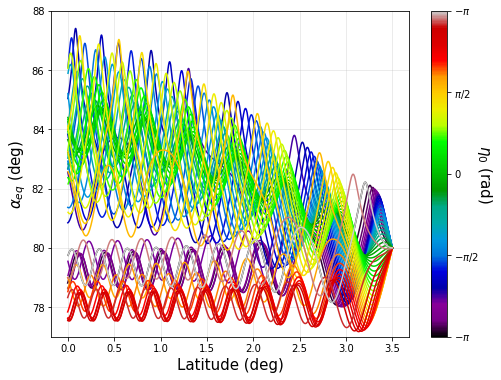

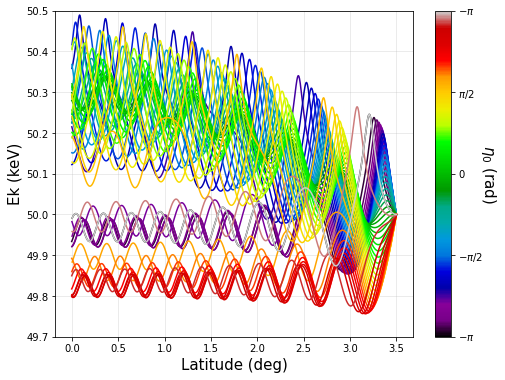

In [14]:
from matplotlib import cm

dalpha=[]
for r in range(0,len(eta0_sim)):
    ls=np.max(np.nonzero(aeqrk_su[r,:]))
    dalphaf=np.rad2deg(aeqrk_su[r,ls])-aeq0_deg
    dalpha.append(dalphaf)
    


fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),np.rad2deg(aeqrk_su[r,:-1]),c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),gamma_out_su[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$\alpha_{eq}$ (deg)',fontsize=fonts)

ax.set_ylim(77,88)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),np.rad2deg(etark_su[r,:-1])%np.pi,c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel('Ek (keV)',fontsize=fonts)

ax.set_ylim(49.7,50.5)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()





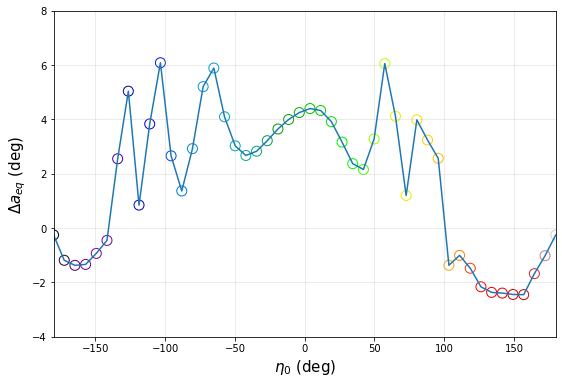

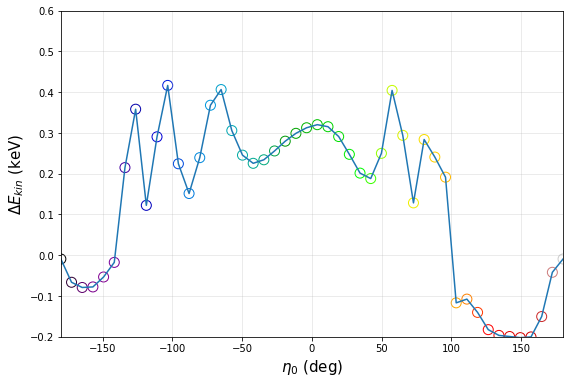

In [15]:
dalpha=[]
dEkin=[]

aeq = np.ma.array(aeqrk_su, mask=np.isnan(aeqrk_su))
Ekin = np.ma.array(E_kin_su, mask=np.isnan(E_kin_su))
for r in range(0,len(eta0_sim)):
    ls=np.max(np.nonzero(aeq[r,:]))
    els=np.max(np.nonzero(Ekin[r,:]))
    dalphaf=np.rad2deg(aeq[r,ls])-aeq0_deg
    dEkinf=(Ekin[r,ls]/1.602176487E-16)-Ekev0
    dalpha.append(dalphaf)
    dEkin.append(dEkinf)
#     print(dalpha)


fig, ax = plt.subplots(figsize=(9,6))
s=5

colors=eta0_sim[:]
# for r in range(0,len(eta0)):
#     ax.plot(np.rad2deg(lamda[r,:-1]),np.rad2deg(aeq[r,:-1]),c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.plot(np.rad2deg(eta0_sim),dalpha)
ax.scatter(np.rad2deg(eta0_sim),dalpha,marker='o',facecolors='none', edgecolors=cmap.to_rgba(eta0_sim[:]),s=100)
ax.set_xlim(-180,180)
ax.set_xlabel(r'$\eta_0$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$\Delta a_{eq}$ (deg)',fontsize=fonts)

ax.set_ylim(-4,8)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
s=5

colors=eta0_sim[:]
# for r in range(0,len(eta0)):
#     ax.plot(np.rad2deg(lamda[r,:-1]),np.rad2deg(aeq[r,:-1]),c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.plot(np.rad2deg(eta0_sim),dEkin)
ax.scatter(np.rad2deg(eta0_sim),dEkin,marker='o',facecolors='none', edgecolors=cmap.to_rgba(eta0_sim[:]),s=100)
ax.set_xlim(-180,180)
ax.set_xlabel(r'$\eta_0$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$\Delta E_{kin}}$ (keV)',fontsize=fonts)

ax.set_ylim(-0.2,0.6)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()


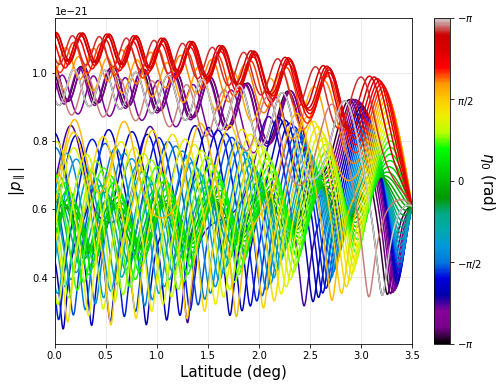

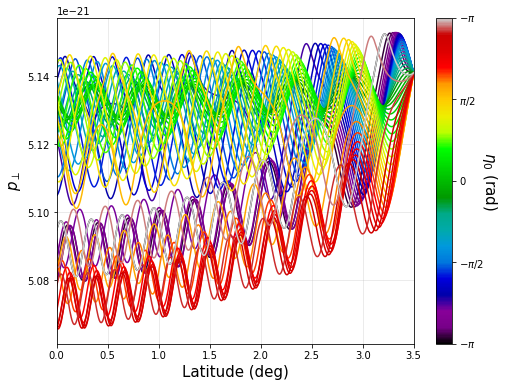

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1
for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-last]),np.abs(pparrk_su[r,:-last]),c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$|p_\parallel|$',fontsize=fonts)

# ax.set_ylim(1,3)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)

# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1
for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-last]),pperrk_su[r,:-last],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$p_\perp$',fontsize=fonts)

# ax.set_ylim(1,3)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()